<a href="https://colab.research.google.com/github/pravin-nawghare/airline-passenger-satisfaction-analysis/blob/main/Airline_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Read the data
path = '/content/airline_passenger_satisfaction.csv'

raw_data = pd.read_csv(path)
raw_data.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  \
0                       3                 4                3              3   
1                       2                 3                5              2   
2                       4                 4                5              4   
3                       2                 3                4              2   
4                       3                 3                5              3   

   On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                 3             5                 2            5   
1                 5             4                 5            5   
2                 3             5                 3            5   
3                 5             5                 5            4   
4                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied

In [ ]:
raw_data.shape

(129880, 24)

In [ ]:
# Read the columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
# Data dictionary
path = '/content/data_dictionary.csv'
data_dict = pd.read_csv(path)
data_dict

Field  \
0                                       ID   
1                                   Gender   
2                                      Age   
3                            Customer Type   
4                           Type of Travel   
5                                    Class   
6                          Flight Distance   
7                          Departure Delay   
8                            Arrival Delay   
9   Departure and Arrival Time Convenience   
10                  Ease of Online Booking   
11                        Check-in Service   
12                         Online Boarding   
13                           Gate Location   
14                        On-board Service   
15                            Seat Comfort   
16                        Leg Room Service   
17                             Cleanliness   
18                          Food and Drink   
19                       In-flight Service   
20                  In-flight Wifi Service   
21                 In-flight Entertainment   
22                        Baggage Handling   
23                            Satisfaction   

                                          Description  
0                         Unique passenger identifier  
1               Gender of the passenger (Female/Male)  
2                                Age of the passenger  
3     Type of airline customer (First-time/Returning)  
4           Purpose of the flight (Business/Personal)  
5   Travel class in the airplane for the passenger...  
6                            Flight distance in miles  
7                   Flight departure delay in minutes  
8                     Flight arrival delay in minutes  
9   Satisfaction level with the convenience of the...  
10  Satisfaction level with the online booking exp...  
11  Satisfaction level with the check-in service f...  
12  Satisfaction level with the online boarding ex...  
13  Satisfaction level with the gate location in t...  
14  Satisfaction level with the on-boarding servic...  
15  Satisfaction level with the comfort of the air...  
16  Satisfaction level with the leg room of the ai...  
17  Satisfaction level with the cleanliness of the...  
18  Satisfaction level with the food and drinks on...  
19  Satisfaction level with the in-flight service ...  
20  Satisfaction level with the in-flight Wifi ser...  
21  Satisfaction level with the in-flight entertai...  
22  Satisfaction level with the baggage handling f...  
23  Overall satisfaction level with the airline (S...

- flight dist in miles
- time in minutes
- cust type - first time travelling or multiple travels
- rating - 1(min) to 5(max), 0 means not applicable
- target: satisfication

Basic questions to answer

Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

What is the customer profile for a repeating airline passenger?

Does flight distance affect customer preferences or flight patterns?

Which factors contribute to customer satisfaction the most? What about dissatisfaction?

In [ ]:
# Arrival delay has 393 null values
raw_data.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                            0
Satisfaction                                0
dtype: int64

In [ ]:
raw_data[raw_data.isna().any(axis=1)].head()

ID  Gender  Age Customer Type Type of Travel         Class  \
246    247    Male   11     Returning       Business      Business   
883    884    Male   39     Returning       Business      Business   
1965  1966    Male   36     Returning       Business       Economy   
2407  2408  Female   55     Returning       Business      Business   
2448  2449    Male   21     Returning       Personal  Economy Plus   

      Flight Distance  Departure Delay  Arrival Delay  \
246               719               38            NaN   
883               396                0            NaN   
1965              383                2            NaN   
2407             2904               58            NaN   
2448              767                5            NaN   

      Departure and Arrival Time Convenience  Ease of Online Booking  \
246                                        1                       1   
883                                        3                       5   
1965                                       4                       4   
2407                                       5                       5   
2448                                       3                       1   

      Check-in Service  Online Boarding  Gate Location  On-board Service  \
246                  4                4              1                 4   
883                  5                4              3                 3   
1965                 4                2              4                 5   
2407                 3                3              5                 4   
2448                 1                1              1                 4   

      Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
246              4                 3            4               4   
883              4                 3            3               3   
1965             2                 2            2               2   
2407             3                 4            4               5   
2448             1                 2            1               1   

      In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
246                   3                       4                        4   
883                   3                       3                        3   
1965                  2                       2                        2   
2407                  4                       4                        4   
2448                  2                       1                        1   

      Baggage Handling             Satisfaction  
246                  4  Neutral or Dissatisfied  
883                  3                Satisfied  
1965                 3                Satisfied  
2407                 4  Neutral or Dissatisfied  
2448                 1  Neutral or Dissatisfied

In [ ]:
# no duplicate rows
raw_data.duplicated().sum()

0

In [ ]:
result = raw_data['Arrival Delay'].agg(['mean', 'median', 'max', 'min'])
print(result)

mean        15.091129
median       0.000000
max       1584.000000
min          0.000000
Name: Arrival Delay, dtype: float64


In [ ]:
raw_data.describe()

ID            Age  Flight Distance  Departure Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%         0.000000                                2.000000   
50%         0.000000                                3.000000   
75%        13.000000                                4.000000   
max      1584.000000                                5.000000   

       Ease of Online Booking  Check-in Service  Online Boarding  \
count           129880.000000     129880.000000    129880.000000   
mean                 2.756876          3.306267         3.252633   
std                  1.401740          1.266185         1.350719   
min                  0.000000          0.000000         0.000000   
25%                  2.000000          3.000000         2.000000   
50%                  3.000000          3.000000         3.000000   
75%                  4.000000          4.000000         4.000000   
max                  5.000000          5.000000         5.000000   

       Gate Location  On-board Service   Seat Comfort  Leg Room Service  \
count  129880.000000     129880.000000  129880.000000     129880.000000   
mean        2.976925          3.383023       3.441361          3.350878   
std         1.278520          1.287099       1.319289          1.316252   
min         0.000000          0.000000       0.000000          0.000000   
25%         2.000000          2.000000       2.000000          2.000000   
50%         3.000000          4.000000       4.000000          4.000000   
75%         4.000000          4.000000       5.000000          4.000000   
max         5.000000          5.000000       5.000000          5.000000   

         Cleanliness  Food and Drink  In-flight Service  \
count  129880.000000   129880.000000      129880.000000   
mean        3.286326        3.204774           3.642193   
std         1.313682        1.329933           1.176669   
min         0.000000        0.000000           0.000000   
25%         2.000000        2.000000           3.000000   
50%         3.000000        3.000000           4.000000   
75%         4.000000        4.000000           5.000000   
max         5.000000        5.000000           5.000000   

       In-flight Wifi Service  In-flight Entertainment  Baggage Handling  
count           129880.000000            129880.000000     129880.000000  
mean                 2.728696                 3.358077          3.632114  
std                  1.329340                 1.334049          1.180025  
min                  0.000000                 0.000000          1.000000  
25%                  2.000000                 2.000000          3.000000  
50%                  3.000000                 4.000000          4.000000  
75%                  4.000000                 4.000000          5.000000  
max                  5.000000                 5.000000          5.000000

- observations from above

flight distance is right skewed

max departure delay is 1592 mins (26 hr 30 min)

max arrival delay 1584 mins

In [ ]:
raw_data.describe(include='object')

Gender Customer Type Type of Travel     Class             Satisfaction
count   129880        129880         129880    129880                   129880
unique       2             2              2         3                        2
top     Female     Returning       Business  Business  Neutral or Dissatisfied
freq     65899        106100          89693     62160                    73452

In [ ]:
# 0.30% data is missing
(raw_data['Arrival Delay'].isna().sum()/raw_data.shape[0]) * 100

0.3025870033877425

In [3]:
# Imputing missing data with meadian
raw_data['Arrival Delay'] = raw_data['Arrival Delay'].fillna(raw_data['Arrival Delay'].median())
raw_data.isna().sum().sum()

0

### **EDA**

In [4]:
data = raw_data.drop(columns=['ID'], axis=1)
data.head()

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  \
0                       3                 4                3              3   
1                       2                 3                5              2   
2                       4                 4                5              4   
3                       2                 3                4              2   
4                       3                 3                5              3   

   On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                 3             5                 2            5   
1                 5             4                 5            5   
2                 3             5                 3            5   
3                 5             5                 5            4   
4                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied

In [ ]:
data['Arrival Delay'] = data['Arrival Delay'].astype('int')

In [ ]:
data.describe()

Age  Flight Distance  Departure Delay  Arrival Delay  \
count  129880.000000    129880.000000    129880.000000  129880.000000   
mean       39.427957      1190.316392        14.713713      15.045465   
std        15.119360       997.452477        38.071126      38.416353   
min         7.000000        31.000000         0.000000       0.000000   
25%        27.000000       414.000000         0.000000       0.000000   
50%        40.000000       844.000000         0.000000       0.000000   
75%        51.000000      1744.000000        12.000000      13.000000   
max        85.000000      4983.000000      1592.000000    1584.000000   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           129880.000000           129880.000000   
mean                                 3.057599                2.756876   
std                                  1.526741                1.401740   
min                                  0.000000                0.000000   
25%                                  2.000000                2.000000   
50%                                  3.000000                3.000000   
75%                                  4.000000                4.000000   
max                                  5.000000                5.000000   

       Check-in Service  Online Boarding  Gate Location  On-board Service  \
count     129880.000000    129880.000000  129880.000000     129880.000000   
mean           3.306267         3.252633       2.976925          3.383023   
std            1.266185         1.350719       1.278520          1.287099   
min            0.000000         0.000000       0.000000          0.000000   
25%            3.000000         2.000000       2.000000          2.000000   
50%            3.000000         3.000000       3.000000          4.000000   
75%            4.000000         4.000000       4.000000          4.000000   
max            5.000000         5.000000       5.000000          5.000000   

        Seat Comfort  Leg Room Service    Cleanliness  Food and Drink  \
count  129880.000000     129880.000000  129880.000000   129880.000000   
mean        3.441361          3.350878       3.286326        3.204774   
std         1.319289          1.316252       1.313682        1.329933   
min         0.000000          0.000000       0.000000        0.000000   
25%         2.000000          2.000000       2.000000        2.000000   
50%         4.000000          4.000000       3.000000        3.000000   
75%         5.000000          4.000000       4.000000        4.000000   
max         5.000000          5.000000       5.000000        5.000000   

       In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
count      129880.000000           129880.000000            129880.000000   
mean            3.642193                2.728696                 3.358077   
std             1.176669                1.329340                 1.334049   
min             0.000000                0.000000                 0.000000   
25%             3.000000                2.000000                 2.000000   
50%             4.000000                3.000000                 4.000000   
75%             5.000000                4.000000                 4.000000   
max             5.000000                5.000000                 5.000000   

       Baggage Handling  
count     129880.000000  
mean           3.632114  
std            1.180025  
min            1.000000  
25%            3.000000  
50%            4.000000  
75%            5.000000  
max            5.000000

In [5]:
# Value counts for object type columns
obj = list(data.select_dtypes(include='object').columns)

for col in obj:
  print(data[col].value_counts(normalize=True))
  print('-'*10)

Gender
Female    0.507384
Male      0.492616
Name: proportion, dtype: float64
----------
Customer Type
Returning     0.816908
First-time    0.183092
Name: proportion, dtype: float64
----------
Type of Travel
Business    0.690584
Personal    0.309416
Name: proportion, dtype: float64
----------
Class
Business        0.478596
Economy         0.448945
Economy Plus    0.072459
Name: proportion, dtype: float64
----------
Satisfaction
Neutral or Dissatisfied    0.565537
Satisfied                  0.434463
Name: proportion, dtype: float64
----------


- Observations

first time travellers are 18.3% of total travellers

69% of travelling is for business

29% of economy passengers are travelling for personal reason

satisfaction rate is 43.44%

majority of passengers are female (1.47% more than there counterparts)

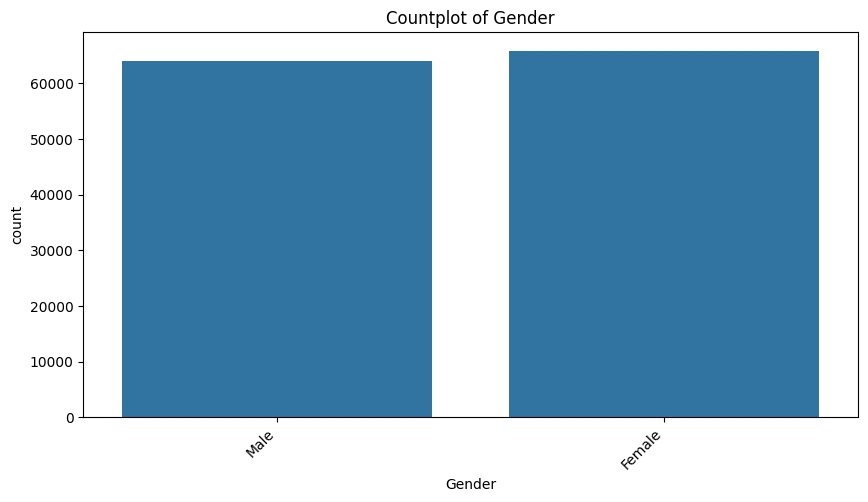

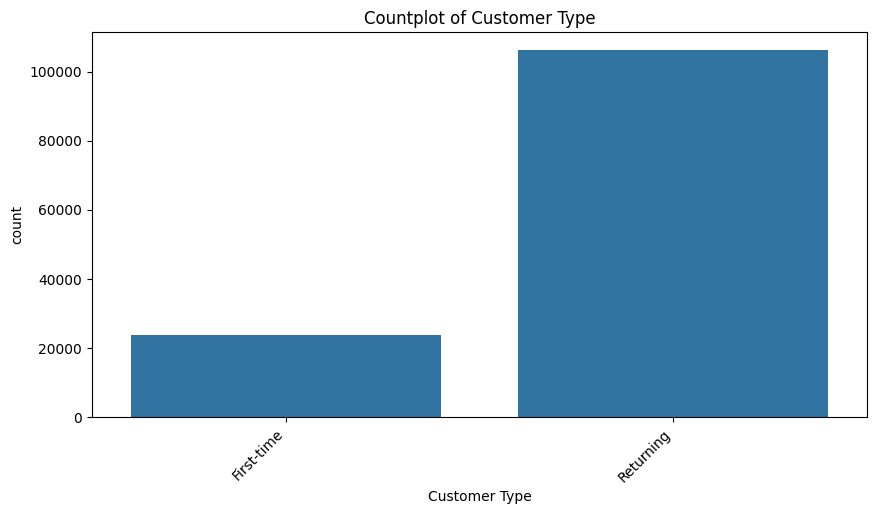

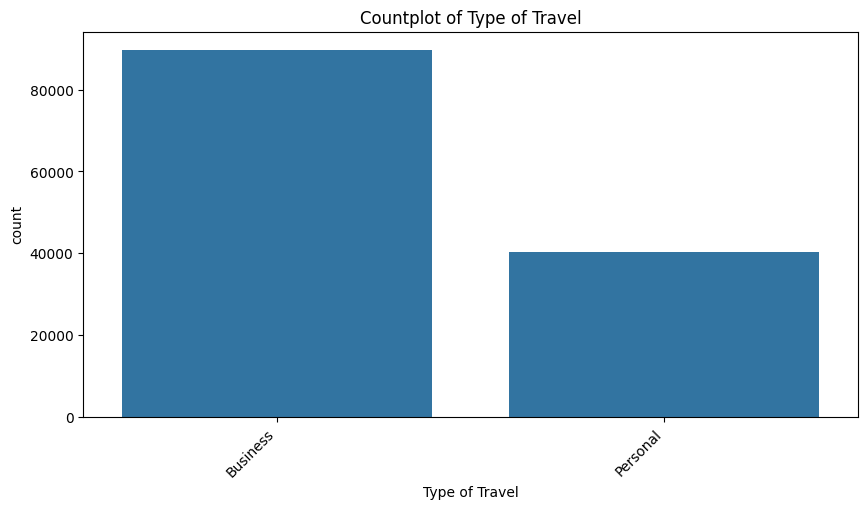

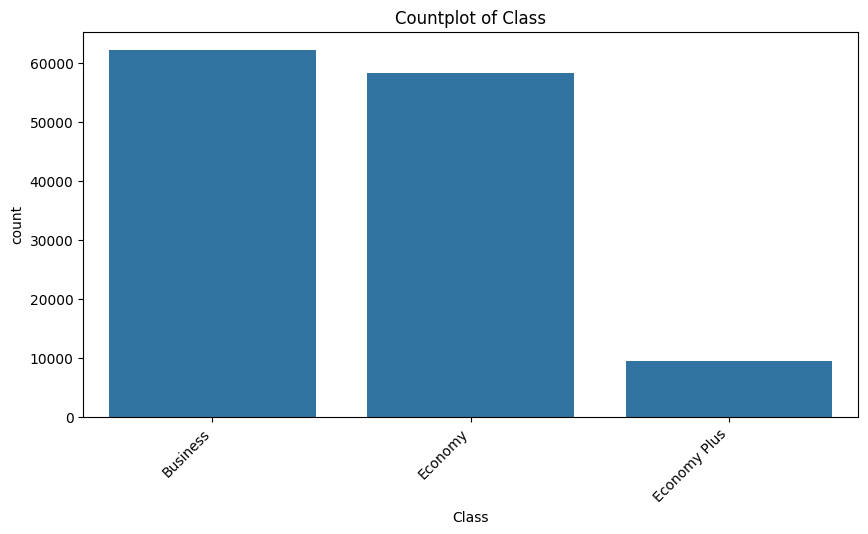

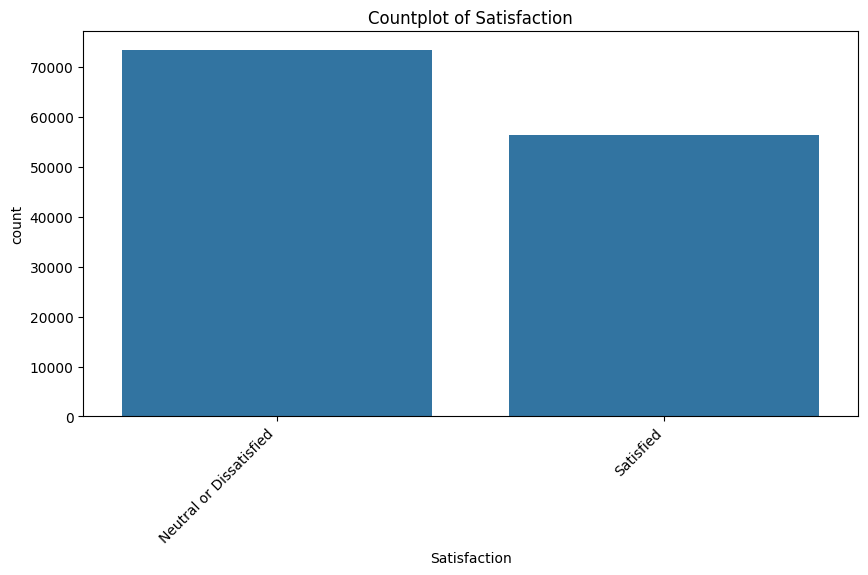

In [ ]:
def plot_countplot(df, col_list):
  """Countplot for each column in the given list.

  Args:
    df: The pandas DataFrame containing the data.
    col_list: A list of column names to plot.
  """
  for col in col_list:
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.show()

# Call the function to plot the countplots
plot_countplot(data, obj)

In [6]:
data.groupby('Gate Location')['Satisfaction'].value_counts(normalize=True)#.reset_index()

Gate Location  Satisfaction           
0              Satisfied                  1.000000
1              Neutral or Dissatisfied    0.501114
               Satisfied                  0.498886
2              Neutral or Dissatisfied    0.536220
               Satisfied                  0.463780
3              Neutral or Dissatisfied    0.652938
               Satisfied                  0.347062
4              Neutral or Dissatisfied    0.609302
               Satisfied                  0.390698
5              Satisfied                  0.568040
               Neutral or Dissatisfied    0.431960
Name: proportion, dtype: float64

only 1 passenger boarded from gate 0

from gate 3 and 4 passengers are least satisfied 34.7% and 39% respectively

from gate 1 and 2 is not that much

count of passengers from gate 5 are more 56.8% than dissatisfied 43.1%

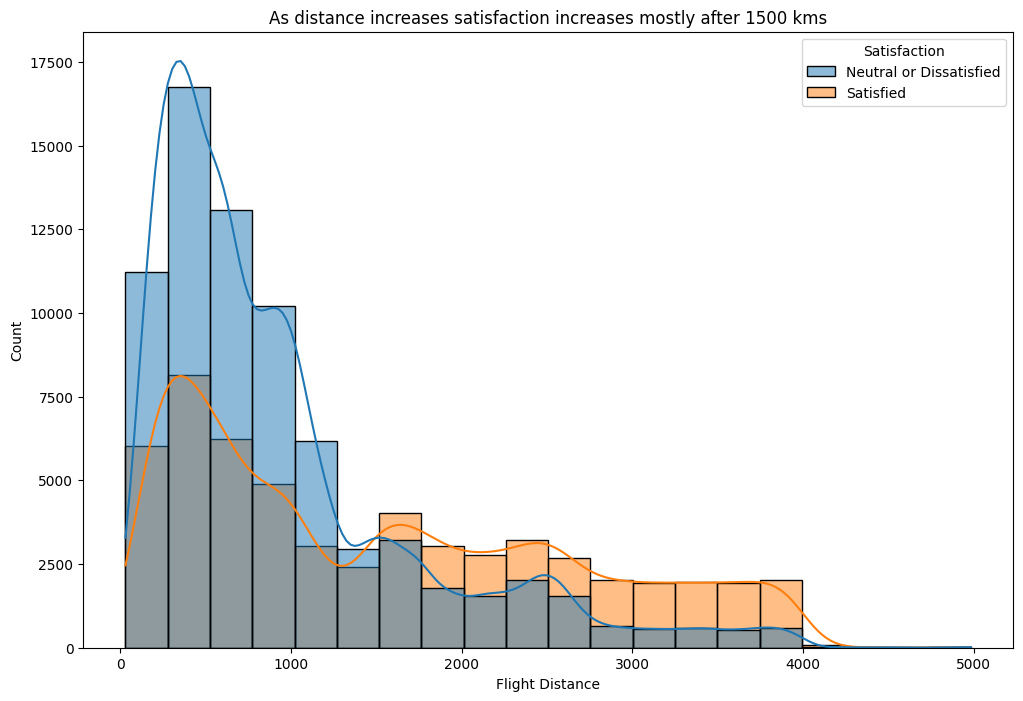

In [ ]:
# Plotting satisfaction histplot
plt.figure(figsize=(12,8))
sns.histplot(data = data, x='Flight Distance',bins=20, hue= 'Satisfaction', kde=True)
plt.title('As distance increases passengers satisfaction increases mostly after 1500 kms')
plt.show()

mostly travellers are short distance travellers >1000 miles

at 500 miles mark passengers are twice as dissatisfied or neutral than satisfied

there are 3 peaks: at 500, 1500, 2750 miles mark

[]

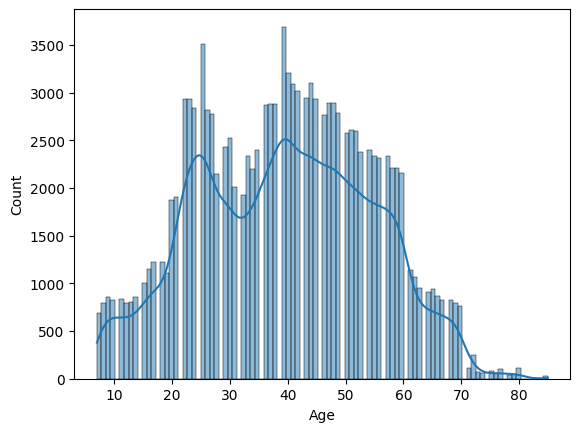

In [ ]:
sns.histplot(data = data, x='Age', bins=100,  kde=True)
#plt.title('As distance increases satisfaction increases mostly after 1500 kms')
plt.plot()

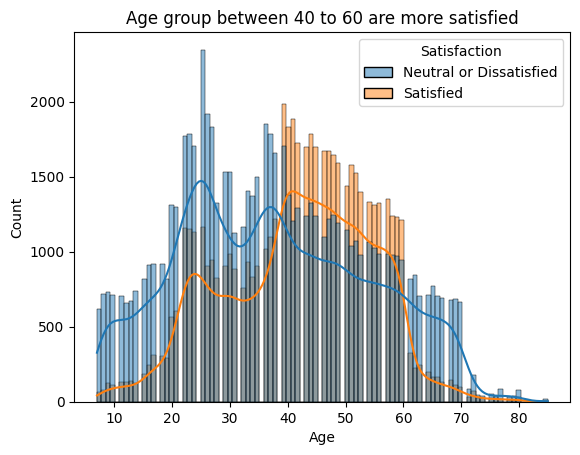

In [ ]:
sns.histplot(data = data, x='Age', bins=100, hue= 'Satisfaction', kde=True)
plt.title('Age group between 40 to 60 are more satisfied')
plt.show()


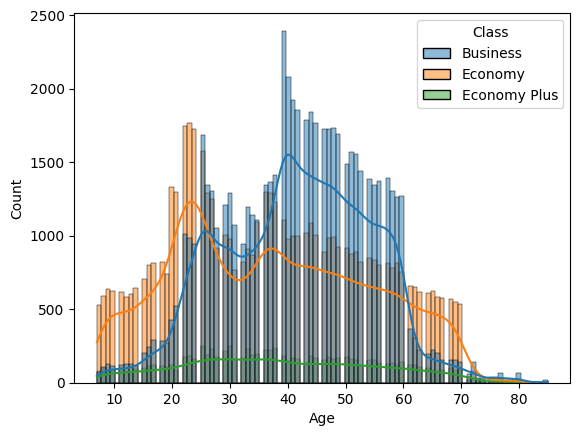

In [ ]:
sns.histplot(data = data, x='Age', bins=100, hue= 'Class', kde=True)
plt.show()

age < 25: economy

between 25 - 60: business

age >60 to 72: economy

age >72: business

economy plus is least preferred

In [12]:
# prompt: add a new column 'Age-group', in data dataframe if age<13 then 'kids', age>12 and <20 then 'teens' age>19 and <41 then 'young adults' age>40 and <61 then 'middle age' else 'senior

# Define the function to categorize age groups
def categorize_age(age):
    if age < 13:
        return 'kids'
    elif age > 12 and age < 20:
        return 'teens'
    elif age > 19 and age < 41:
        return 'young adults'
    elif age > 40 and age < 61:
        return 'middle age'
    else:
        return 'senior'

# Apply the function to create the 'Age-group' column
data['Age-group'] = data['Age'].apply(categorize_age)
data.head()


Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  \
0                       3                 4                3              3   
1                       2                 3                5              2   
2                       4                 4                5              4   
3                       2                 3                4              2   
4                       3                 3                5              3   

   On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                 3             5                 2            5   
1                 5             4                 5            5   
2                 3             5                 3            5   
3                 5             5                 5            4   
4                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  \
0                        5                 5  Neutral or Dissatisfied   
1                        5                 5                Satisfied   
2                        3                 3                Satisfied   
3                        5                 5                Satisfied   
4                        3                 3                Satisfied   

  Age_group     Age-group  
0      kids    middle age  
1      kids  young adults  
2      kids    middle age  
3      kids    middle age  
4      kids    middle age

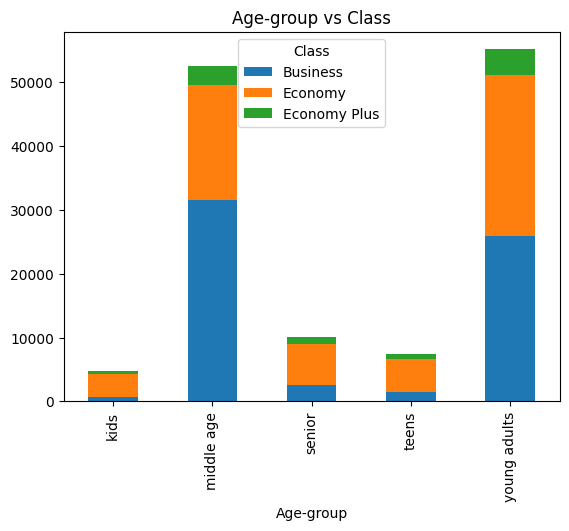

In [17]:
pd.crosstab(data['Age-group'], data['Class']).plot(kind='bar', stacked=True)
plt.title('Age-group vs Class')
plt.show()

**Insights**
- Middle age and Young adults mostly prefer _businness class_
- kids, teens and senior age group passengers prefer _economy class_
- _Economy plus_ is least preferred class type any age group passenger.

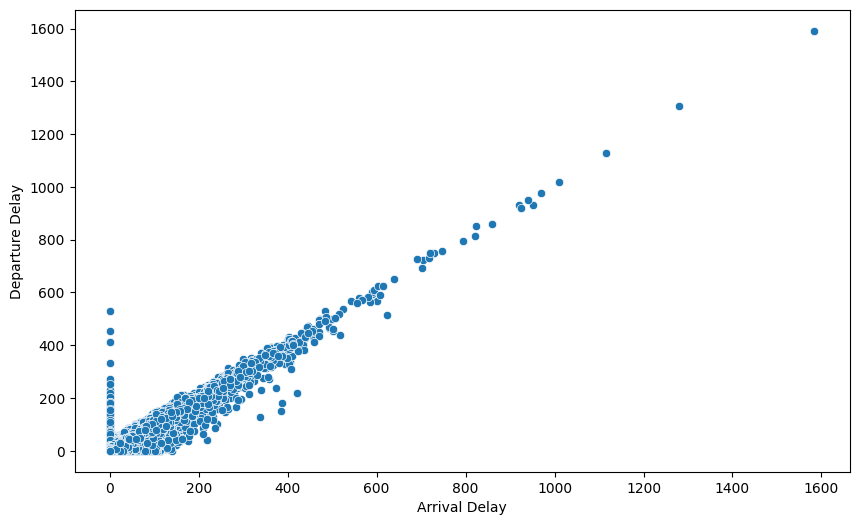

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Arrival Delay', y='Departure Delay')
#plt.title('As distance increases satisfaction increases mostly after 1500 kms')
plt.show()

In [19]:
print("Correlation between arrival delay and departure delay:")
data['Arrival Delay'].corr(data['Departure Delay'])

Correlation between arrival delay and departure delay:


0.9593823533648665

**Insights**
- Their is a high correlation between arrival delay and departure delay - __0.959__
- It is also visible by the scatter plot

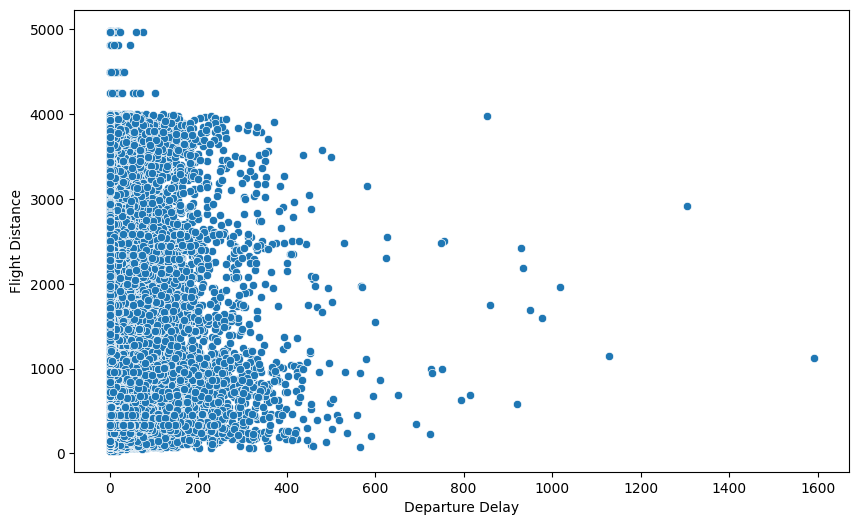

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Departure Delay', y='Flight Distance')
#plt.title('As distance increases satisfaction increases mostly after 1500 kms')
plt.show()

In [20]:
print("Correlation between flight distance and departure delay:")
data['Flight Distance'].corr(data['Departure Delay'])

Correlation between flight distance and departure delay:


0.0024020057972094157

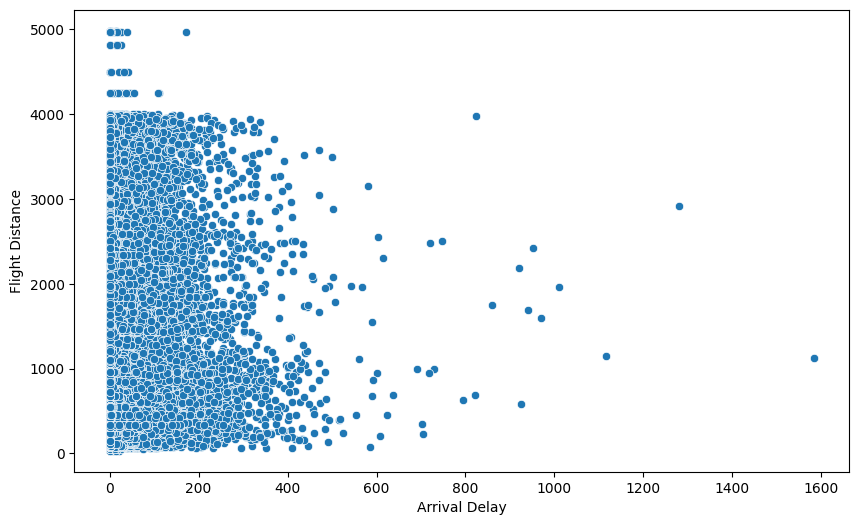

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, y='Flight Distance', x='Arrival Delay')
#plt.title('As distance increases satisfaction increases mostly after 1500 kms')
plt.show()

In [21]:
print("Correlation between flight distance and arrival delay:")
data['Flight Distance'].corr(data['Arrival Delay'])

Correlation between flight distance and arrival delay:


-0.0019728930350069373

**Insights**
- Arrival delay and Departure delay has no correlation with flight distance
- It can be concluded that travel distance has no effect on delay in departure of flights or delay in arrival of flights
- 3 and 1/2 hr departure delay is very common
- after 450 mins the departure delay is rare
- Mostly the arrival delay is less than 400 mins.
- Very few times the arrival delay is greater than 1000 mins i.e, 16 hours

In [26]:
data['Age'].corr(data['Flight Distance'])

0.09945932275218448

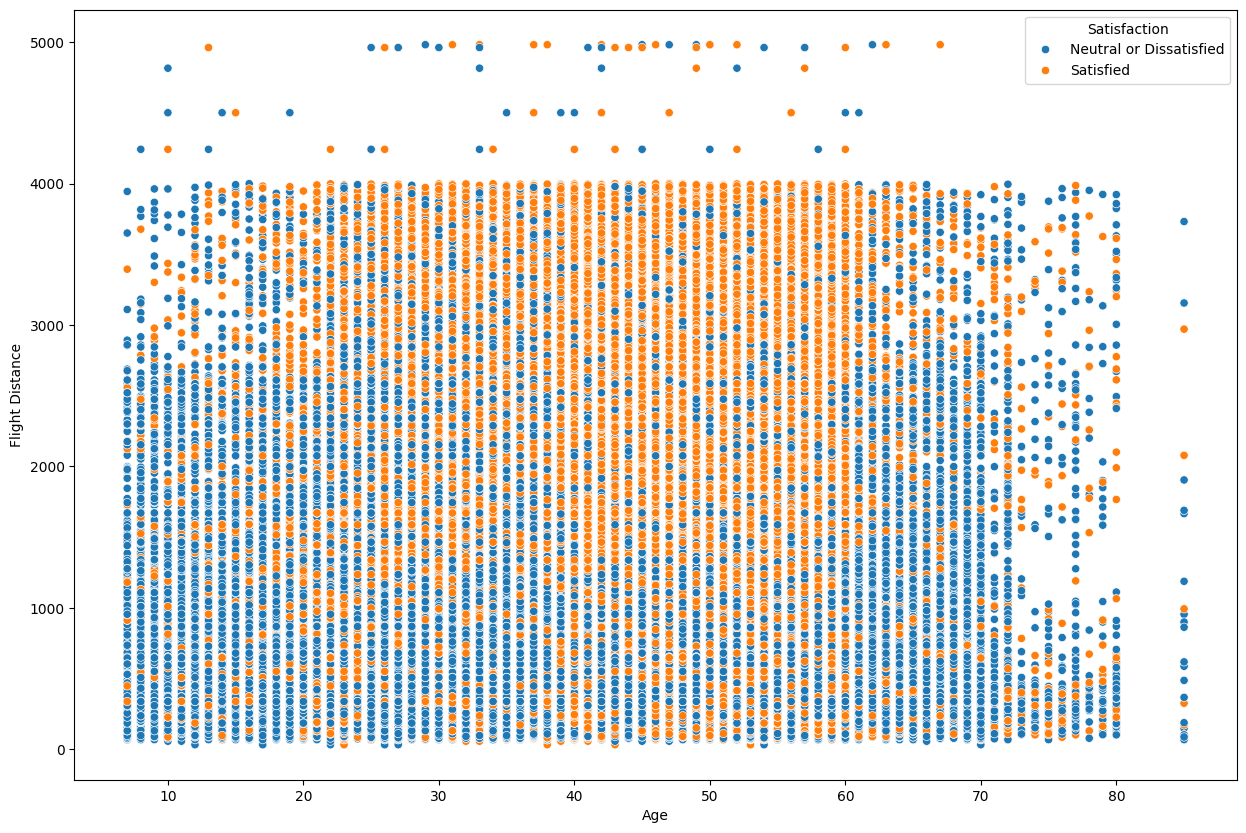

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x='Age', y='Flight Distance', hue='Satisfaction')#, figure=(15,10))
#plt.title('As distance increases satisfaction increases mostly after 1500 kms')
plt.show()

at 4000 miles mark the age distribution is almost uniform

age between 18 and 62 with distance more than 2700 miles passengers are more satisfied

adult travellers between 40 to 60 are mostly overall satisfied compared to ages people

above age 60 satisfaction level drops drasticly

for distance <1000 people are less satisfied overall but with people with age<20 are most disatisfied or neutral



In [ ]:
# Passengers with distance more than 4000 miles
plus_4000 = data[data['Flight Distance'] >= 4000].shape[0]
plus_4000_staisfy = data[(data['Flight Distance'] >= 4000) & (data['Satisfaction'] == 'Satisfied')].shape[0]

print(f'travellers with flight distance >4000 miles: {data[data["Flight Distance"] >= 4000].shape[0]}')
print(f'travellers with flight distance >4000 miles and satisfied: {data[(data["Flight Distance"] >= 4000) & (data["Satisfaction"] == "Satisfied")].shape[0]}')
print('satisfaction rate for long distance passengers: ', (plus_4000_staisfy/plus_4000)*100)

travellers with flight distance >4000 miles: 90
travellers with flight distance >4000 miles and satisfied: 54
satisfaction rate for long distance passengers:  60.0


In [ ]:
# gate 5, satisfied, >4000 are 8 passenger
data[(data['Flight Distance'] >= 4000) & (data['Satisfaction'] == 'Satisfied') & (data['Gate Location'] == 5)].shape[0]

8

greater than 60 and greater than 2700 miles

In [ ]:
# df with people betweem 40 and 60
age_40_60 = data[(data['Age'] >= 40) & (data['Age'] <= 60)]

In [ ]:
pivot_fun = age_40_60.groupby('Satisfaction')[[ 'Type of Travel', 'Class']].value_counts().reset_index().sort_values(by='count',ascending=False)
pivot_fun#.sort_values(by='count',ascending=False)

Satisfaction Type of Travel         Class  count
6                 Satisfied       Business      Business  26641
0   Neutral or Dissatisfied       Personal       Economy   9722
1   Neutral or Dissatisfied       Business      Business   6006
2   Neutral or Dissatisfied       Business       Economy   4850
7                 Satisfied       Business       Economy   3407
3   Neutral or Dissatisfied       Personal  Economy Plus   1369
8                 Satisfied       Personal       Economy   1063
4   Neutral or Dissatisfied       Business  Economy Plus    897
5   Neutral or Dissatisfied       Personal      Business    783
9                 Satisfied       Business  Economy Plus    779
10                Satisfied       Personal  Economy Plus    136
11                Satisfied       Personal      Business    110

mostly satisfied passengers are travelling for business purpose

majority of satisfied customers are travelling by business class

neutral or dissatisfied passengers are mostly econony or economy plus

In [ ]:
col_list = data.columns.tolist()

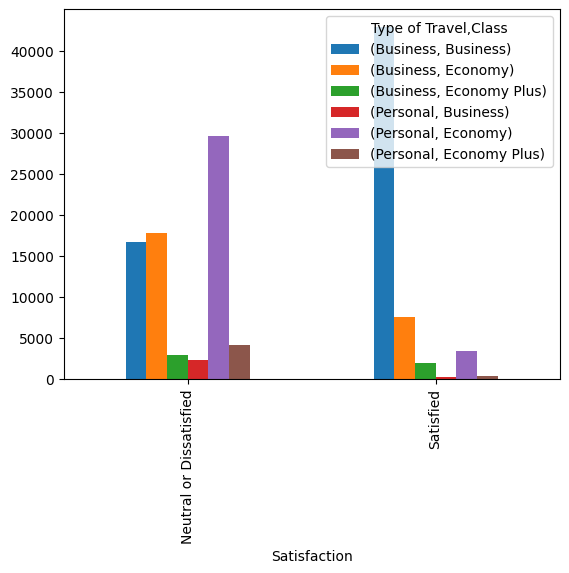

In [24]:
# for whole df
pivot_table = pd.pivot_table(
    data,
    values='Age',  # Use any existing column for the count
    index='Satisfaction',
    columns=['Type of Travel', 'Class'],
    aggfunc='count',
    fill_value=0  # Fill missing values with 0
)

pivot_table.plot(kind='bar')
plt.show()

In [ ]:
age_greater_60 = data[data['Age'] >= 60].groupby(['Class','Satisfaction'])[['Flight Distance','Departure Delay','Arrival Delay']].agg('mean').reset_index()
age_greater_60

Class             Satisfaction  Flight Distance  Departure Delay  \
0      Business  Neutral or Dissatisfied      1478.545205        16.732055   
1      Business                Satisfied      1811.690987        11.639962   
2       Economy  Neutral or Dissatisfied       767.289021        15.293320   
3       Economy                Satisfied       659.953488         8.760364   
4  Economy Plus  Neutral or Dissatisfied       742.477799        17.632239   
5  Economy Plus                Satisfied       588.427273         6.395455   

   Arrival Delay  
0      17.284932  
1      11.493085  
2      15.650959  
3       8.335693  
4      18.348456  
5       6.245455

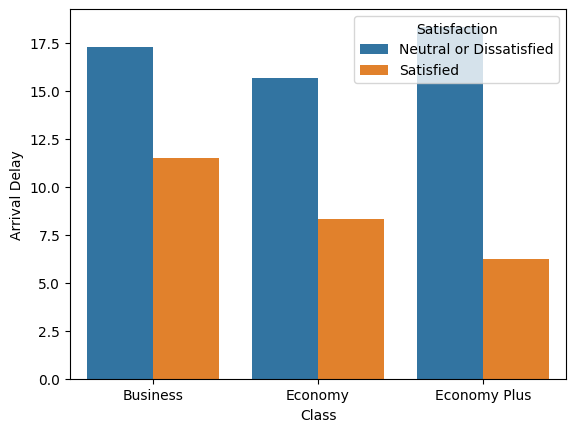

In [ ]:
sns.barplot(data=age_greater_60, x='Class', y='Arrival Delay', hue='Satisfaction')
plt.show()

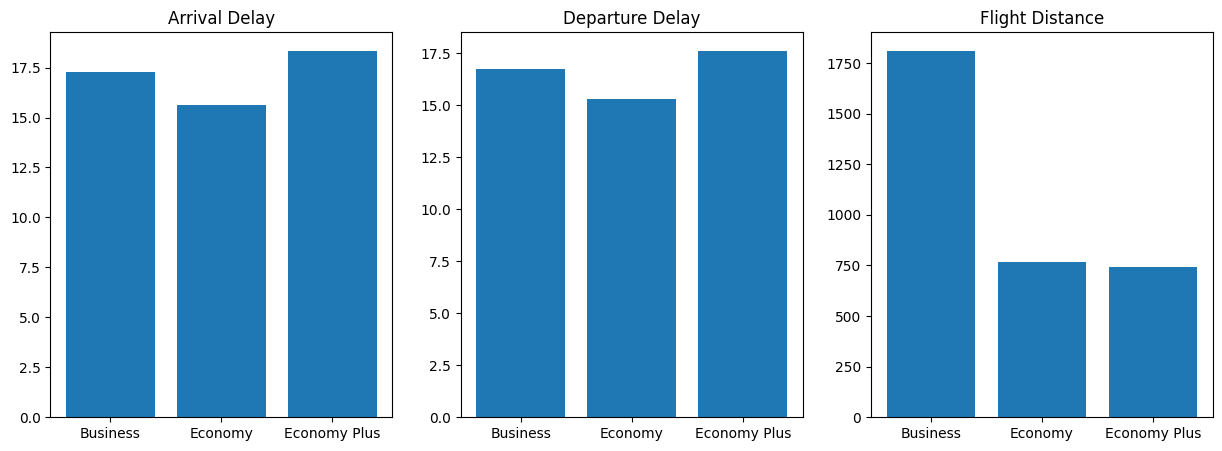

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(age_greater_60['Class'], age_greater_60['Arrival Delay'])
ax[0].set_title('Arrival Delay')

ax[1].bar(age_greater_60['Class'], age_greater_60['Departure Delay'])
ax[1].set_title('Departure Delay')

ax[2].bar(age_greater_60['Class'], age_greater_60['Flight Distance'])
ax[2].set_title('Flight Distance')

plt.show()

In [ ]:
data.head()

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
ID                                                                        
1     Male   48    First-time       Business  Business              821   
2   Female   35     Returning       Business  Business              821   
3     Male   41     Returning       Business  Business              853   
4     Male   50     Returning       Business  Business             1905   
5   Female   49     Returning       Business  Business             3470   

    Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
ID                                                                           
1                 2              5                                       3   
2                26             39                                       2   
3                 0              0                                       4   
4                 0              0                                       2   
5                 0              1                                       3   

    Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  \
ID                                                                             
1                        3                 4                3              3   
2                        2                 3                5              2   
3                        4                 4                5              4   
4                        2                 3                4              2   
5                        3                 3                5              3   

    On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
ID                                                                  
1                  3             5                 2            5   
2                  5             4                 5            5   
3                  3             5                 3            5   
4                  5             5                 5            4   
5                  3             4                 4            5   

    Food and Drink  In-flight Service  In-flight Wifi Service  \
ID                                                              
1                5                  5                       3   
2                3                  5                       2   
3                5                  3                       4   
4                4                  5                       2   
5                4                  3                       3   

    In-flight Entertainment  Baggage Handling             Satisfaction  
ID                                                                      
1                         5                 5  Neutral or Dissatisfied  
2                         5                 5                Satisfied  
3                         3                 3                Satisfied  
4                         5                 5                Satisfied  
5                         3                 3                Satisfied

Basic questions to answer

Which percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

What is the customer profile for a repeating airline passenger?

Does flight distance affect customer preferences or flight patterns?

Which factors contribute to customer satisfaction the most? What about dissatisfaction?

In [ ]:
data[data['Satisfaction'] == 'Satisfied'].shape[0]/data.shape[0]

0.43446258084385586

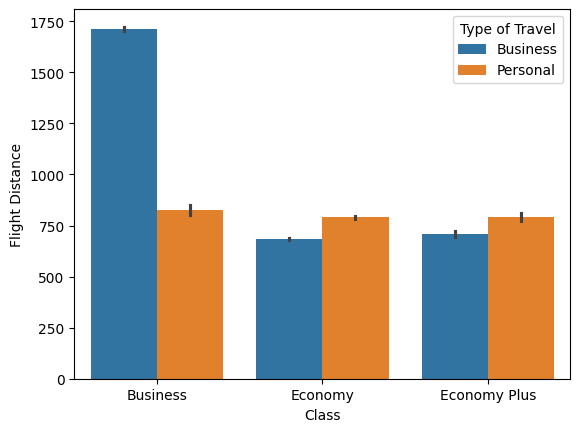

In [ ]:
sns.barplot(data=data, x='Class', y='Flight Distance', hue='Type of Travel')
plt.show()

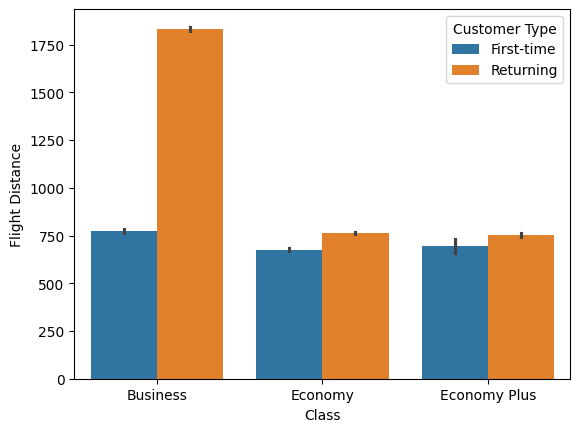

In [ ]:
sns.barplot(data=data, x='Class', y='Flight Distance', hue='Customer Type')
plt.show()

In [ ]:
data.groupby('Satisfaction')[['Customer Type','Type of Travel']].count()

Customer Type  Type of Travel
Satisfaction                                          
Neutral or Dissatisfied          73452           73452
Satisfied                        56428           56428

In [ ]:
repeating_passengers = data[data['Customer Type'] == 'Returning']
repeating_passengers[['Age', 'Flight Distance']].describe()

Age  Flight Distance
count  106100.000000    106100.000000
mean       41.462008      1297.046437
std        15.138065      1048.719375
min         7.000000        31.000000
25%        31.000000       440.000000
50%        43.000000       925.000000
75%        53.000000      1986.000000
max        85.000000      4983.000000

In [ ]:
repeating_passengers[['Class', 'Type of Travel', 'Gender']].describe(include='object')

Class Type of Travel  Gender
count     106100         106100  106100
unique         3              2       2
top     Business       Business  Female
freq       52929          66114   53056

In [ ]:
#Explore satisfaction levels:
repeating_passengers['Satisfaction'].value_counts(normalize=True)

Satisfaction
Neutral or Dissatisfied    0.521885
Satisfied                  0.478115
Name: proportion, dtype: float64

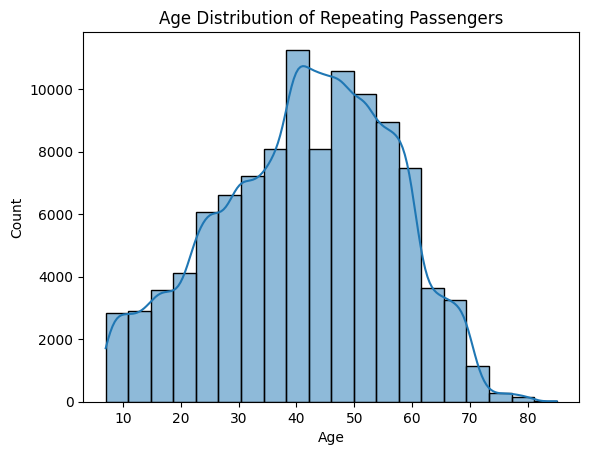

In [ ]:
# Example: Visualize age distribution of repeating passengers
sns.histplot(data=repeating_passengers, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Repeating Passengers')
plt.show()

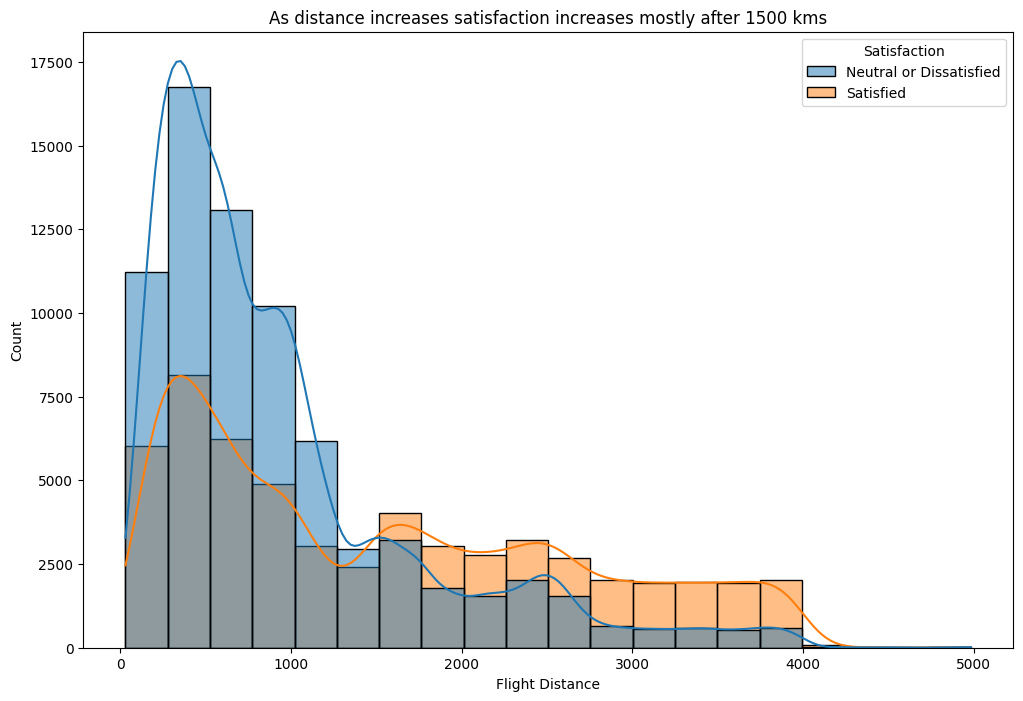

In [ ]:
#Does flight distance affect customer preferences or flight patterns?

# Plotting satisfaction histplot
plt.figure(figsize=(12,8))
sns.histplot(data = data, x='Flight Distance',bins=20, hue= 'Satisfaction', kde=True)
plt.title('As distance increases passengers satisfaction increases mostly after 1500 kms')
plt.show()

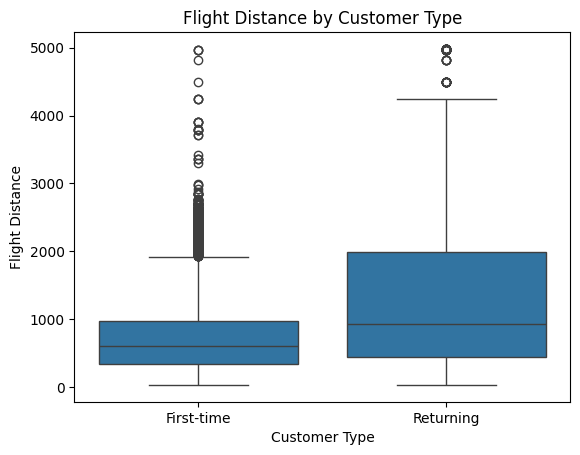

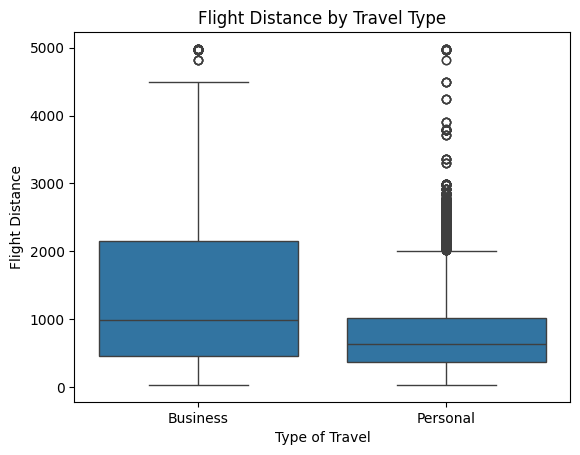

In [ ]:
# Examine customer type and travel type by distance:
sns.boxplot(data=data, x='Customer Type', y='Flight Distance')
plt.title('Flight Distance by Customer Type')
plt.show()

sns.boxplot(data=data, x='Type of Travel', y='Flight Distance')
plt.title('Flight Distance by Travel Type')
plt.show()

In [ ]:
# scatter plot departure delay vs flight distance

Group data by flight distance ranges (e.g., short, medium, long) and analyze customer demographics and satisfaction within each range.

Calculate correlation coefficients between flight distance and other numerical variables.

In [ ]:
#Which factors contribute to customer satisfaction the most? What about dissatisfaction?
data['Satisfaction_Score'] = data['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})
correlations = data.corr(numeric_only=True)['Satisfaction_Score'].sort_values(ascending=False)


In [ ]:
print(correlations)

Satisfaction_Score                        1.000000
Online Boarding                           0.501749
In-flight Entertainment                   0.398234
Seat Comfort                              0.348829
On-board Service                          0.322205
Leg Room Service                          0.312424
Cleanliness                               0.307035
Flight Distance                           0.298085
In-flight Wifi Service                    0.283460
Baggage Handling                          0.248680
In-flight Service                         0.244918
Check-in Service                          0.237252
Food and Drink                            0.211340
Ease of Online Booking                    0.168877
Age                                       0.134091
Gate Location                            -0.002793
Departure Delay                          -0.050740
Departure and Arrival Time Convenience   -0.054270
Arrival Delay                            -0.058145
Name: Satisfaction_Score, dtype

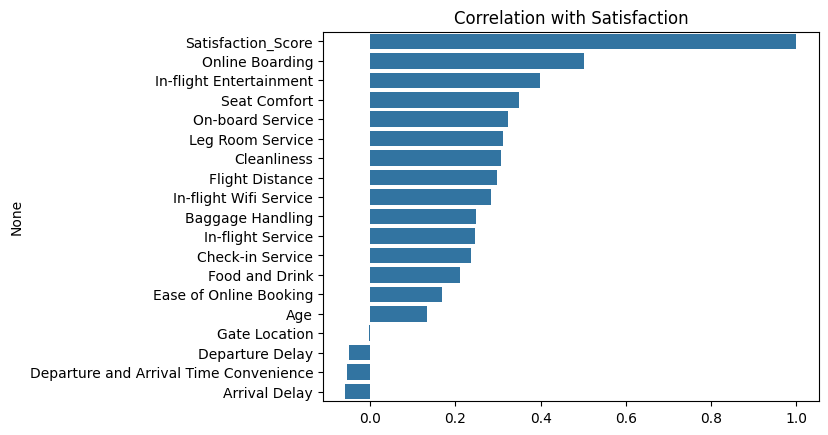

In [ ]:
sns.barplot(y=correlations.index, x=correlations.values)
plt.title('Correlation with Satisfaction')
plt.show()

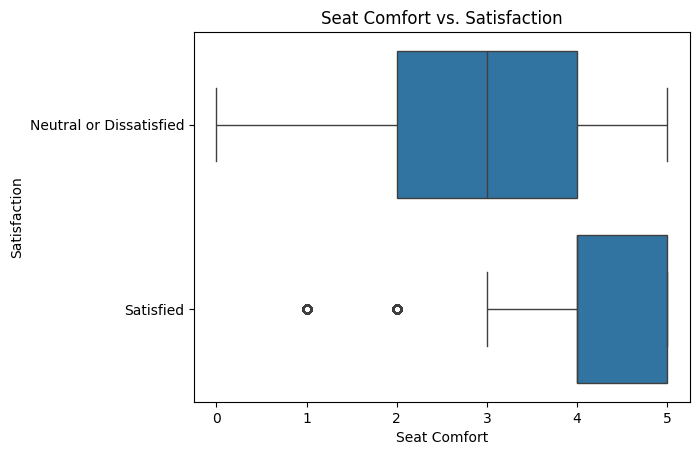

In [ ]:
# Visualize key factors:
# Example: Box plot of Seat Comfort vs. Satisfaction
sns.boxplot(data=data, y='Satisfaction', x='Seat Comfort')
plt.title('Seat Comfort vs. Satisfaction')
plt.show()

In [ ]:
#Analyze feature importance using a classification model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Select features and target variable
X = data[['Online Boarding', 'In-flight Wifi Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness']]
y = data['Satisfaction_Score']

# Encode categorical features (if any)
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get feature importance
importance = model.coef_[0]
feature_names = X.columns

# Print feature importance
for i, feature in enumerate(feature_names):
    print(f'{feature}: {importance[i]}')

Online Boarding: 0.8054579980657024
In-flight Wifi Service: 0.1332621777002109
Seat Comfort: 0.22422656774922403
Leg Room Service: 0.5243746655492804
Cleanliness: 0.17935249265371148


In [ ]:
data.head()

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
ID                                                                        
1     Male   48    First-time       Business  Business              821   
2   Female   35     Returning       Business  Business              821   
3     Male   41     Returning       Business  Business              853   
4     Male   50     Returning       Business  Business             1905   
5   Female   49     Returning       Business  Business             3470   

    Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
ID                                                                           
1                 2              5                                       3   
2                26             39                                       2   
3                 0              0                                       4   
4                 0              0                                       2   
5                 0              1                                       3   

    Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  \
ID                                                                             
1                        3                 4                3              3   
2                        2                 3                5              2   
3                        4                 4                5              4   
4                        2                 3                4              2   
5                        3                 3                5              3   

    On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
ID                                                                  
1                  3             5                 2            5   
2                  5             4                 5            5   
3                  3             5                 3            5   
4                  5             5                 5            4   
5                  3             4                 4            5   

    Food and Drink  In-flight Service  In-flight Wifi Service  \
ID                                                              
1                5                  5                       3   
2                3                  5                       2   
3                5                  3                       4   
4                4                  5                       2   
5                4                  3                       3   

    In-flight Entertainment  Baggage Handling             Satisfaction  
ID                                                                      
1                         5                 5  Neutral or Dissatisfied  
2                         5                 5                Satisfied  
3                         3                 3                Satisfied  
4                         5                 5                Satisfied  
5                         3                 3                Satisfied

In [ ]:
data.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
num_col_df = data[[
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling','Satisfaction']]

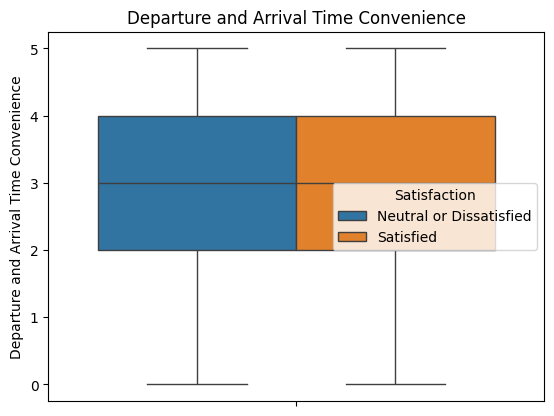

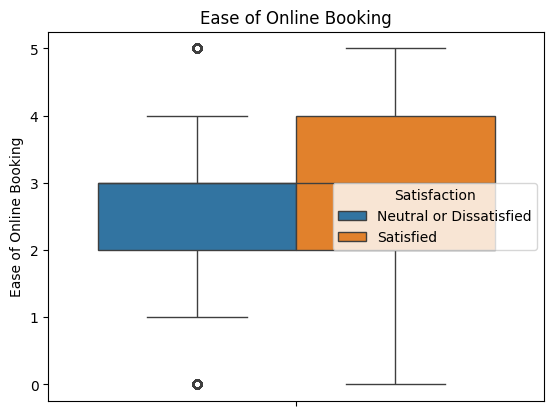

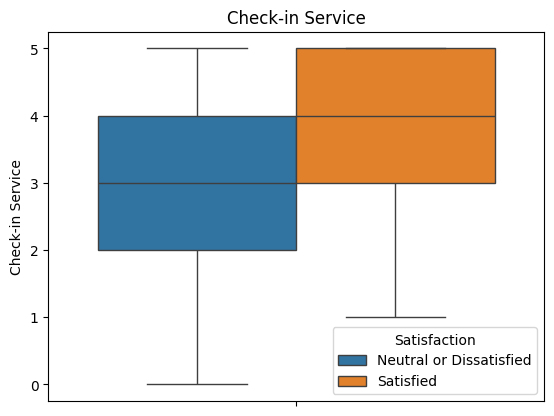

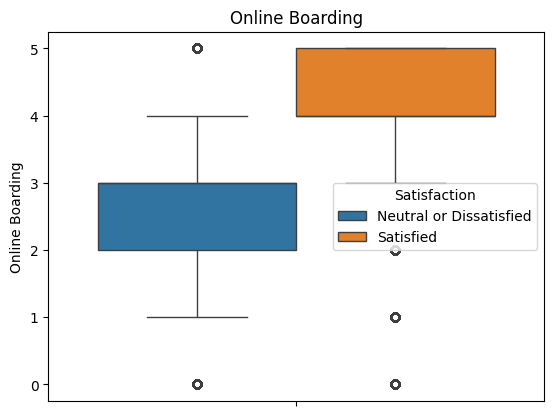

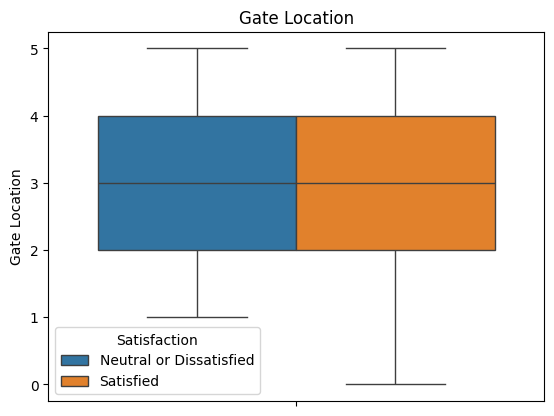

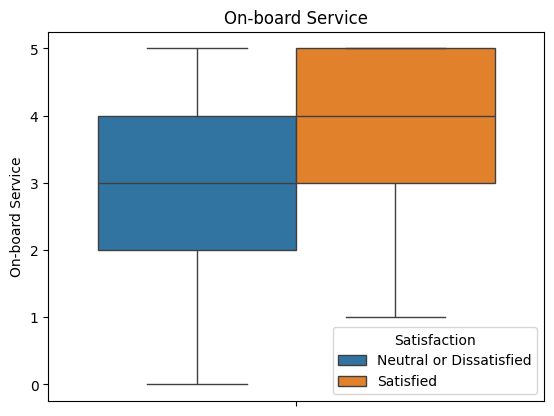

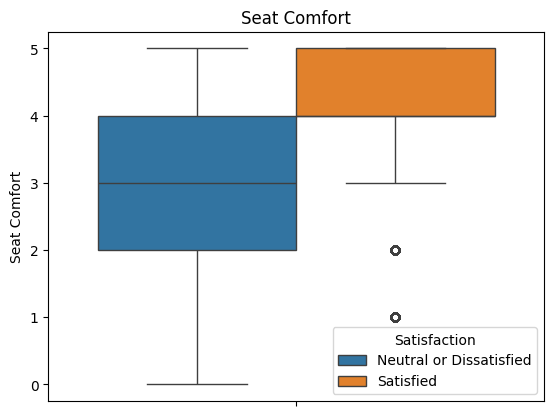

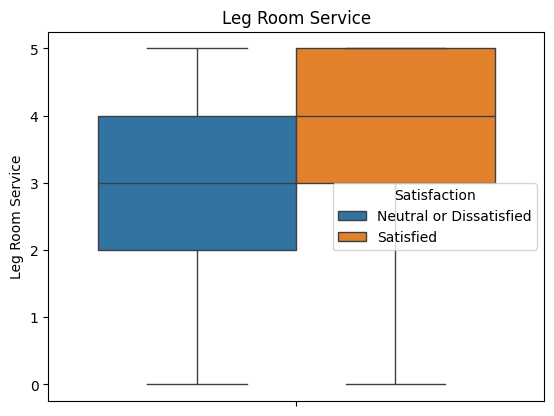

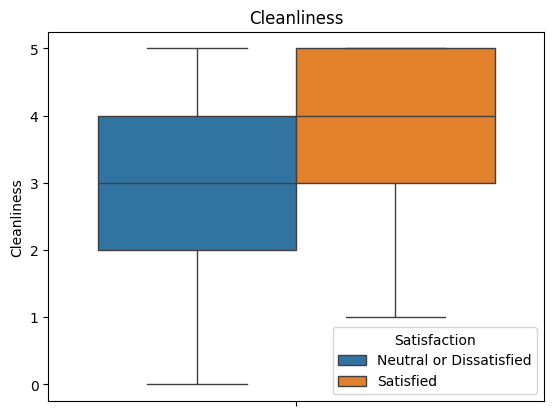

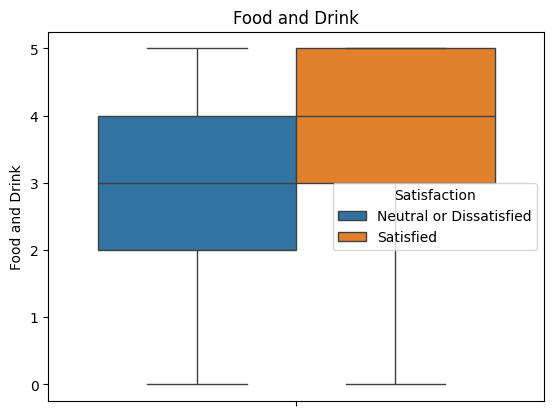

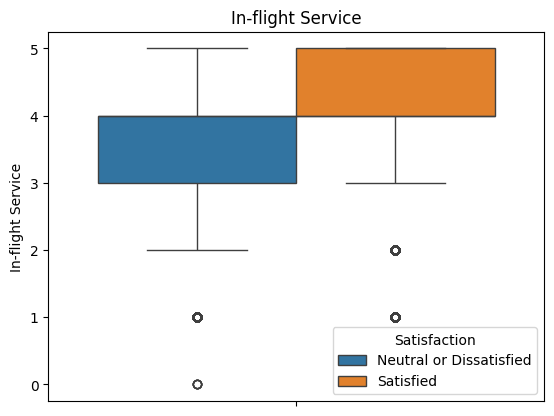

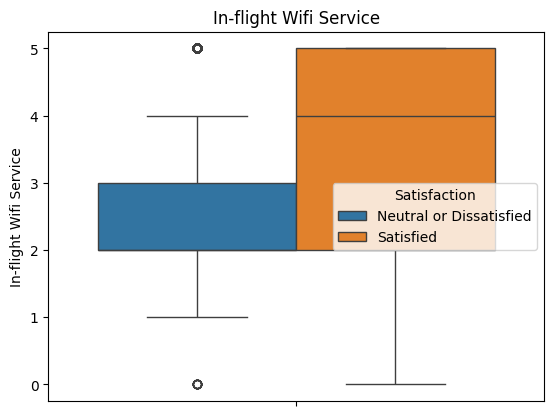

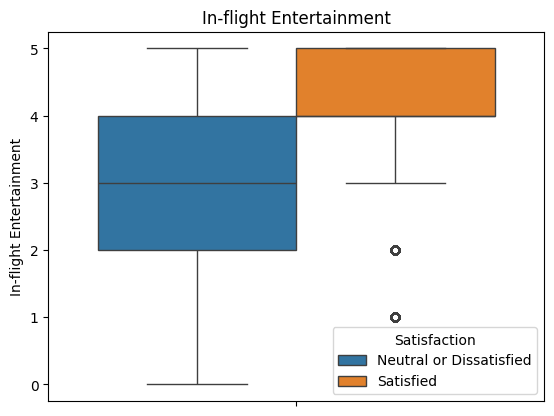

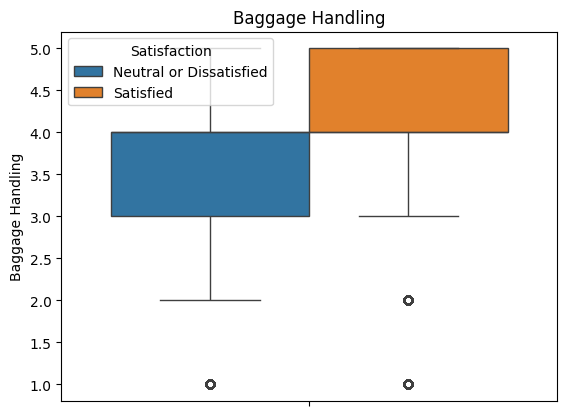

In [ ]:
# create the function
#def plot_boxplot(df, col_list):
  """Boxplot for each column in the given list.

  Args:
    df: The pandas DataFrame containing the data.
    col_list: A list of column names to plot.
  """
  for i in num_col_df.columns:
    if i == 'Satisfaction':
      continue
    else:
      #plt.figure(figsize=(10,6))
      sns.boxplot(data=num_col_df, y=i, hue='Satisfaction')
      plt.title(f'{i}')
      plt.show()


In [ ]:
cor_df = num_col_df.drop('Satisfaction', axis='columns')
cor_df.head()

Departure and Arrival Time Convenience  Ease of Online Booking  \
ID                                                                   
1                                        3                       3   
2                                        2                       2   
3                                        4                       4   
4                                        2                       2   
5                                        3                       3   

    Check-in Service  Online Boarding  Gate Location  On-board Service  \
ID                                                                       
1                  4                3              3                 3   
2                  3                5              2                 5   
3                  4                5              4                 3   
4                  3                4              2                 5   
5                  3                5              3                 3   

    Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
ID                                                                
1              5                 2            5               5   
2              4                 5            5               3   
3              5                 3            5               5   
4              5                 5            4               4   
5              4                 4            5               4   

    In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
ID                                                                       
1                   5                       3                        5   
2                   5                       2                        5   
3                   3                       4                        3   
4                   5                       2                        5   
5                   3                       3                        3   

    Baggage Handling  
ID                    
1                  5  
2                  5  
3                  3  
4                  5  
5                  3

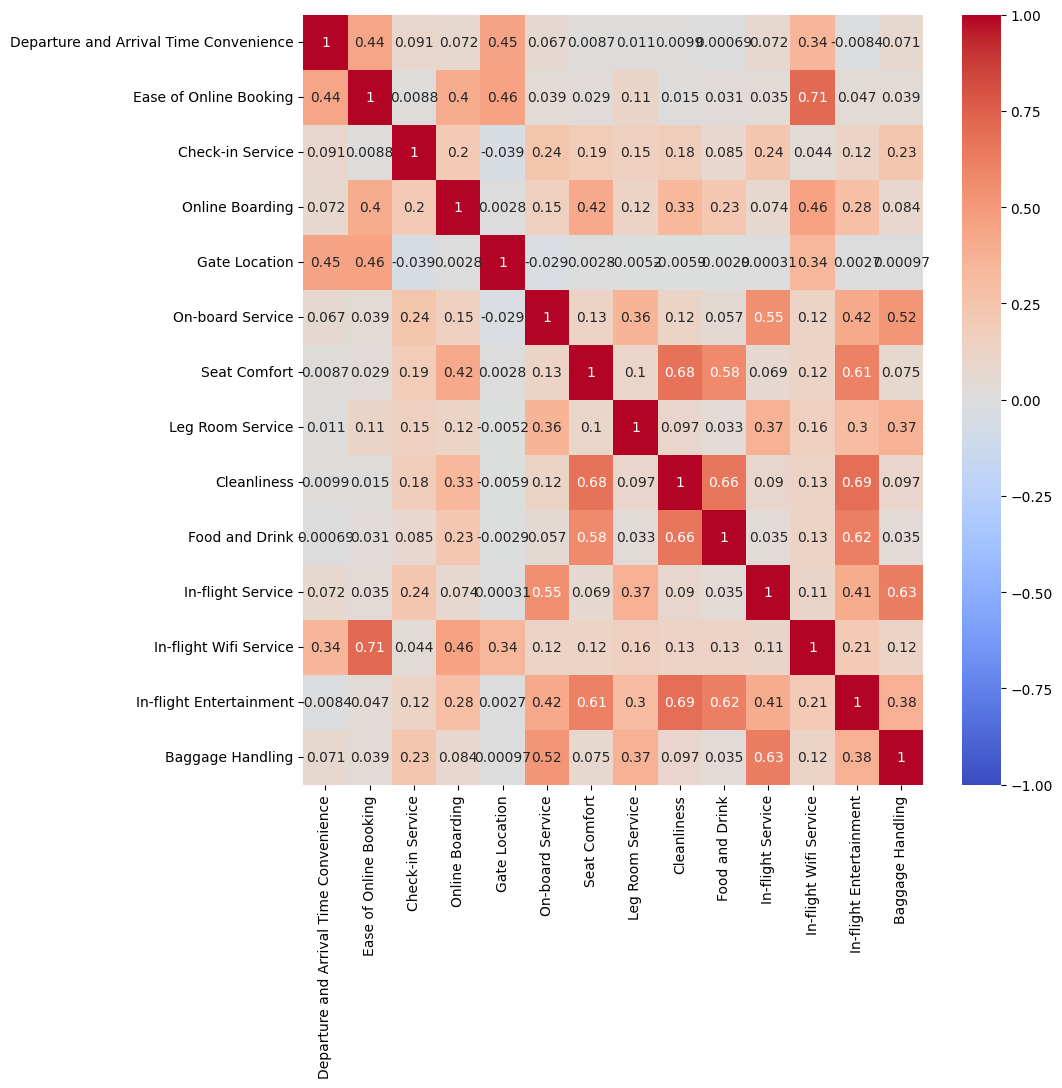

In [ ]:
#Pearson correlation
corelation = cor_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corelation, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.savefig('correlation.png')
plt.show()

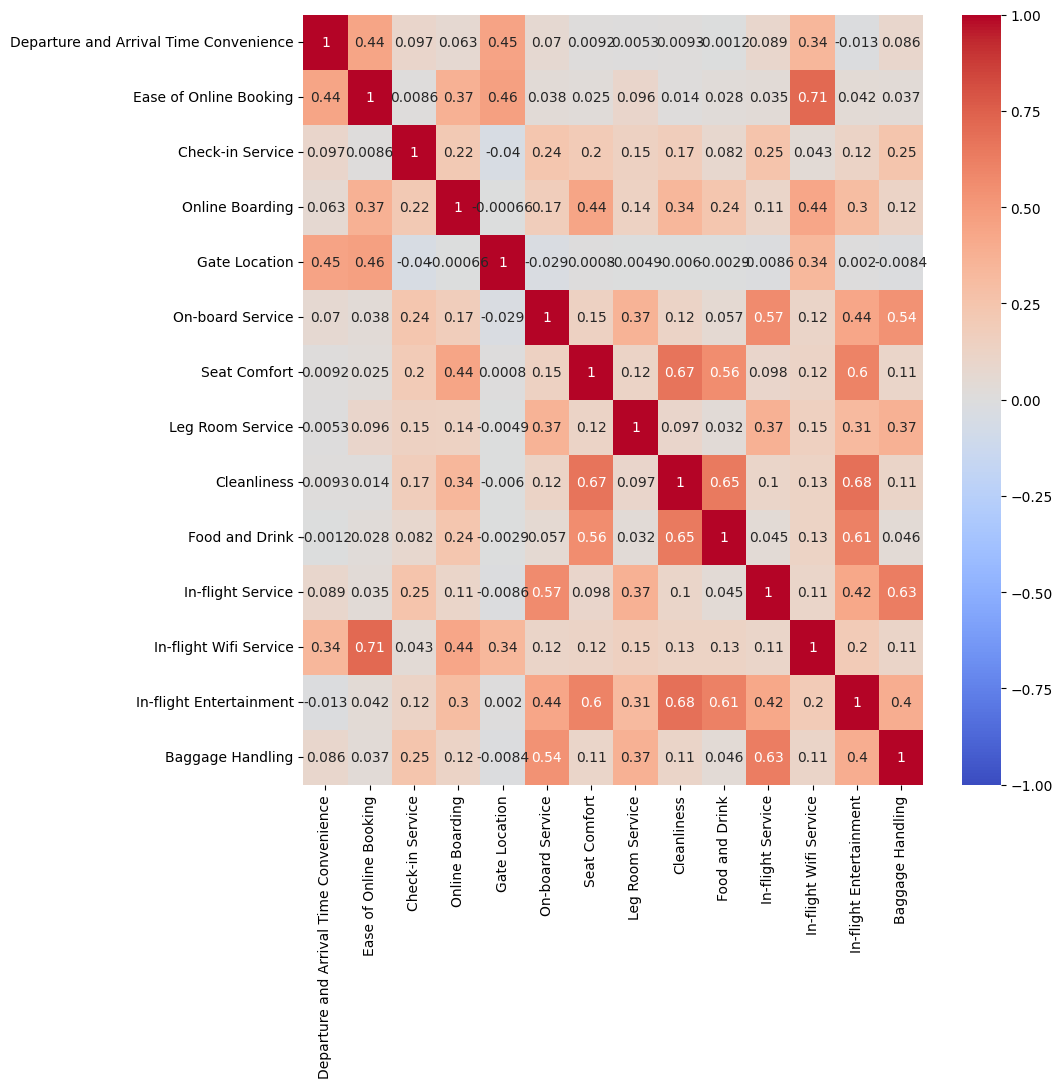

In [ ]:
# Separman correlation
corelation_spearman = cor_df.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corelation_spearman, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
#plt.savefig('correlation.png')
plt.show()

In [ ]:
data.head()

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
ID                                                                        
1     Male   48    First-time       Business  Business              821   
2   Female   35     Returning       Business  Business              821   
3     Male   41     Returning       Business  Business              853   
4     Male   50     Returning       Business  Business             1905   
5   Female   49     Returning       Business  Business             3470   

    Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
ID                                                                           
1                 2              5                                       3   
2                26             39                                       2   
3                 0              0                                       4   
4                 0              0                                       2   
5                 0              1                                       3   

    Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  \
ID                                                                             
1                        3                 4                3              3   
2                        2                 3                5              2   
3                        4                 4                5              4   
4                        2                 3                4              2   
5                        3                 3                5              3   

    On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
ID                                                                  
1                  3             5                 2            5   
2                  5             4                 5            5   
3                  3             5                 3            5   
4                  5             5                 5            4   
5                  3             4                 4            5   

    Food and Drink  In-flight Service  In-flight Wifi Service  \
ID                                                              
1                5                  5                       3   
2                3                  5                       2   
3                5                  3                       4   
4                4                  5                       2   
5                4                  3                       3   

    In-flight Entertainment  Baggage Handling             Satisfaction  
ID                                                                      
1                         5                 5  Neutral or Dissatisfied  
2                         5                 5                Satisfied  
3                         3                 3                Satisfied  
4                         5                 5                Satisfied  
5                         3                 3                Satisfied

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = data.drop('Satisfaction', axis='columns')
y = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100, stratify=data['Satisfaction'])

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(103904, 22) (25976, 22) (103904,) (25976,)


In [ ]:
rf_1 = RandomForestClassifier(random_state = 20)
rf_1.fit(x_train, y_train)

ValueError: could not convert string to float: 'Male'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assuming these are your categorical features:
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create a ColumnTransformer to apply Label Encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', data.select_dtypes(exclude=['object']).columns.tolist()),  # Numerical features are passed through
        ('cat', Pipeline([('label', LabelEncoder())]), categorical_features)  # Categorical features are Label Encoded
    ])

# Create a pipeline with the preprocessor and the RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 25, max_features = 5, max_depth = 5, random_state=20))
])


# ----> Encode the target variable 'y' <----
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Now, fit the pipeline to your data using the encoded target variable:
rf_pipeline.fit(x_train, y_encoded)

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Gender                                  129880 non-null  object
 1   Age                                     129880 non-null  int64 
 2   Customer Type                           129880 non-null  object
 3   Type of Travel                          129880 non-null  object
 4   Class                                   129880 non-null  object
 5   Flight Distance                         129880 non-null  int64 
 6   Departure Delay                         129880 non-null  int64 
 7   Arrival Delay                           129880 non-null  int64 
 8   Departure and Arrival Time Convenience  129880 non-null  int64 
 9   Ease of Online Booking                  129880 non-null  int64 
 10  Check-in Service                        129880 non-null  int6

In [ ]:
data.columns


Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
col_list = ['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

# box plot function for normal analysis with hue as gender
def plot_boxplot(df, col_list):
  """Boxplot for each column in the given list.

  Args:
    df: The pandas DataFrame containing the data.
    col_list: A list of column names to plot.
  """
  for col in df.columns:
    if col in col_list:
      continue
    else:
      plt.figure(figsize=(6,6))
      sns.boxplot(data=df, y=col, hue='Gender')
      plt.title(f'{col}')
      plt.show()

#pass

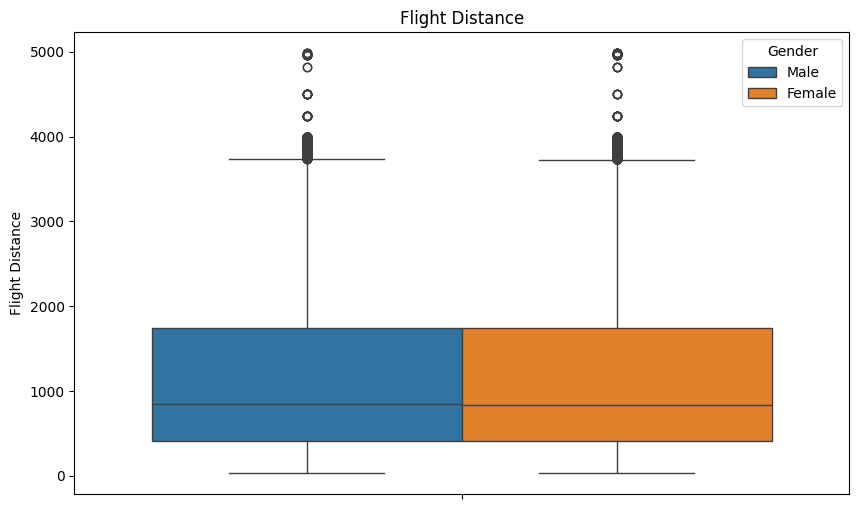

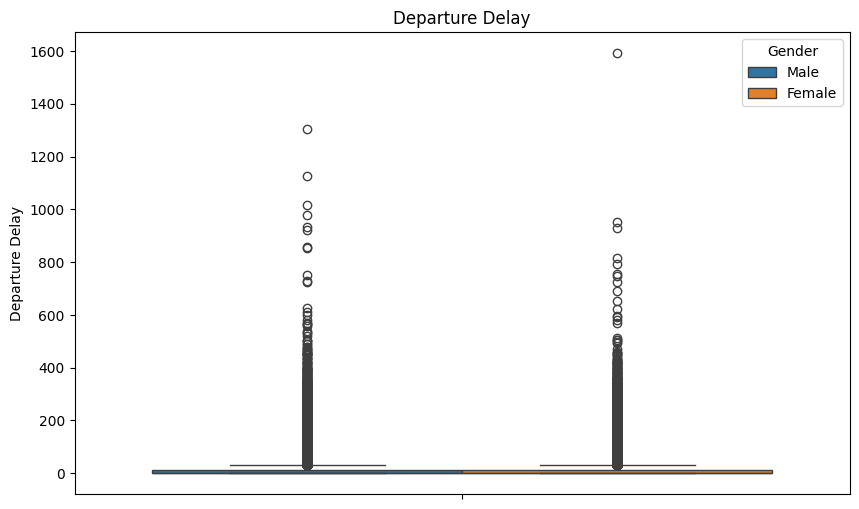

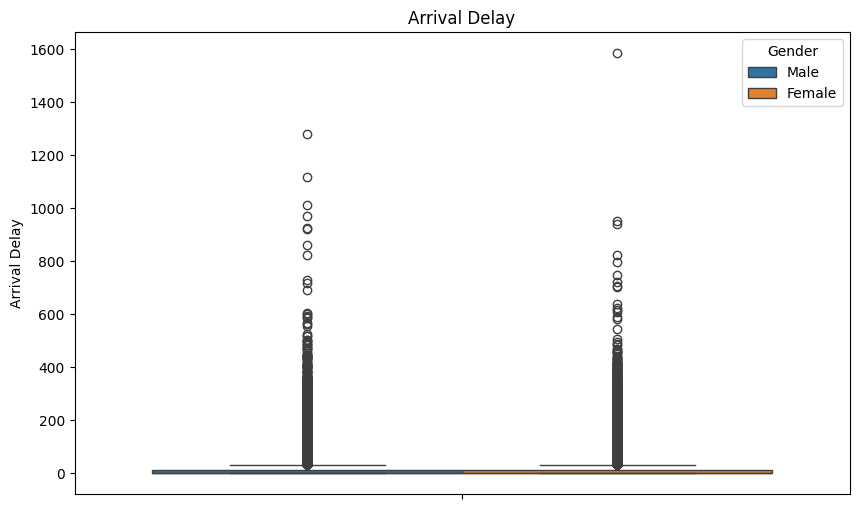

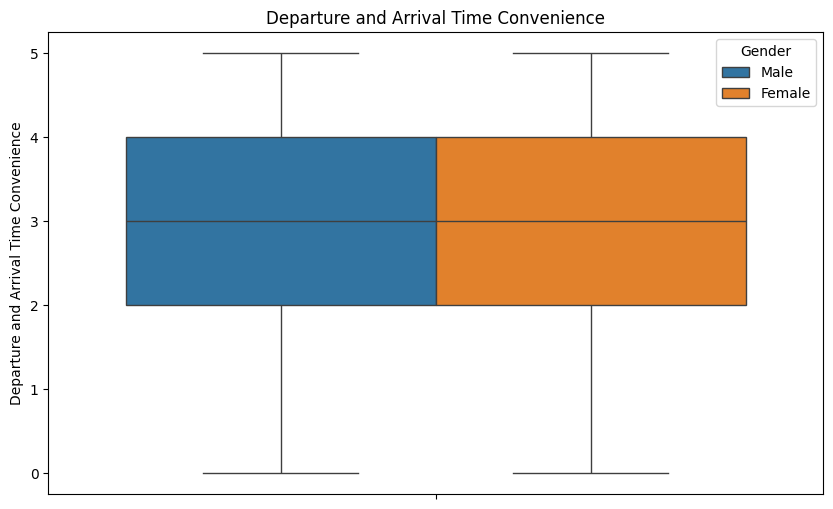

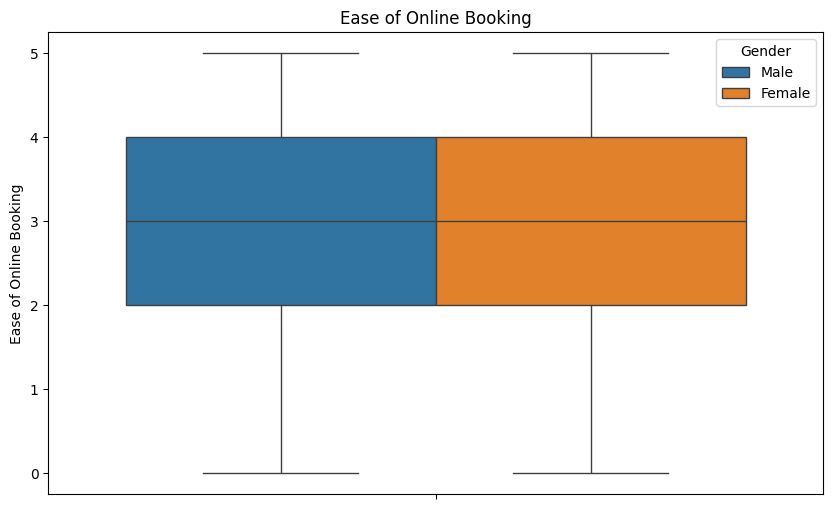

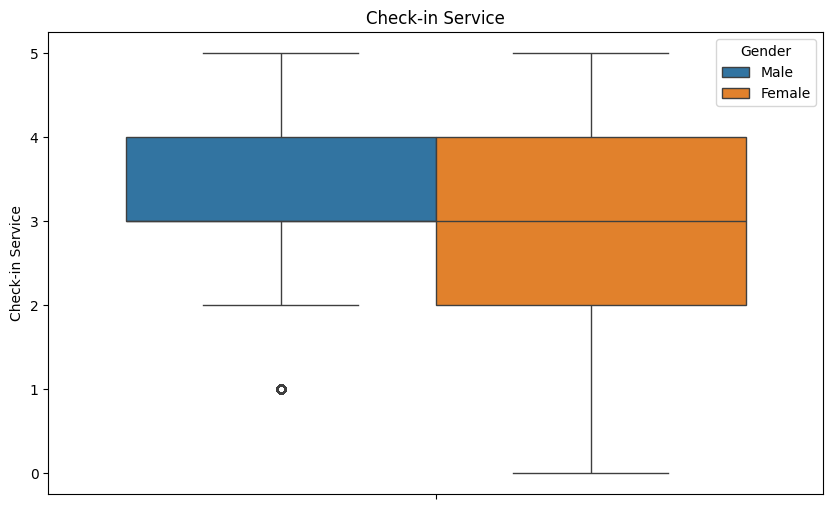

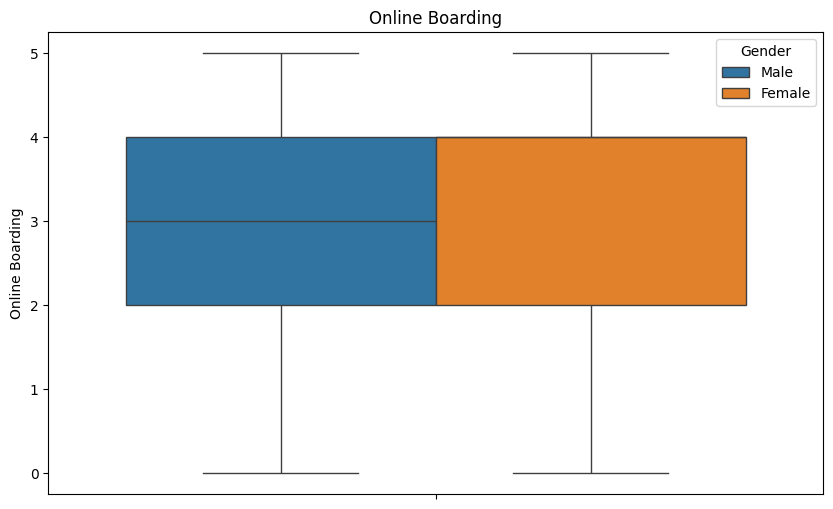

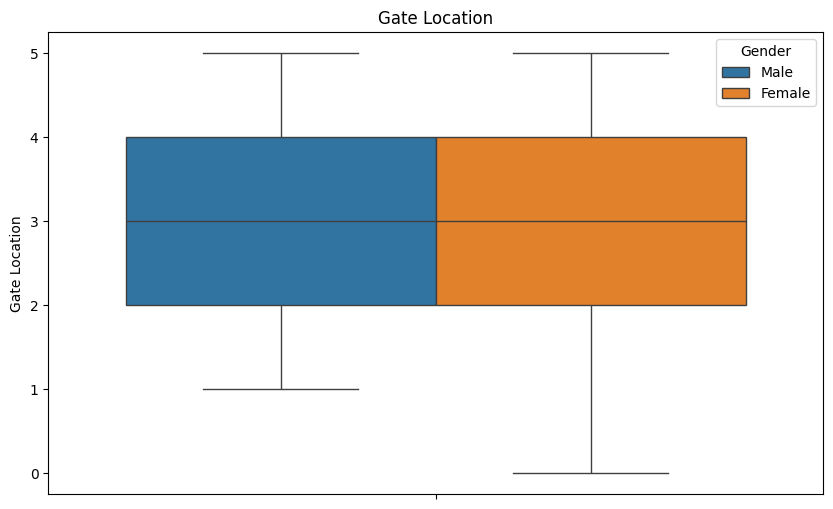

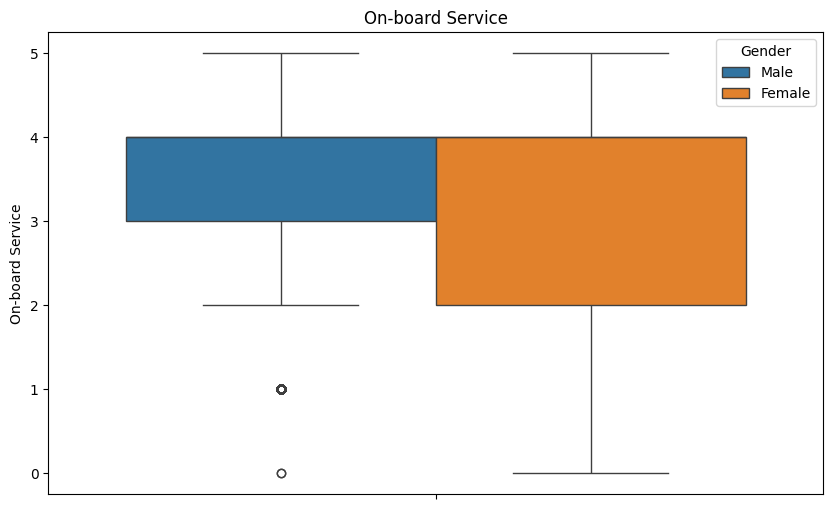

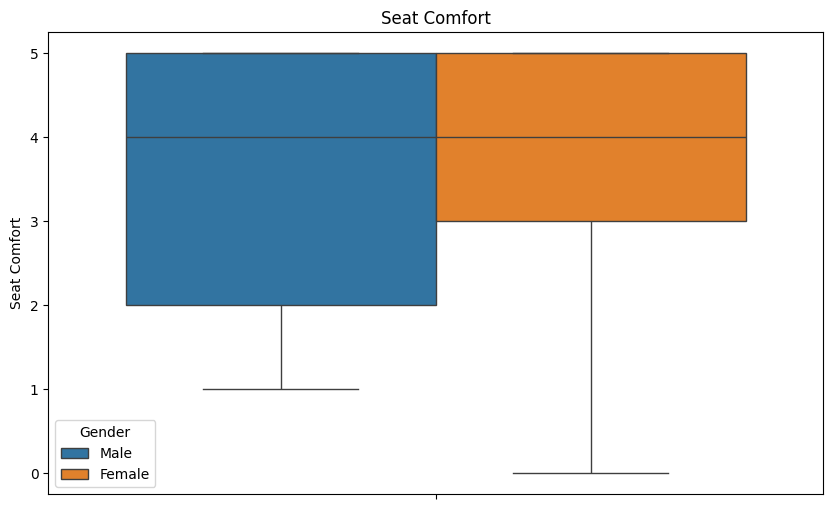

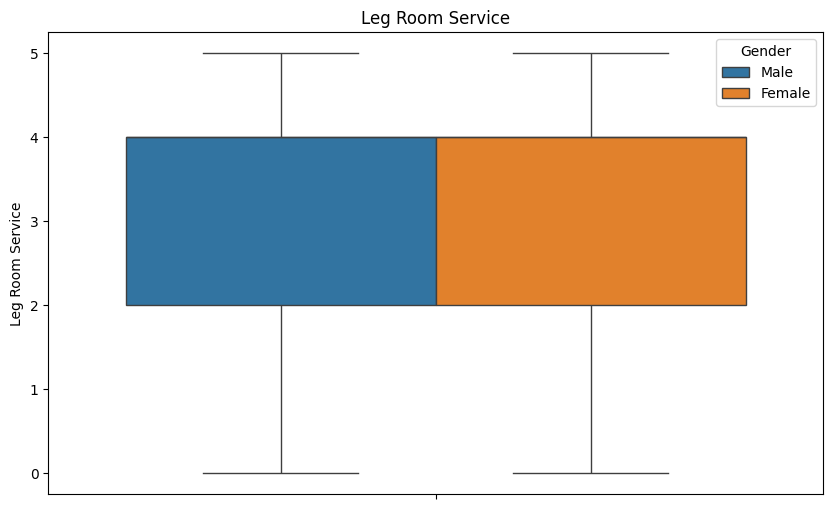

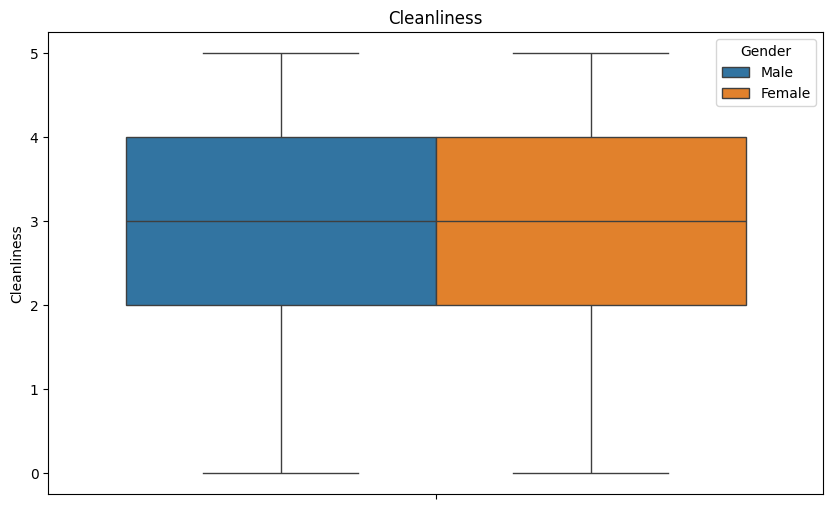

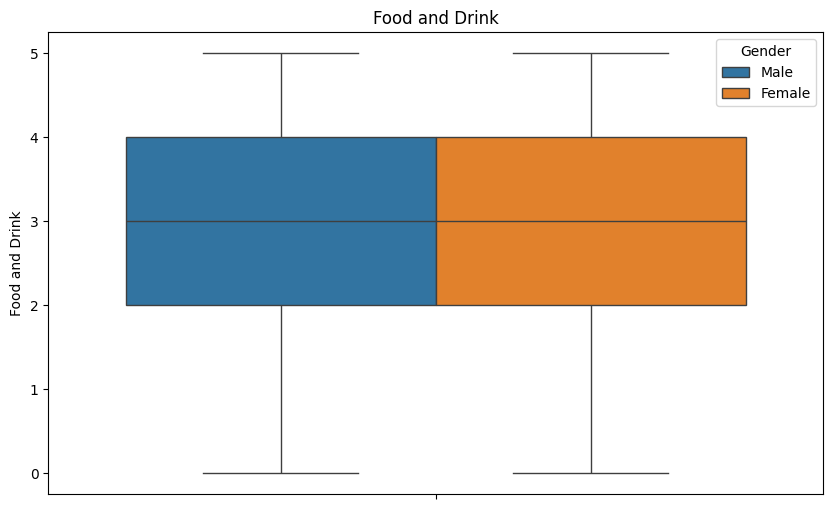

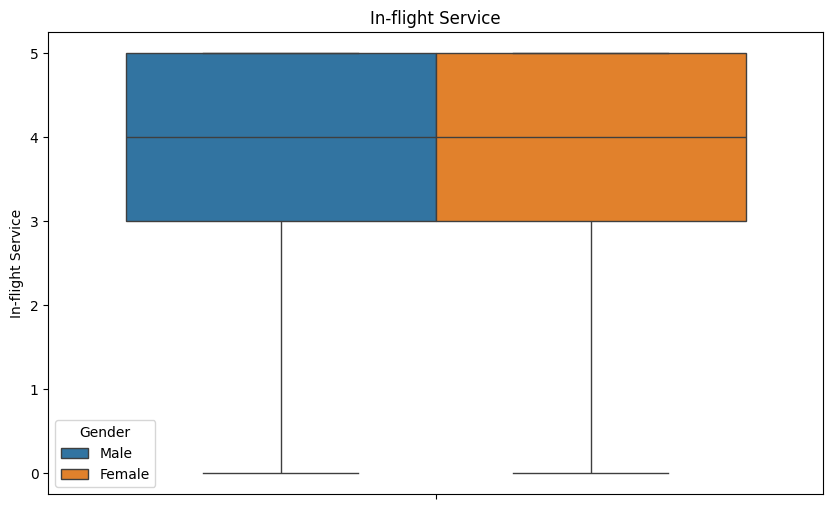

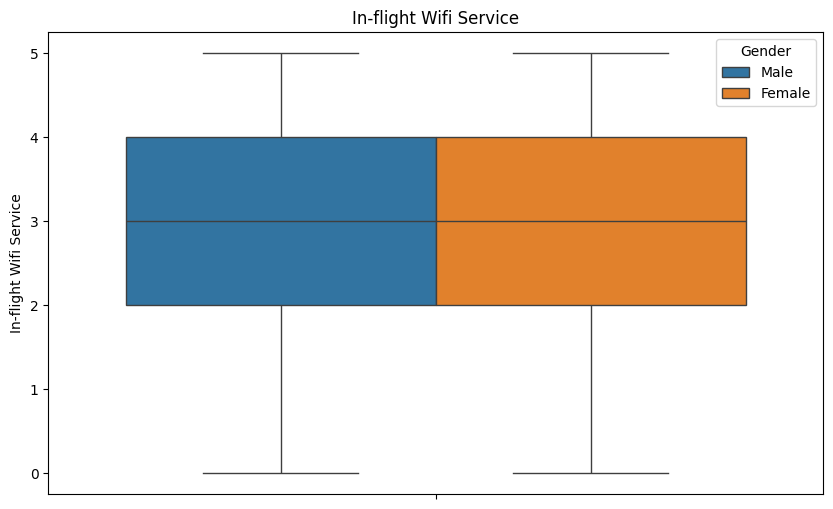

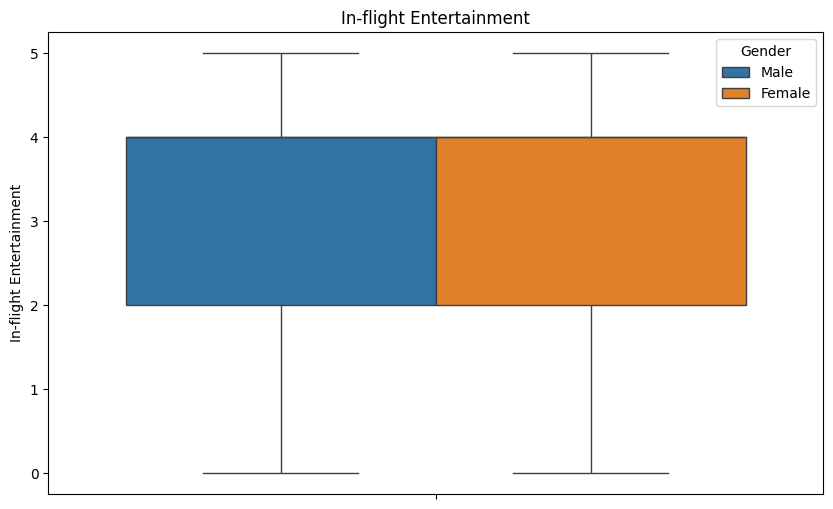

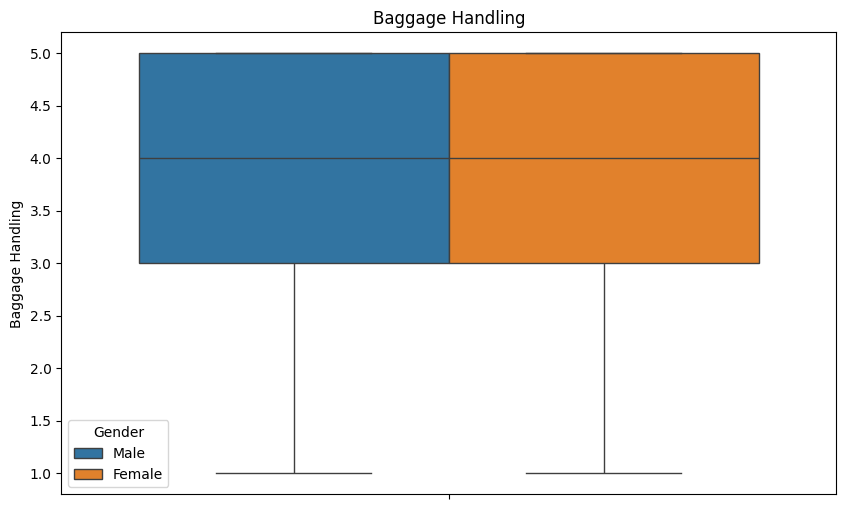

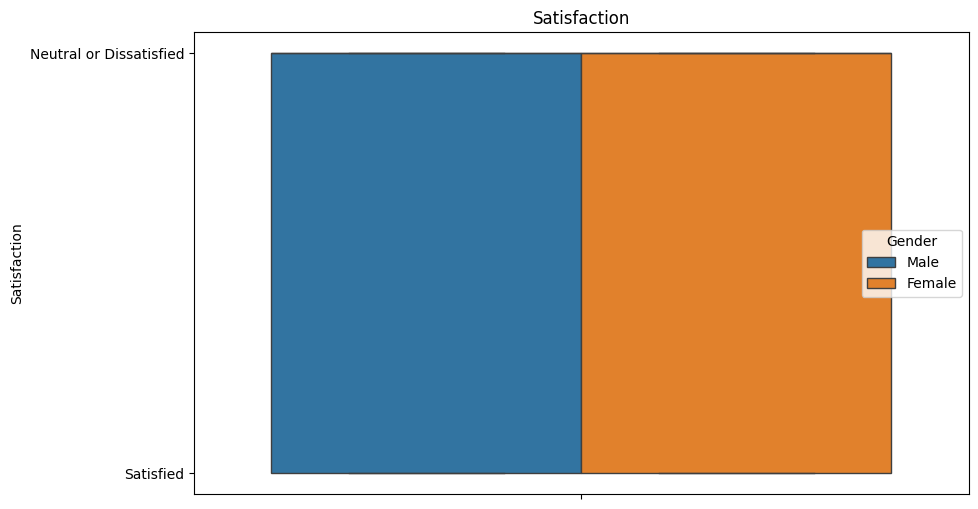

In [ ]:
plot_boxplot(data, col_list)

In [ ]:
# to see how gender affects different factors
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

In [ ]:
# box plot function for gender division

def plot_boxplot_gender(df, col_list):
  """Boxplot for each column in the given list.

  Args:
    df: The pandas DataFrame containing the data.
    col_list: A list of column names to plot.
  """
  for col in df.columns:
    if col in col_list:
      continue
    else:
      plt.figure(figsize=(6,6))
      sns.boxplot(data=df, y=col, hue='Satisfaction')
      plt.title(f'{col}')
      plt.show()

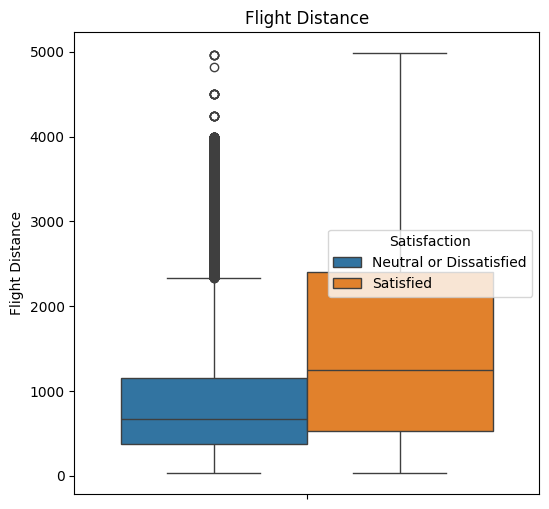

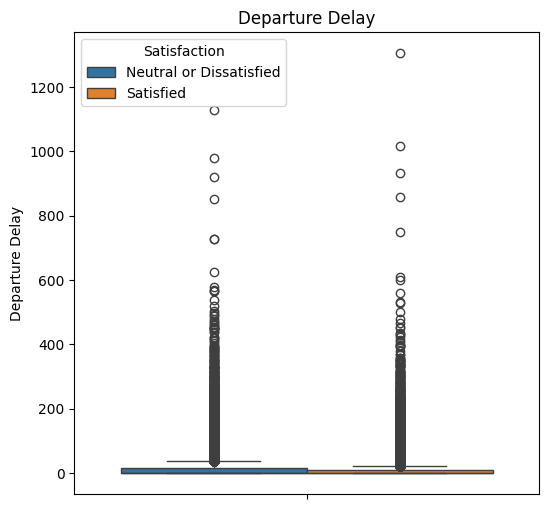

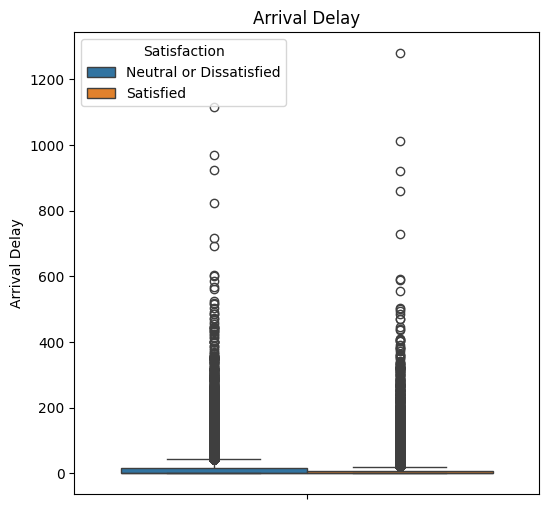

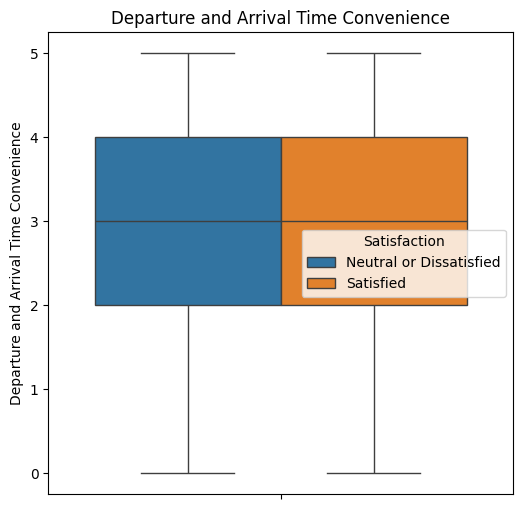

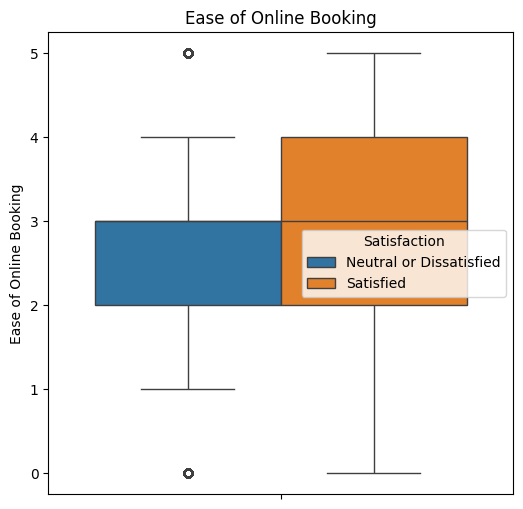

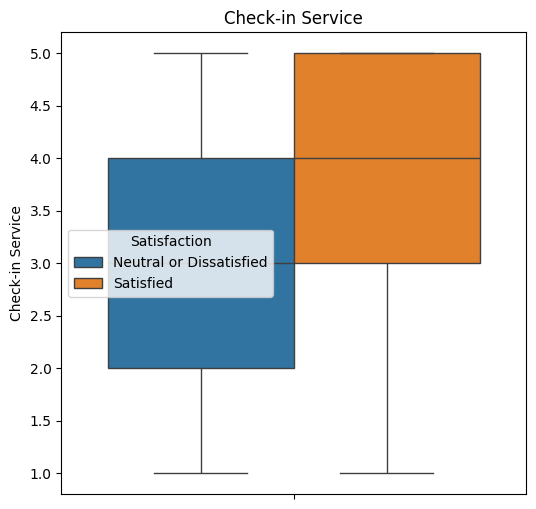

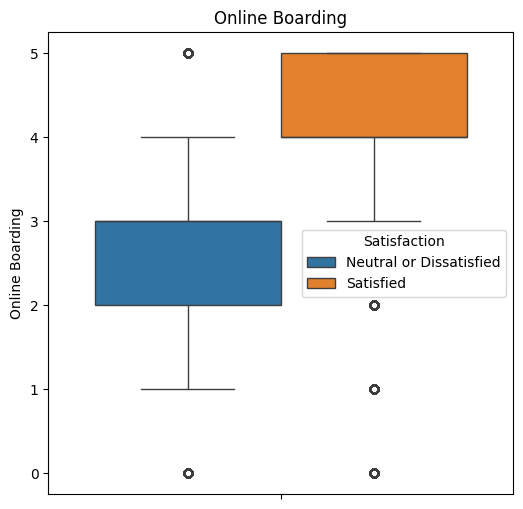

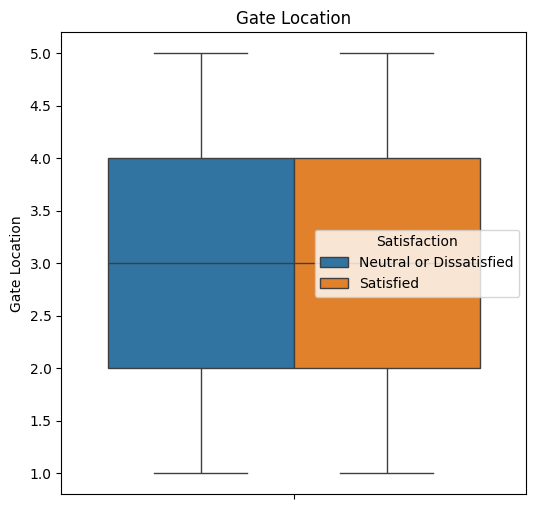

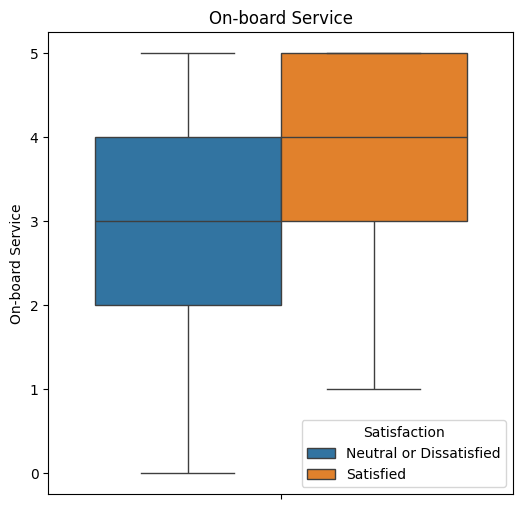

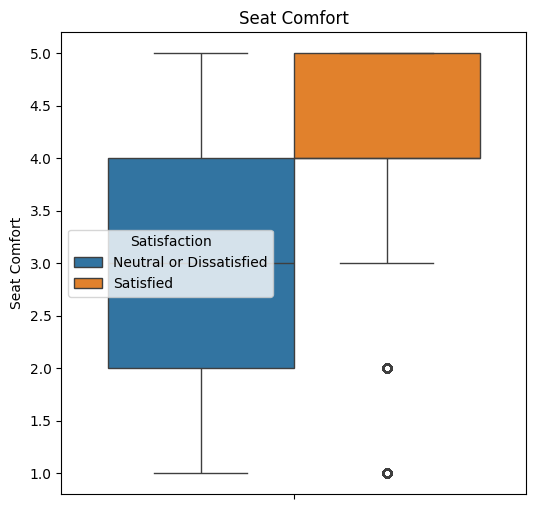

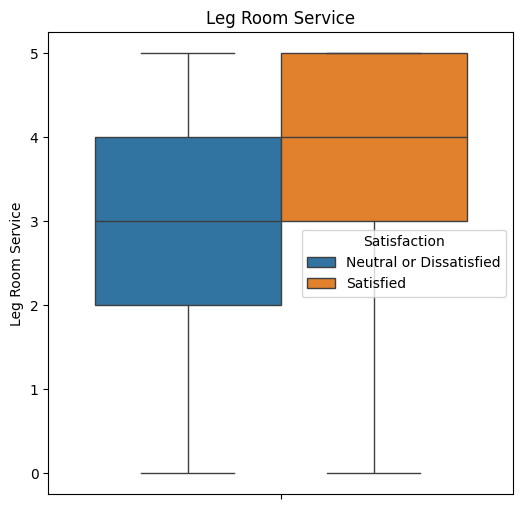

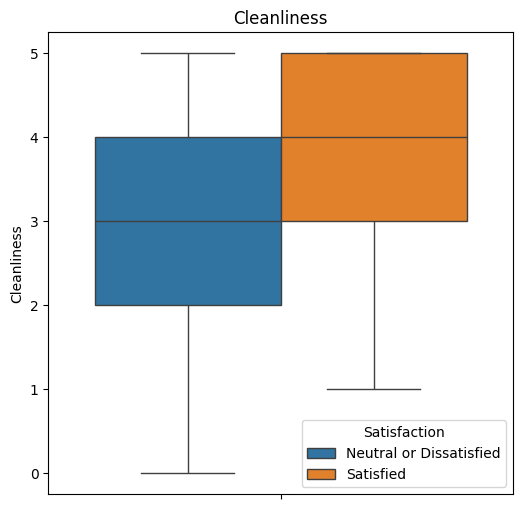

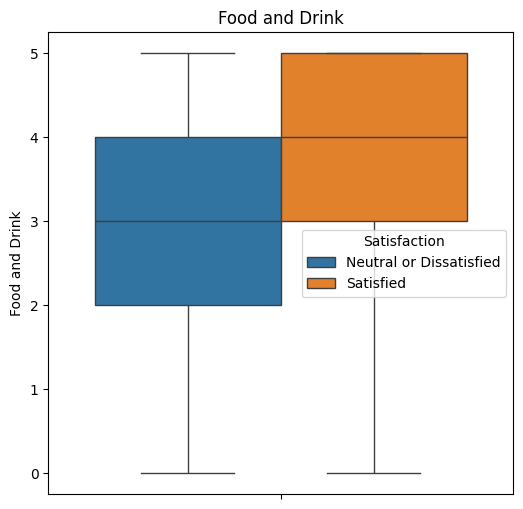

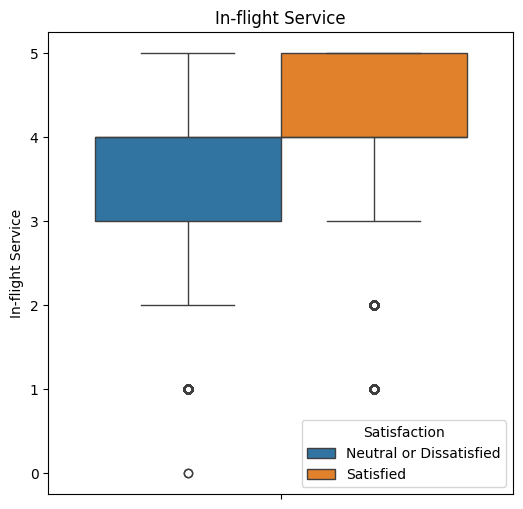

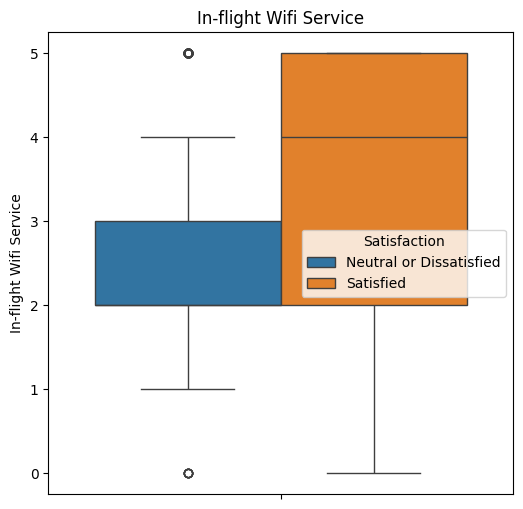

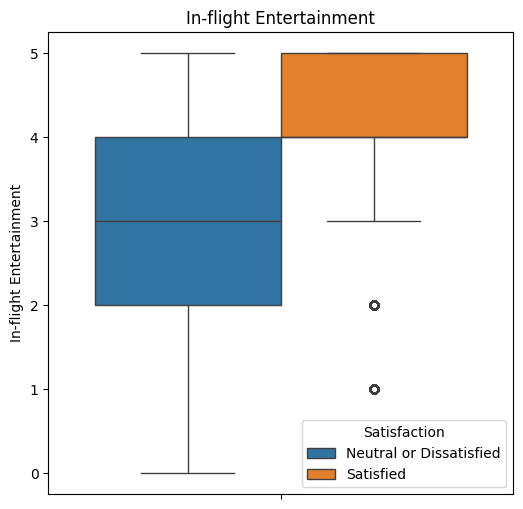

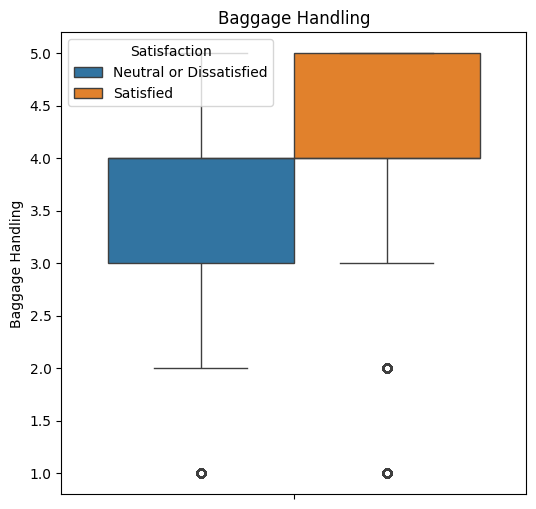

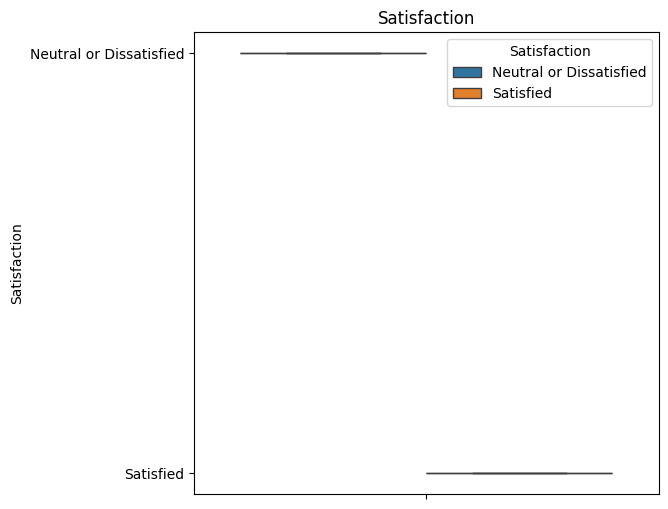

In [ ]:
plot_boxplot_gender(male_df, col_list)

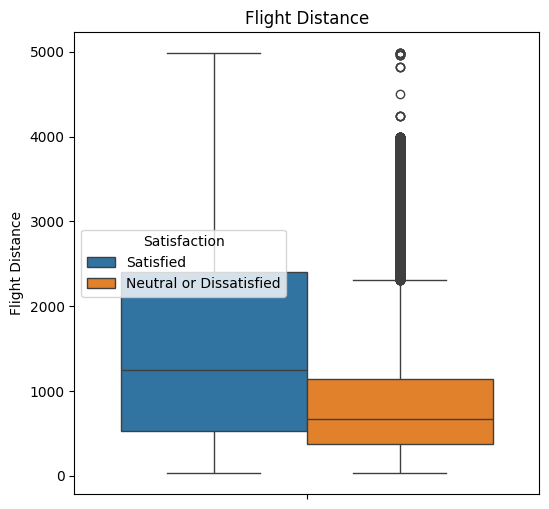

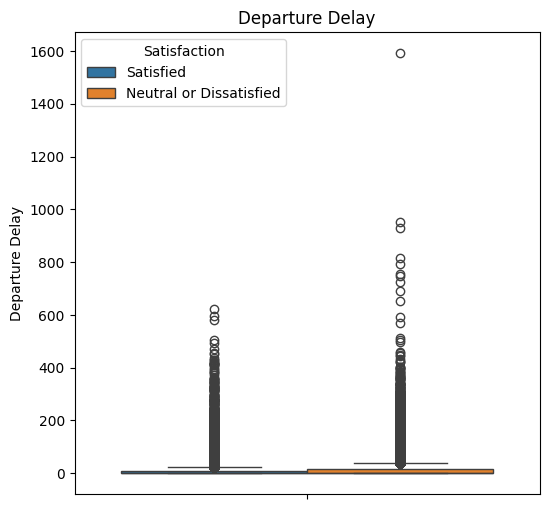

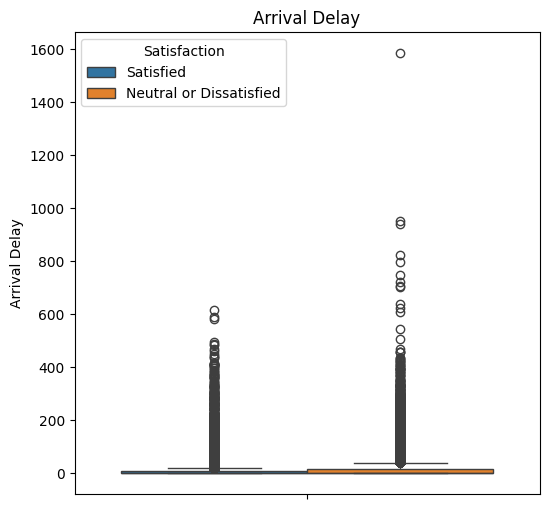

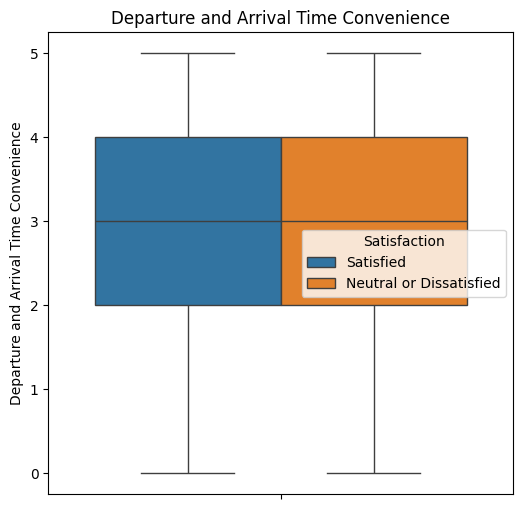

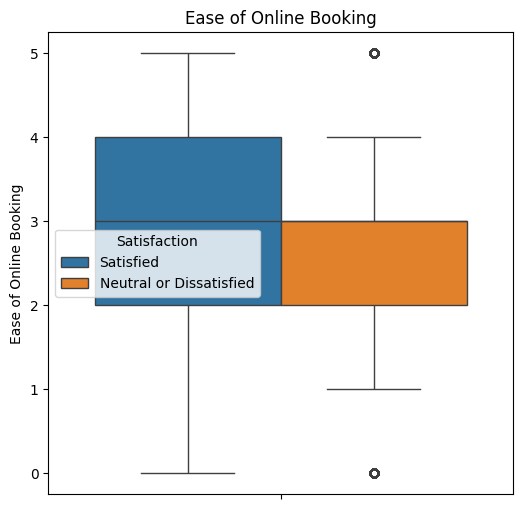

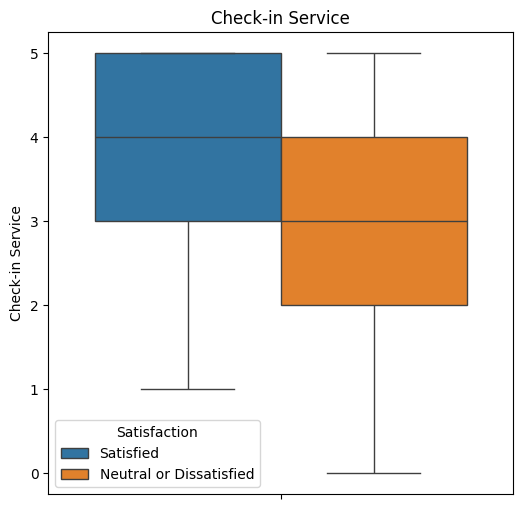

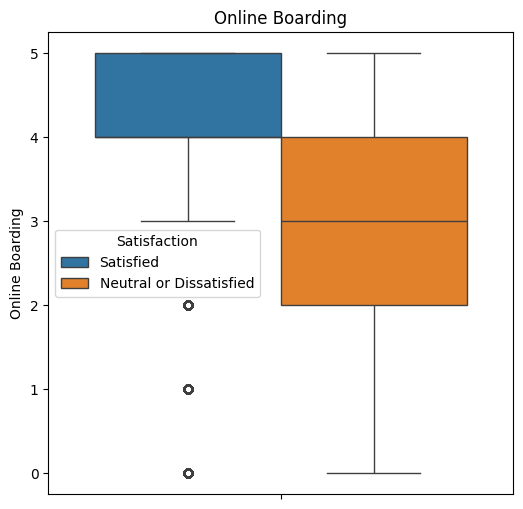

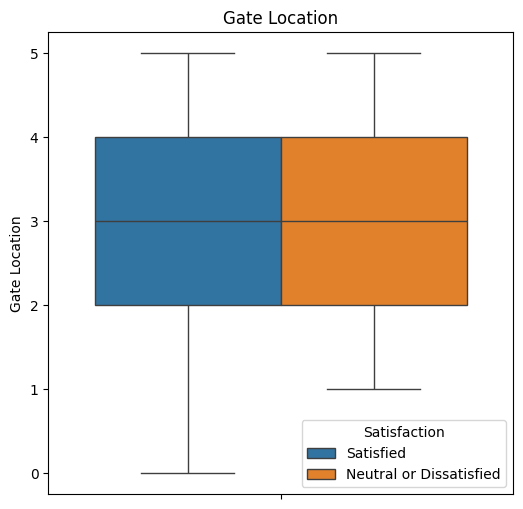

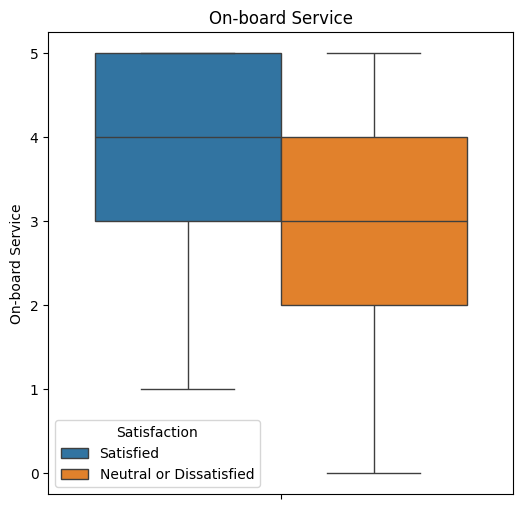

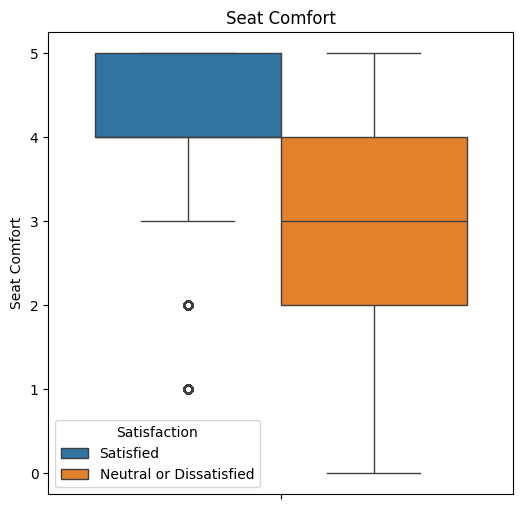

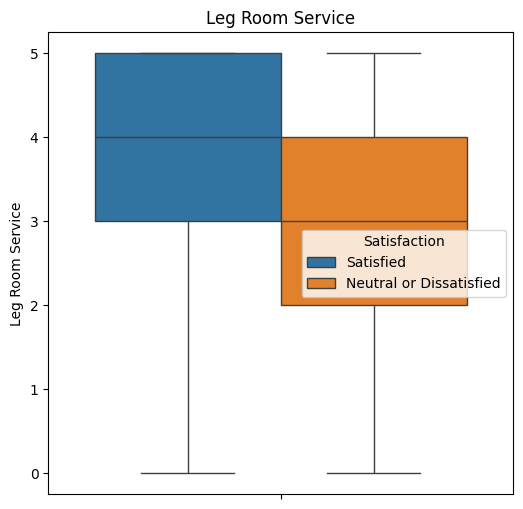

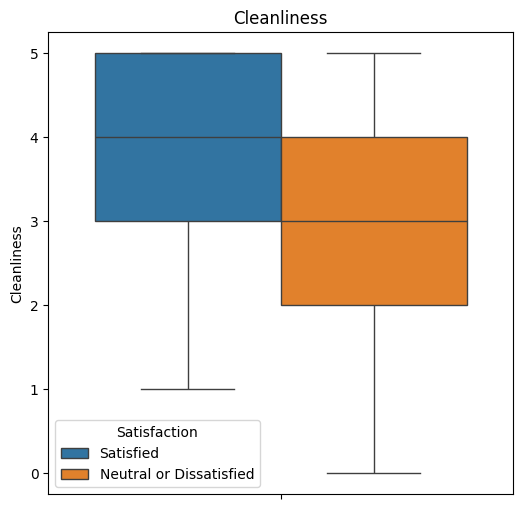

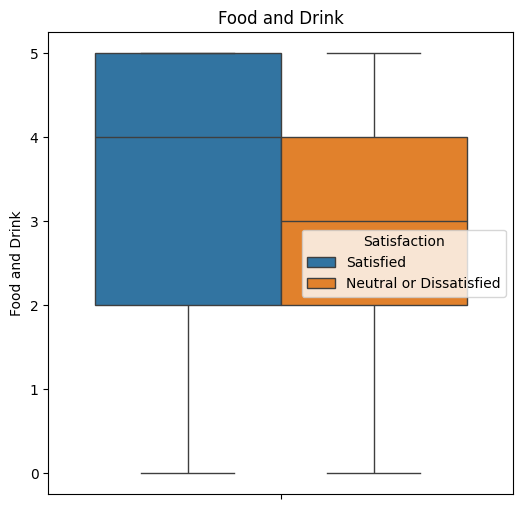

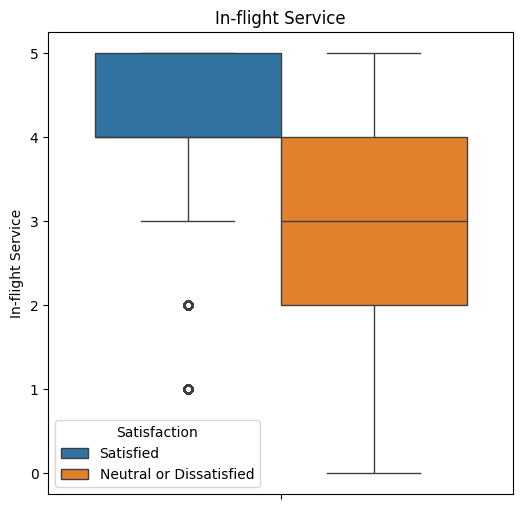

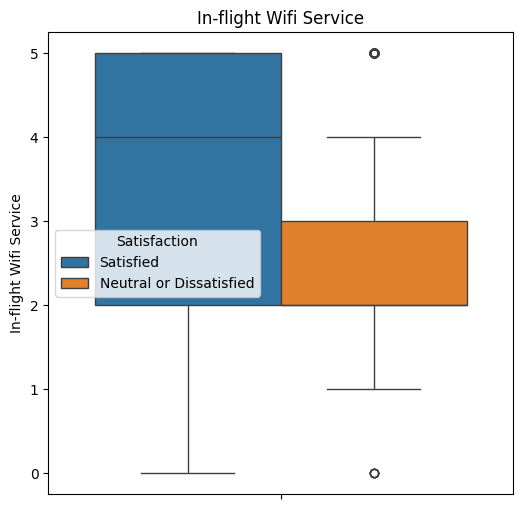

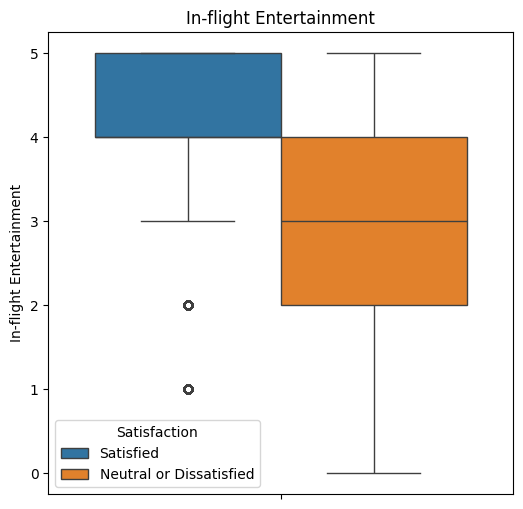

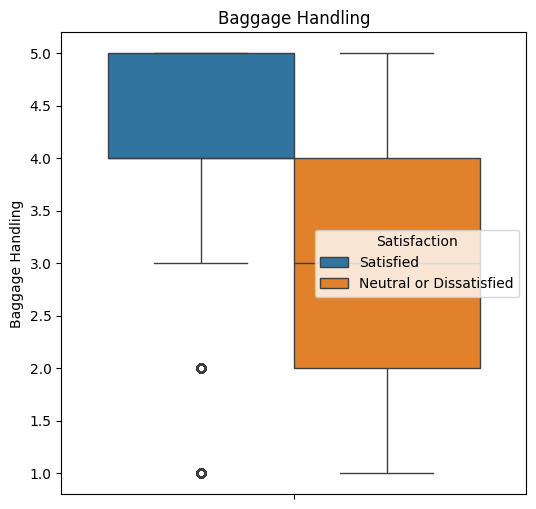

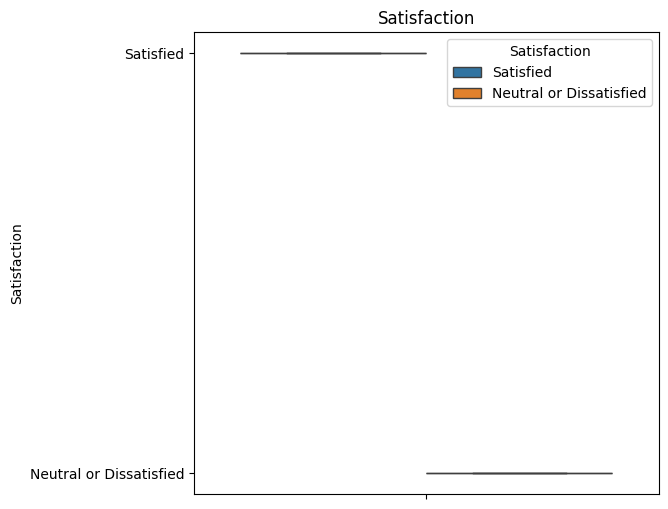

In [ ]:
plot_boxplot_gender(female_df, col_list)

In [ ]:
business_travel = data[data['Type of Travel'] == 'Business']
personal_travel = data[data['Type of Travel'] == 'Personal']

In [ ]:
# Box plot function for travel division

def plot_boxplot_travel(df, col_list):
  """Boxplot for each column in the given list.

  Args:
    df: The pandas DataFrame containing the data.
    col_list: A list of column names to plot.
  """
  for col in df.columns:
    if col in col_list:
      continue
    else:
      plt.figure(figsize=(6,6))
      sns.boxplot(data=df, y=col, hue='Satisfaction')
      plt.title(f'{col}')
      plt.show()

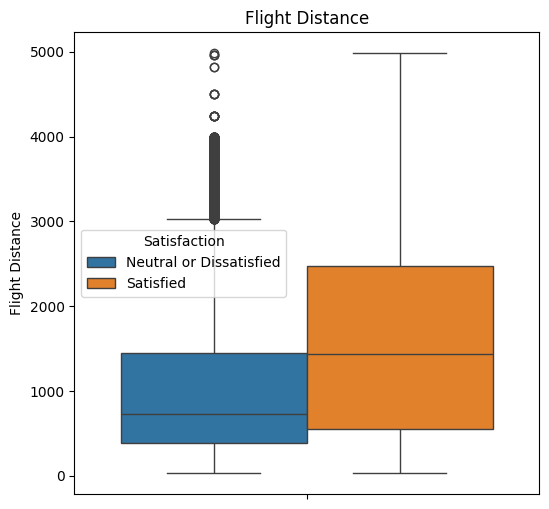

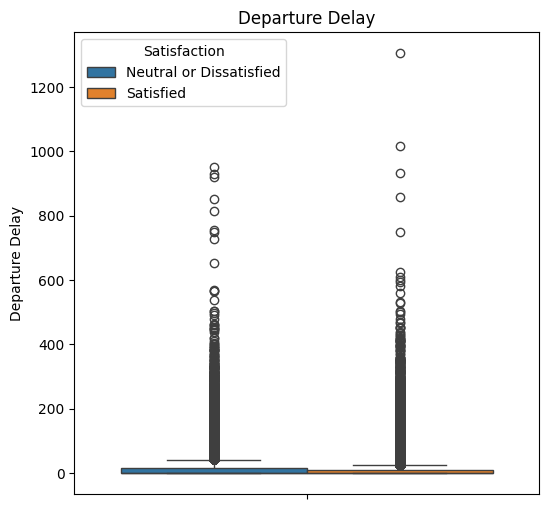

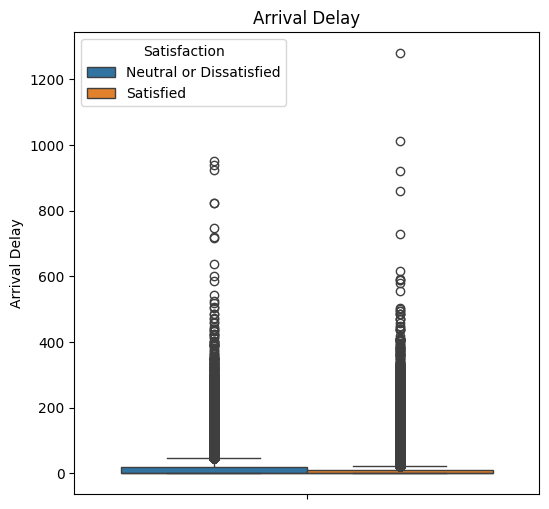

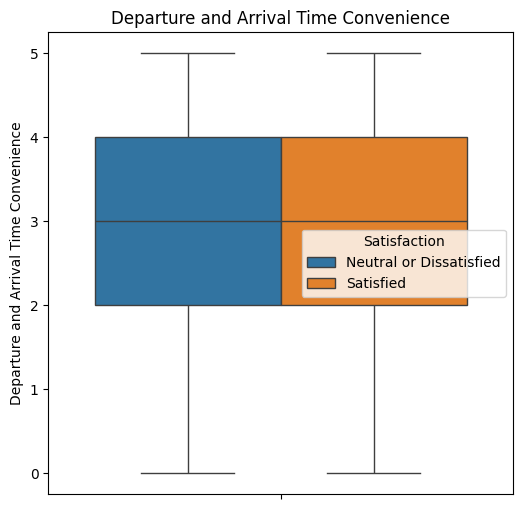

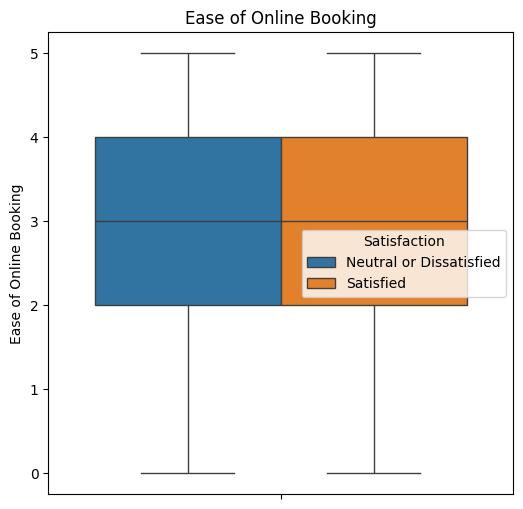

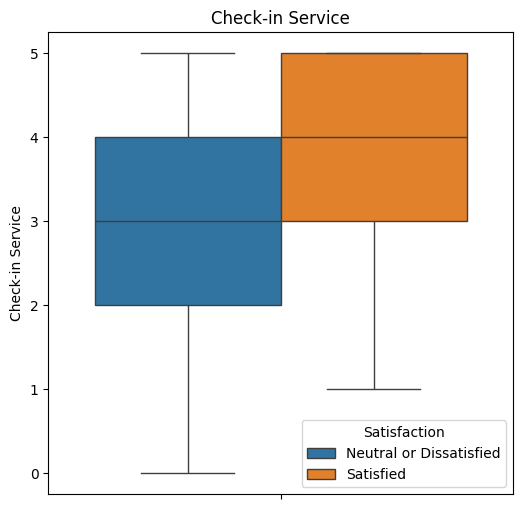

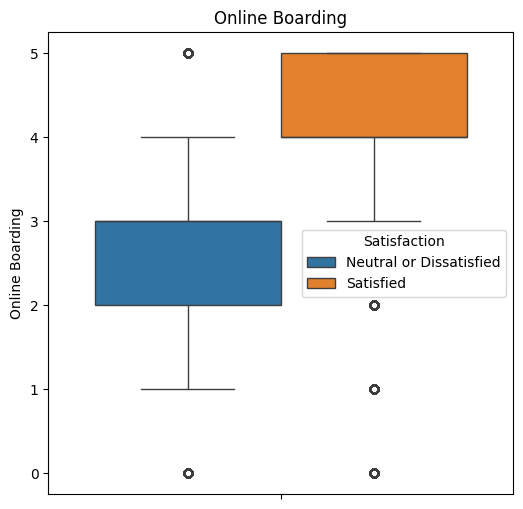

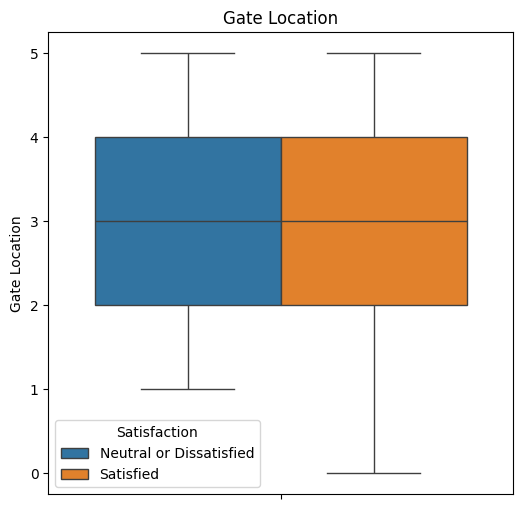

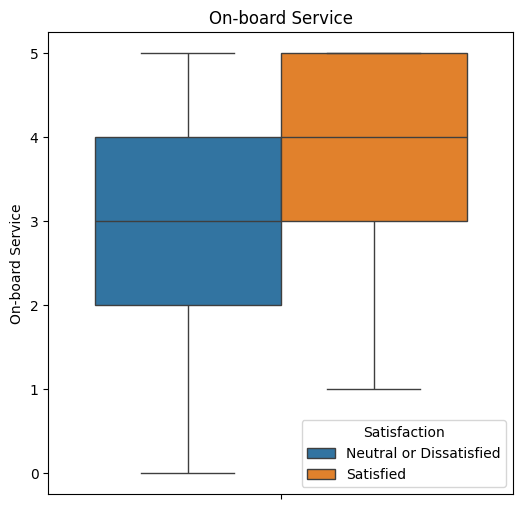

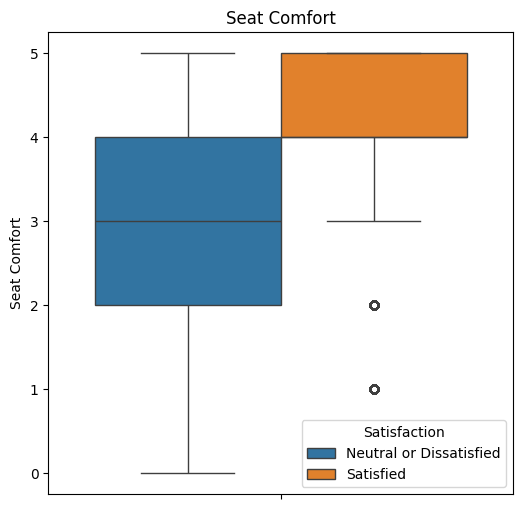

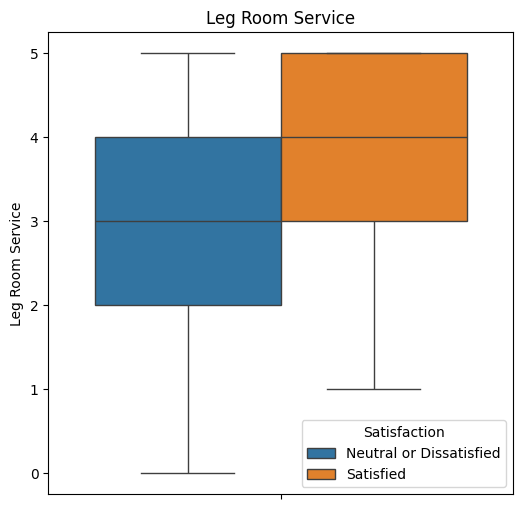

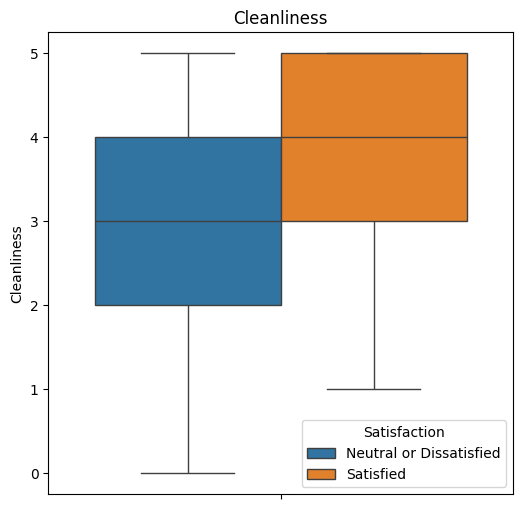

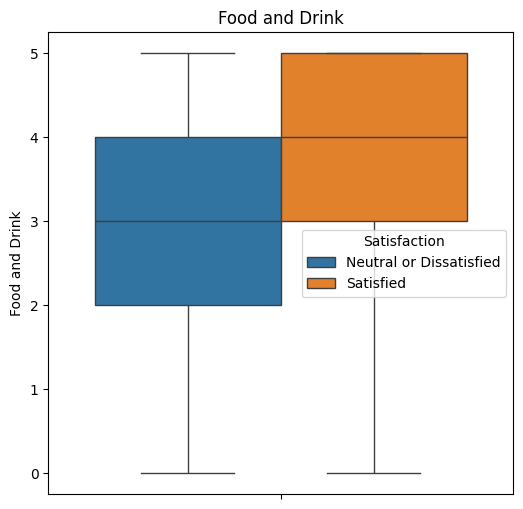

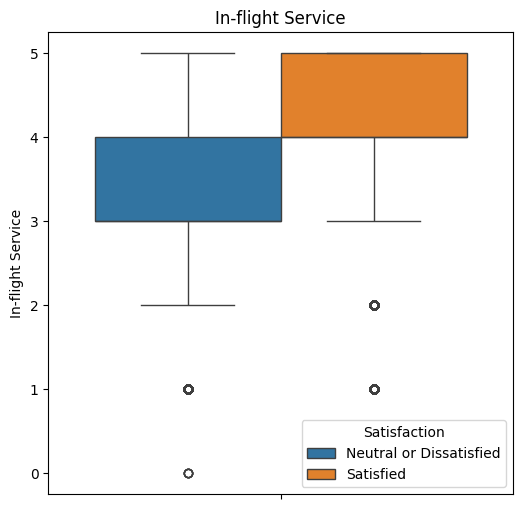

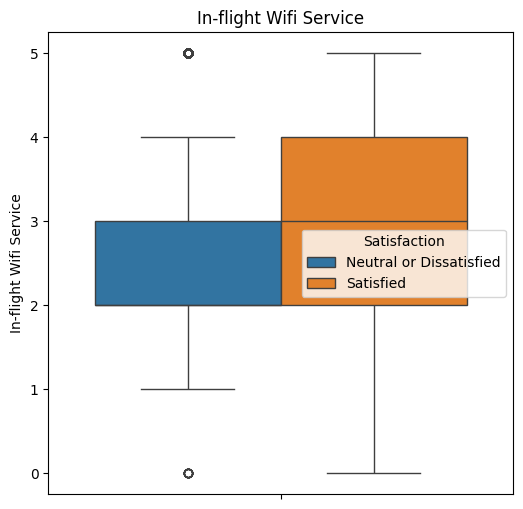

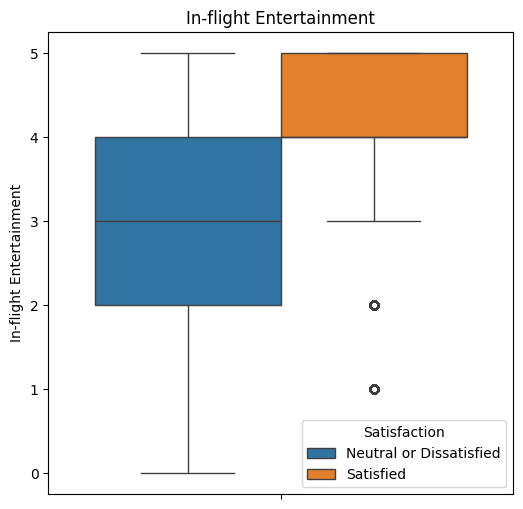

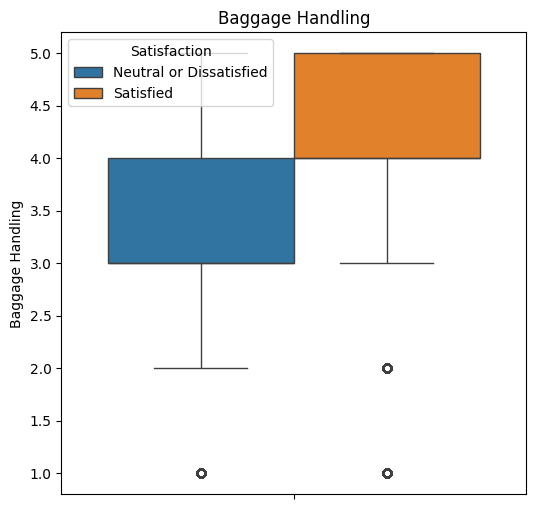

In [ ]:
plot_boxplot_travel(business_travel, col_list)

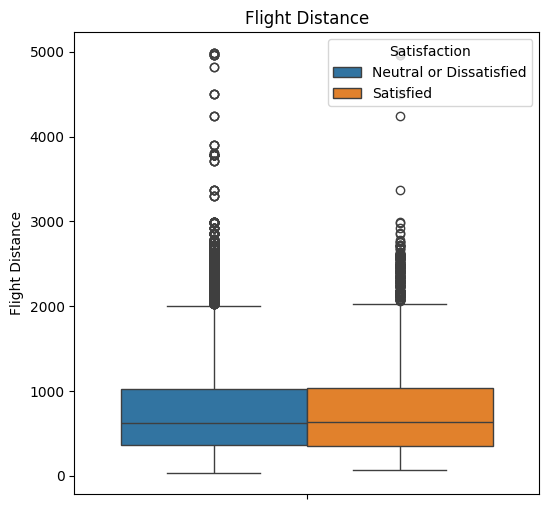

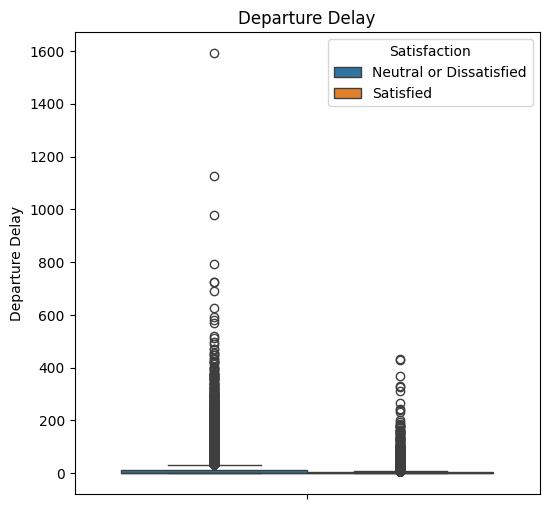

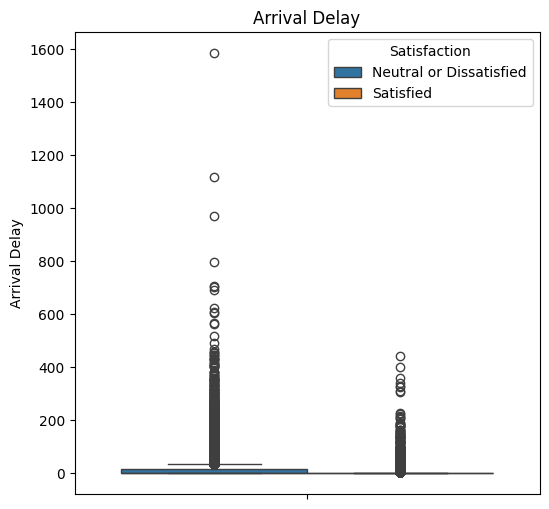

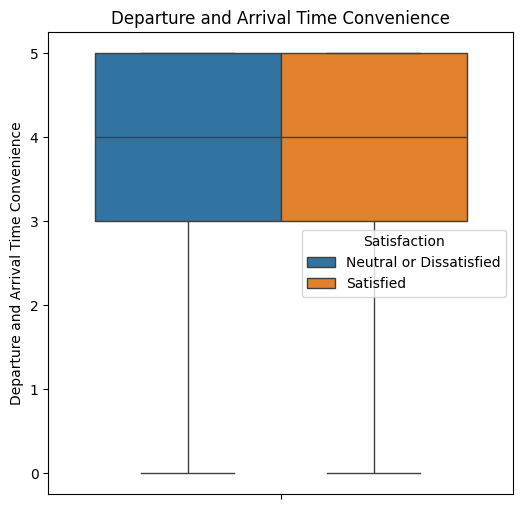

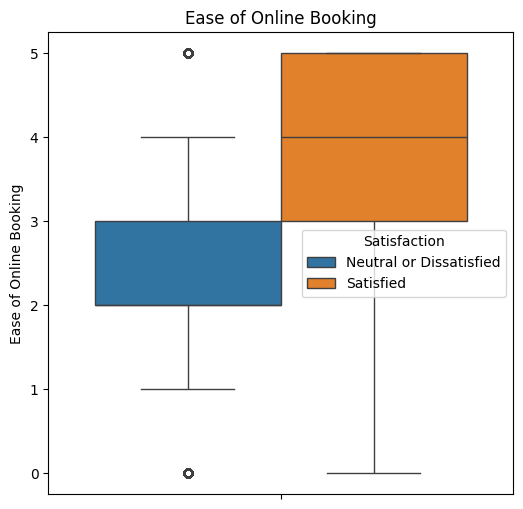

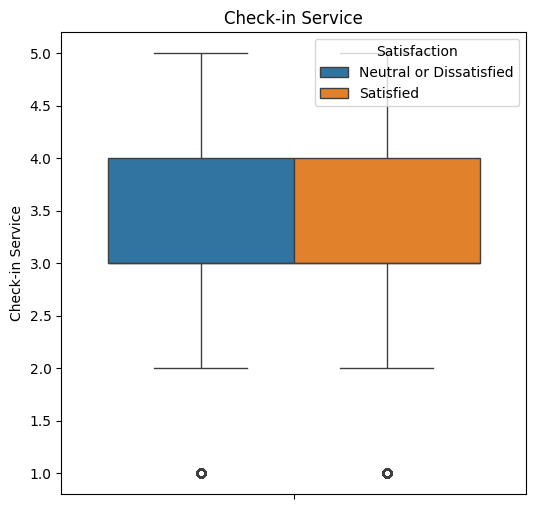

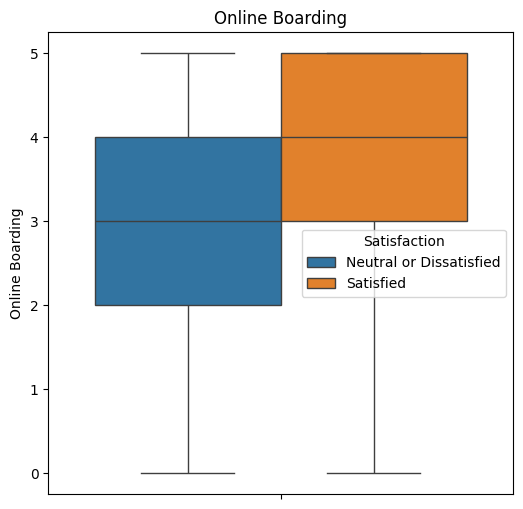

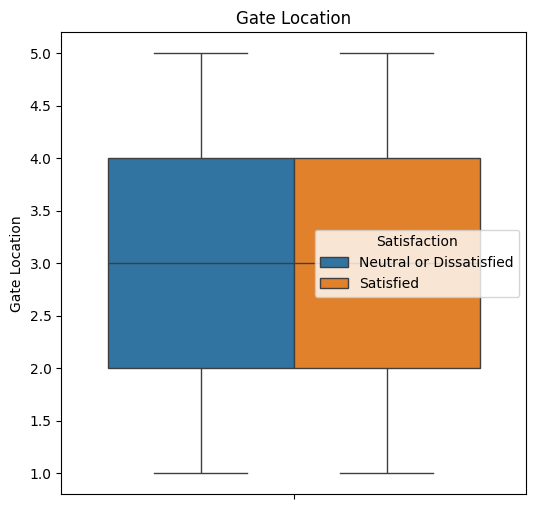

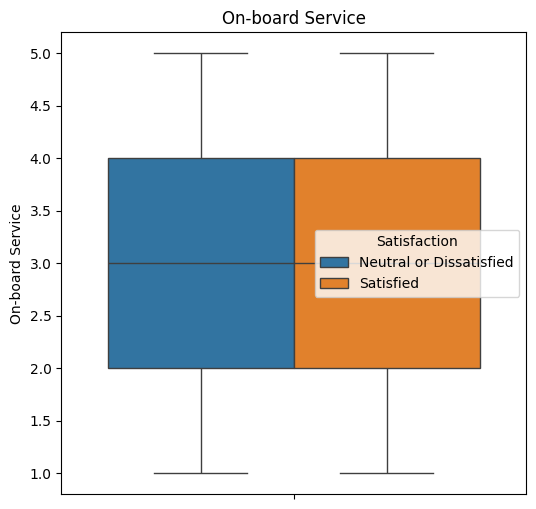

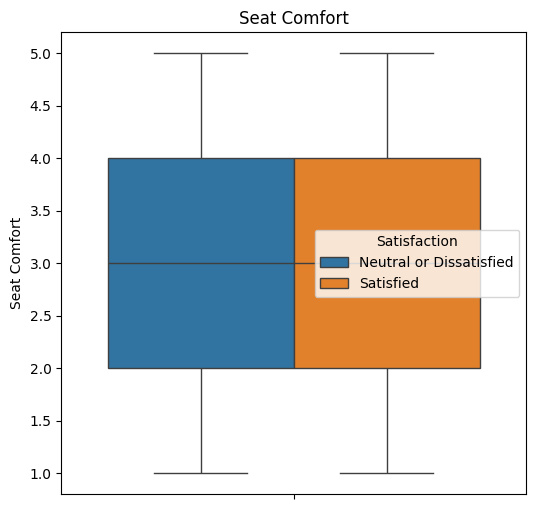

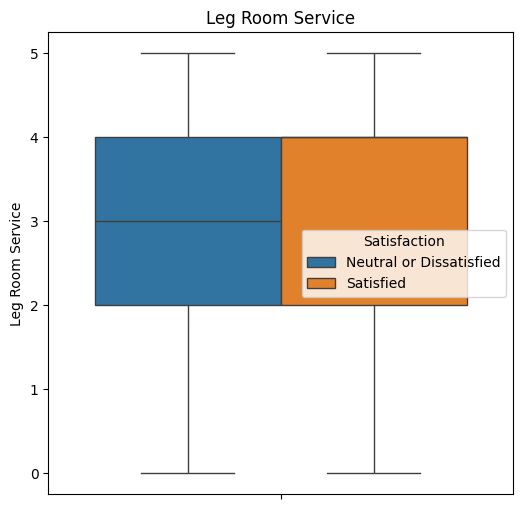

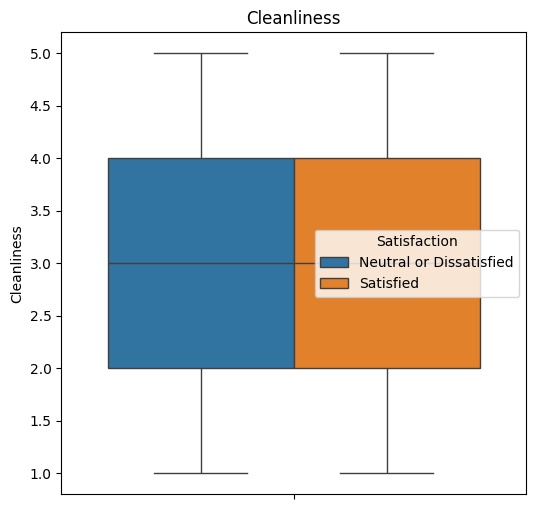

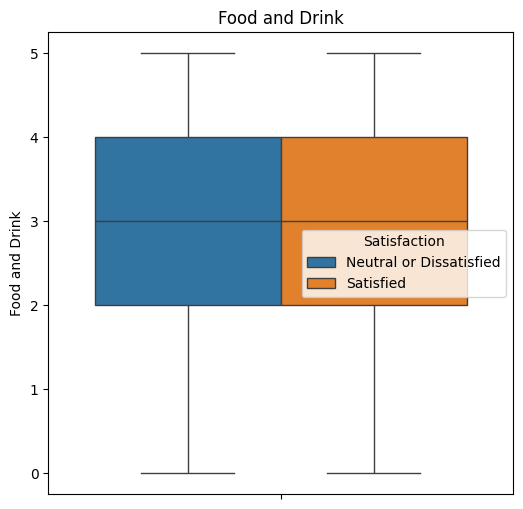

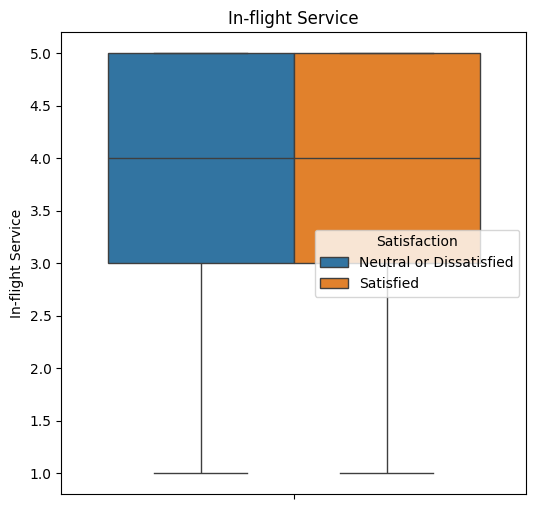

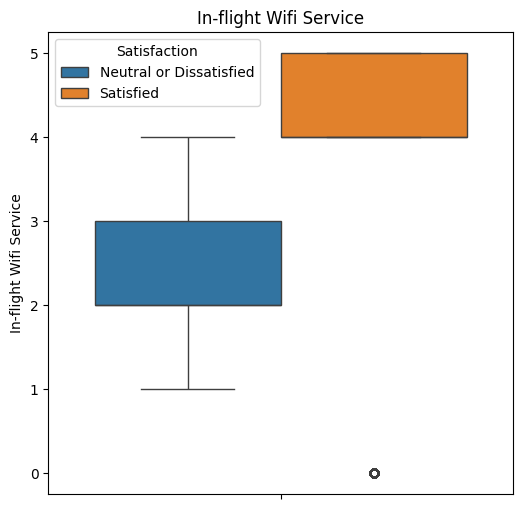

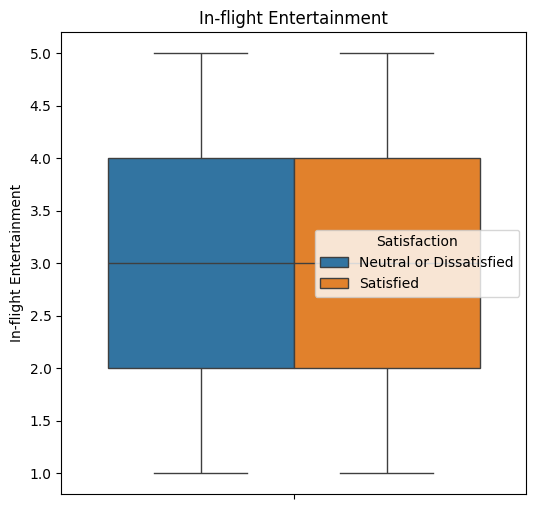

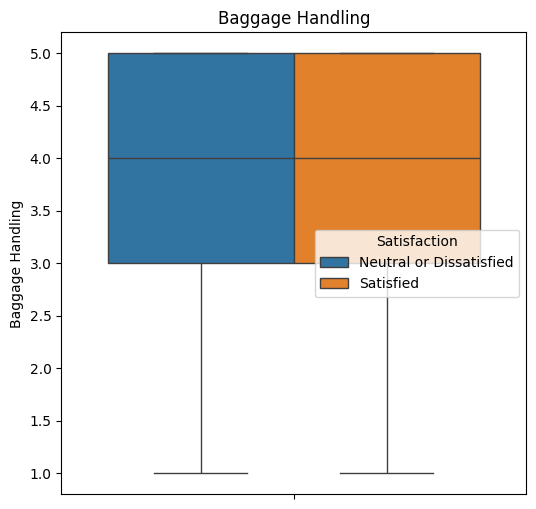

In [ ]:
plot_boxplot_travel(personal_travel, col_list)

In [ ]:
for col in ['col1', 'col2', 'col3', ...]:  # Rating columns
       grouped_data = data.groupby(col).agg({
           'numerical_col': ['mean', 'std'],  # Numerical features
           'categorical_col': ['count', 'nunique']  # Categorical features
       })
       print(grouped_data)

In [ ]:
# prompt: give a dataframe where departure delay is greater than arrival delay

# Assuming 'Departure Delay' and 'Arrival Delay' columns exist in your DataFrame 'data'
df_departure_greater_arrival = data[data['Departure Delay'] > data['Arrival Delay']]
df_arrival_greater_departure = data[data['Departure Delay'] < data['Arrival Delay']]

#### compare both delay and see if its impact the ratings based on gender and satisfaction

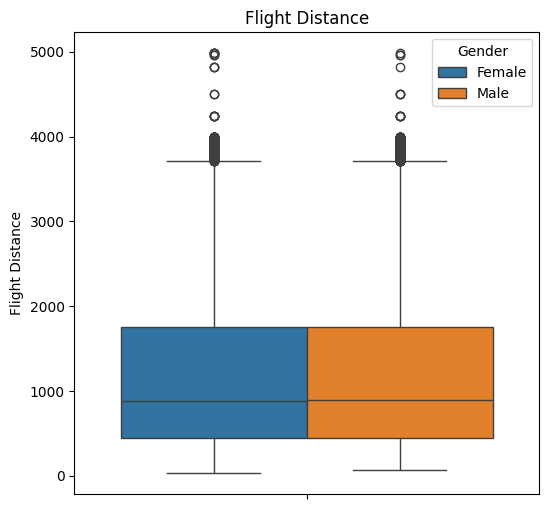

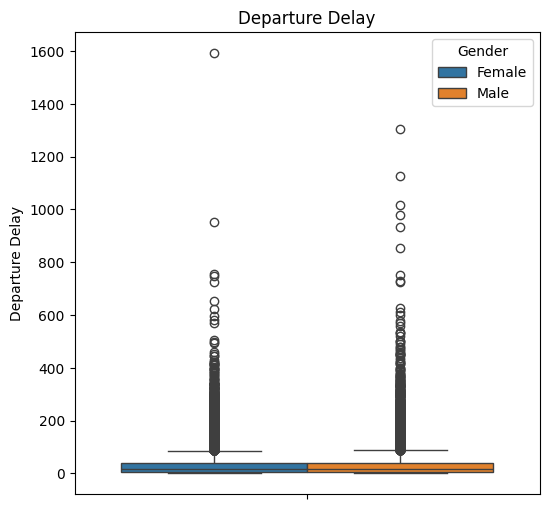

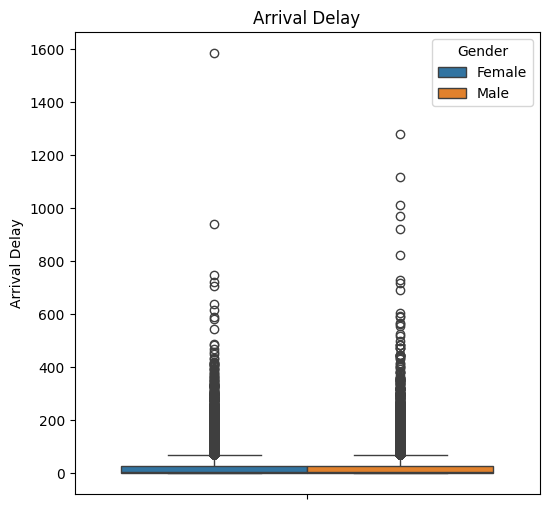

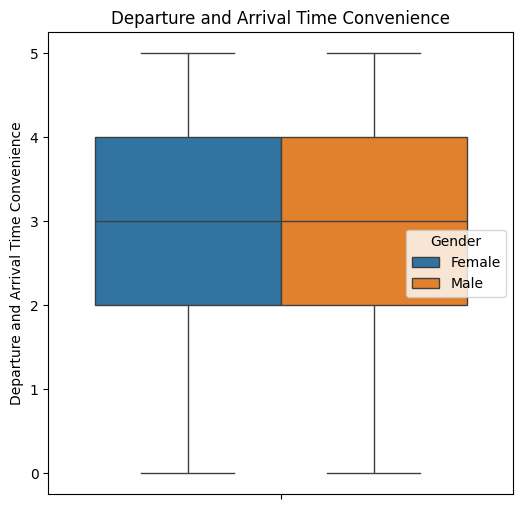

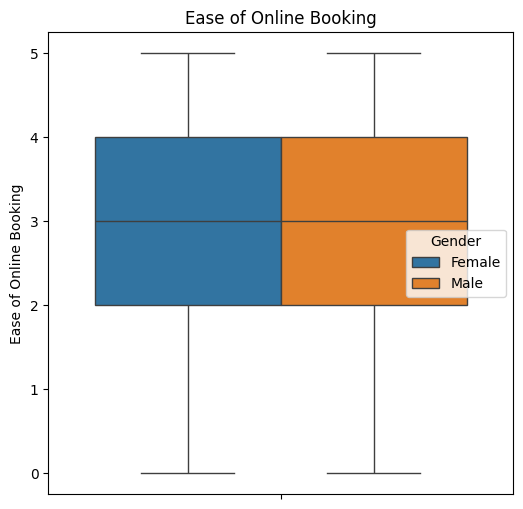

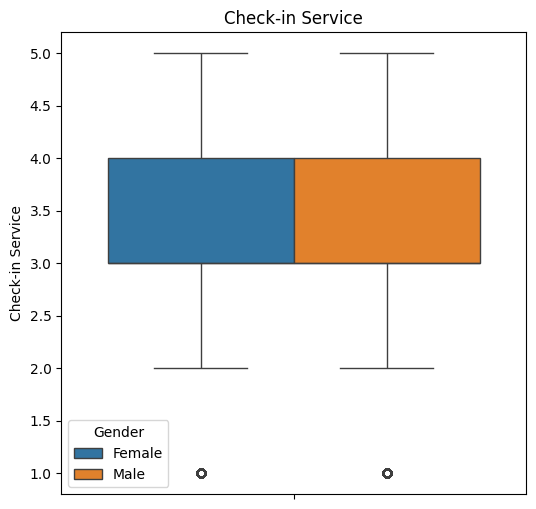

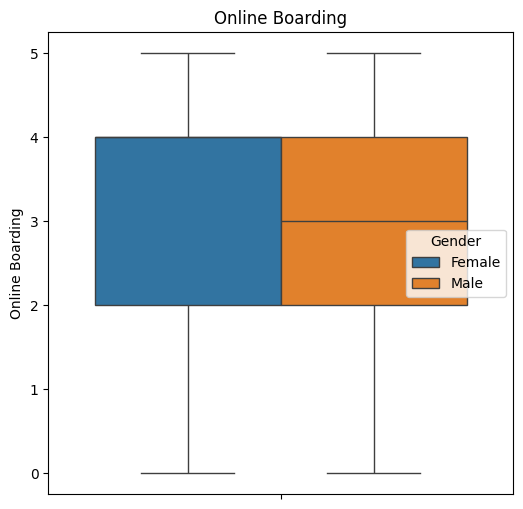

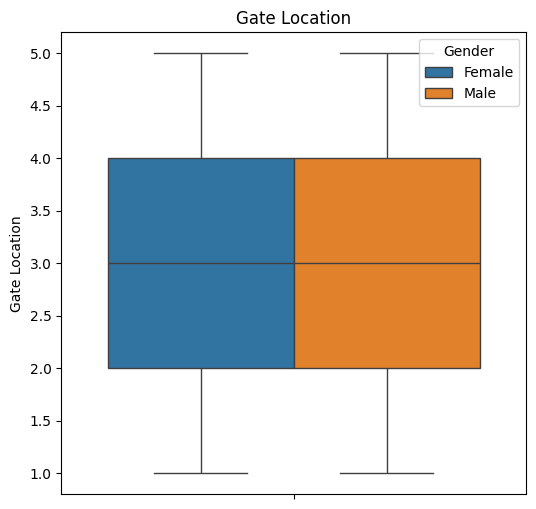

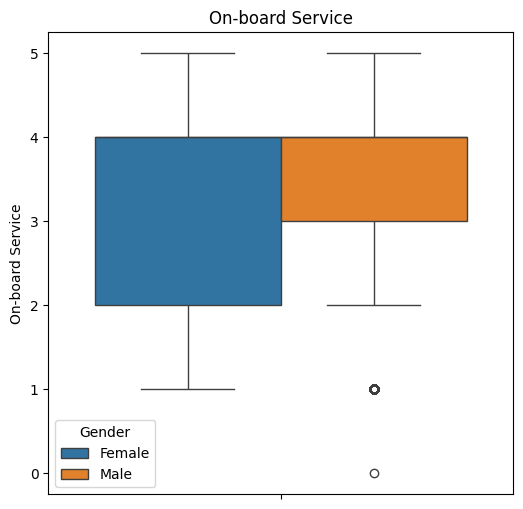

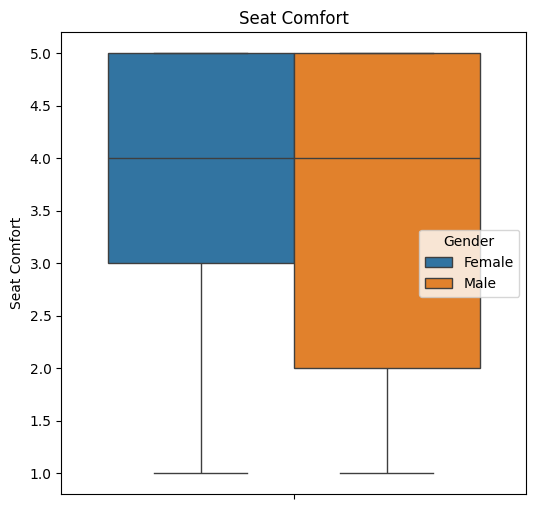

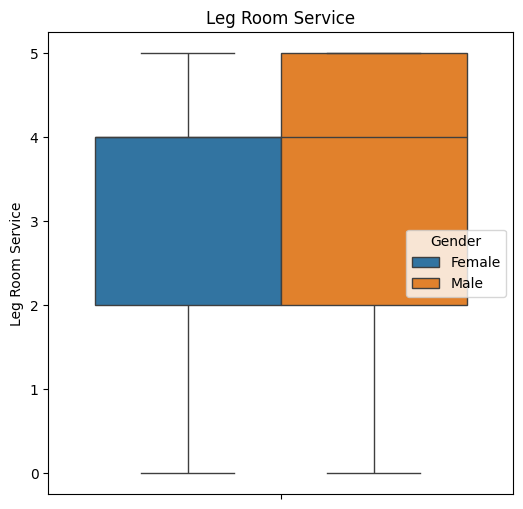

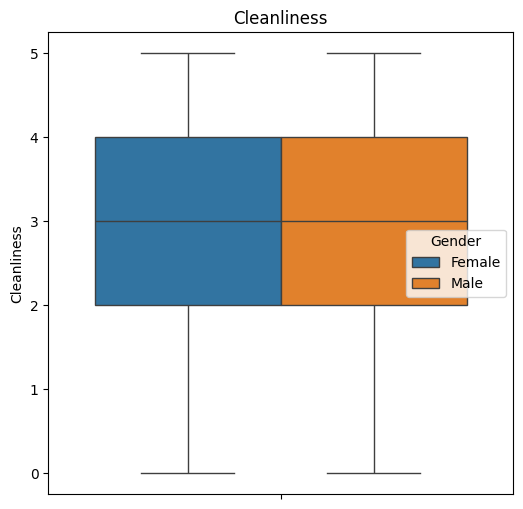

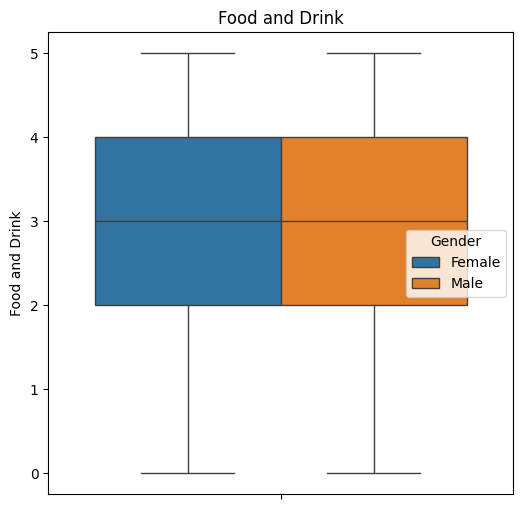

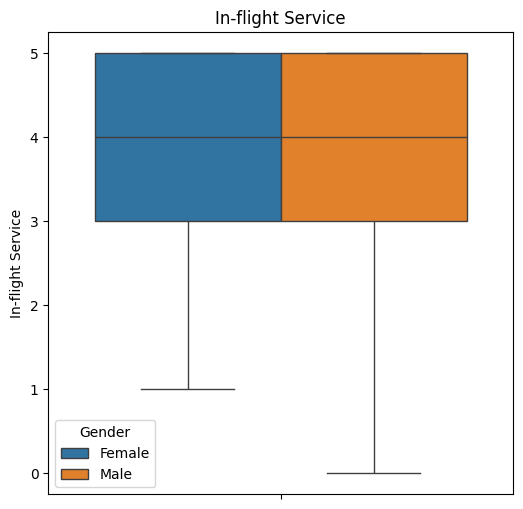

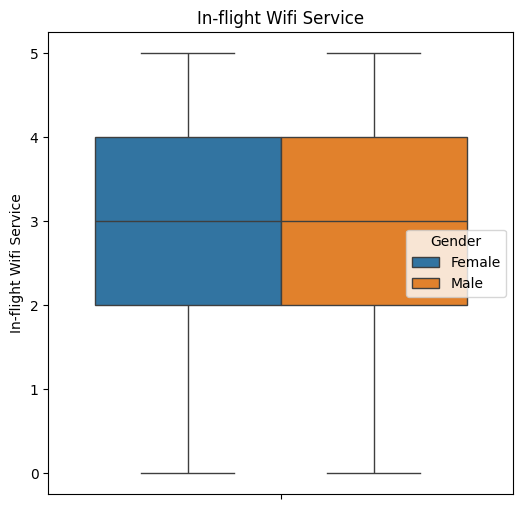

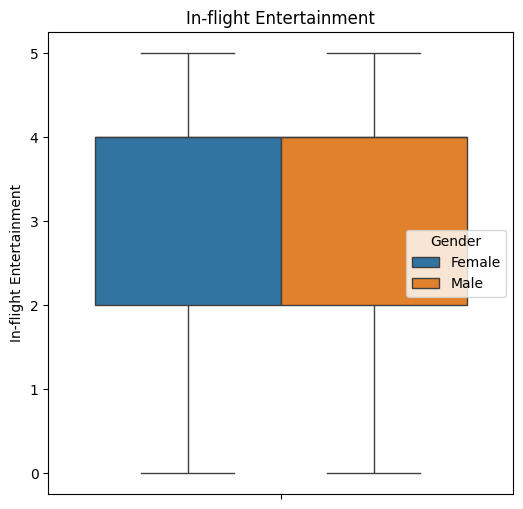

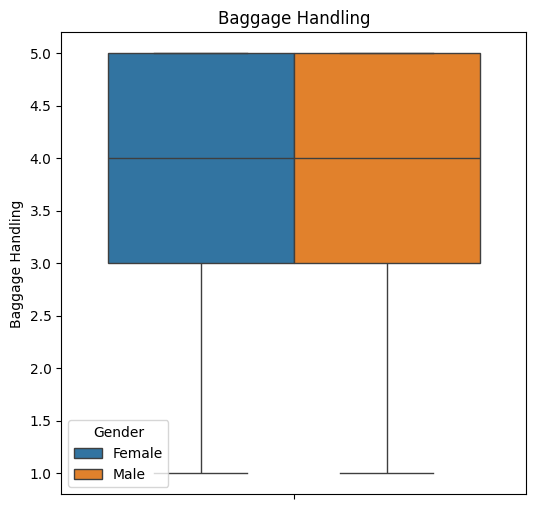

In [ ]:
plot_boxplot(df_departure_greater_arrival, col_list) # BASED ON GENDER

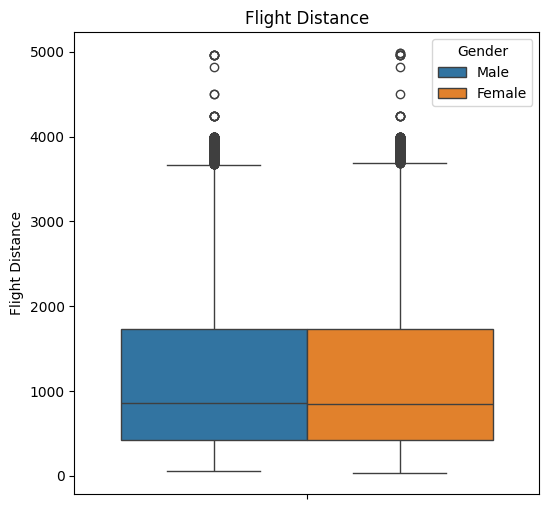

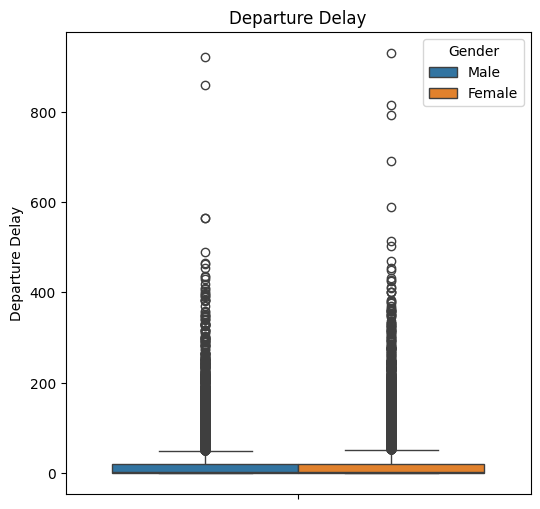

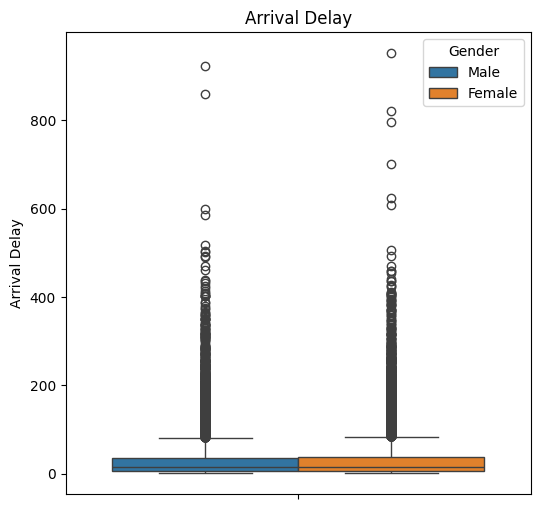

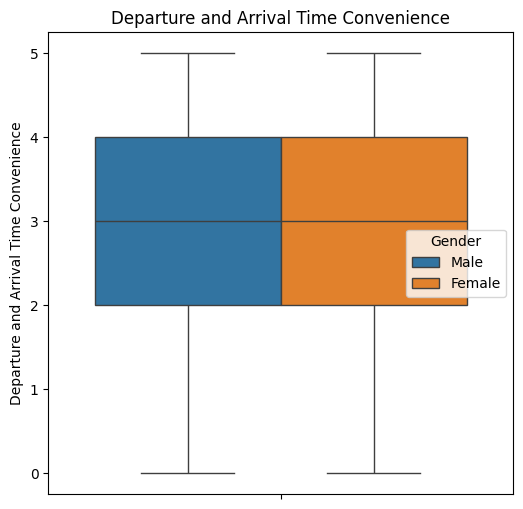

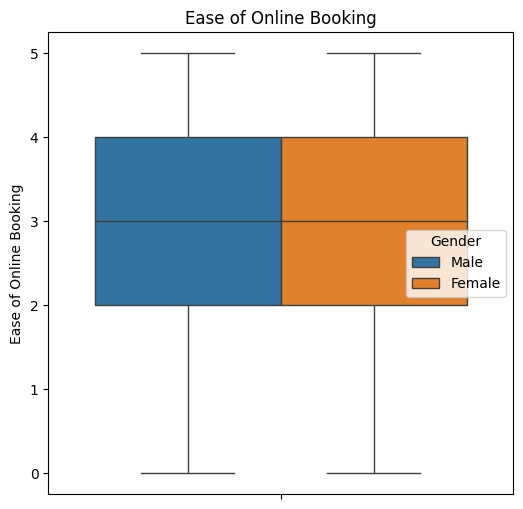

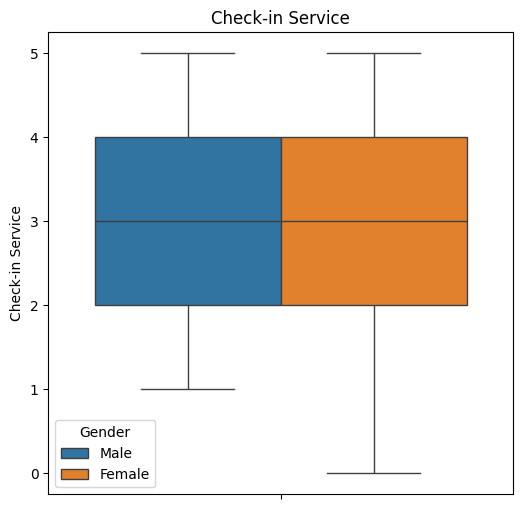

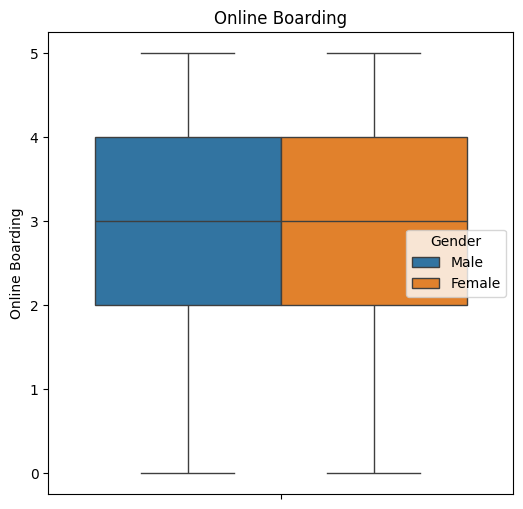

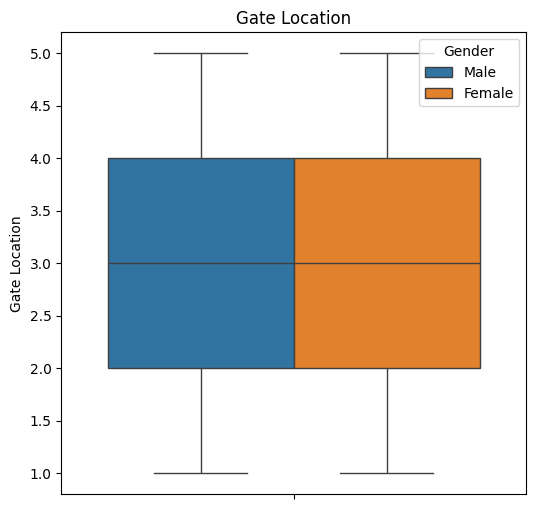

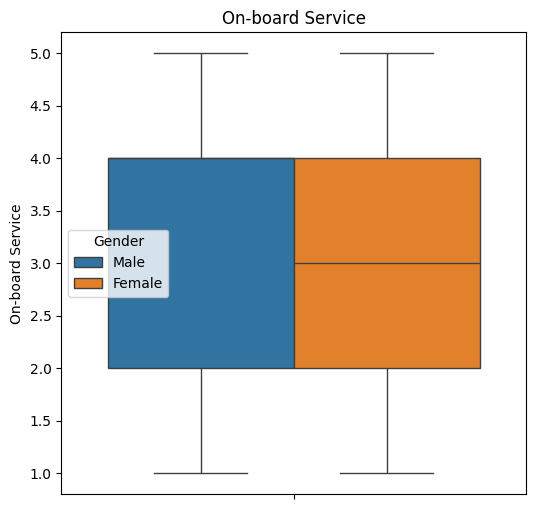

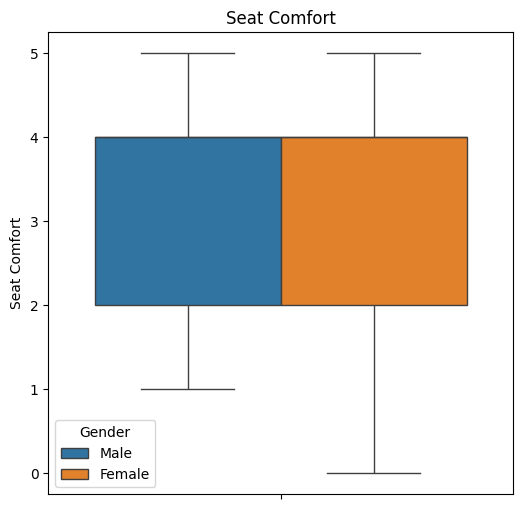

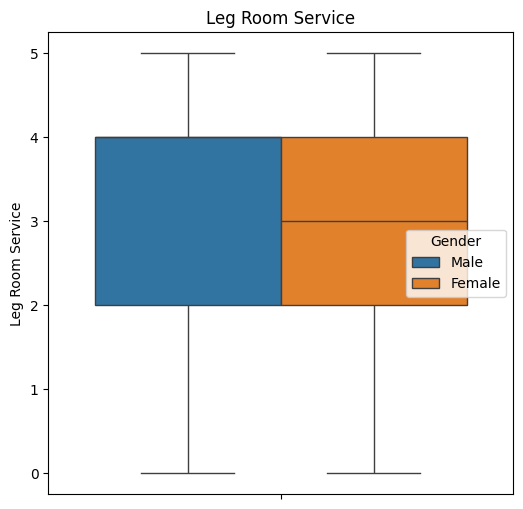

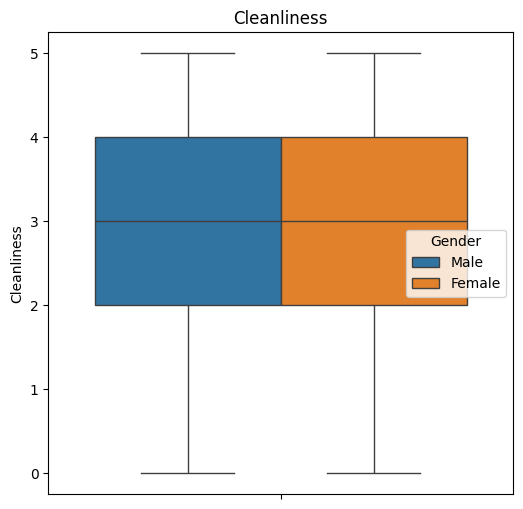

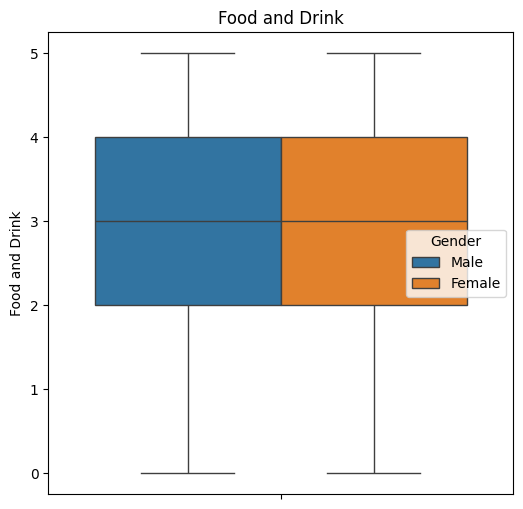

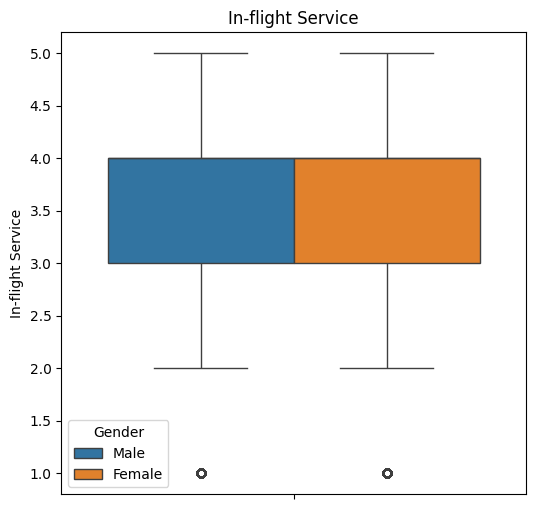

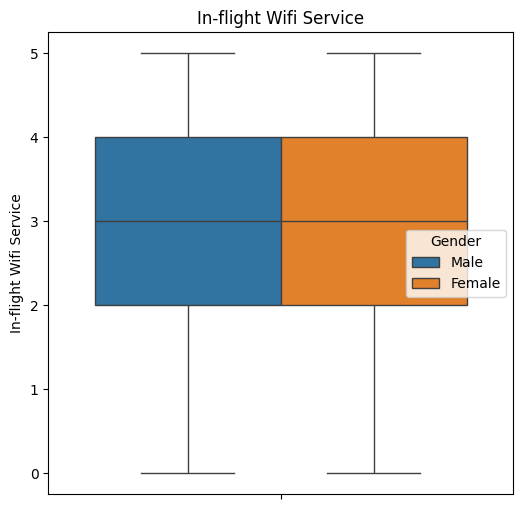

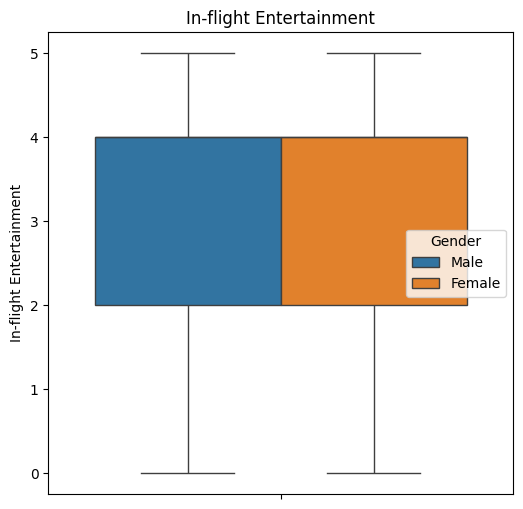

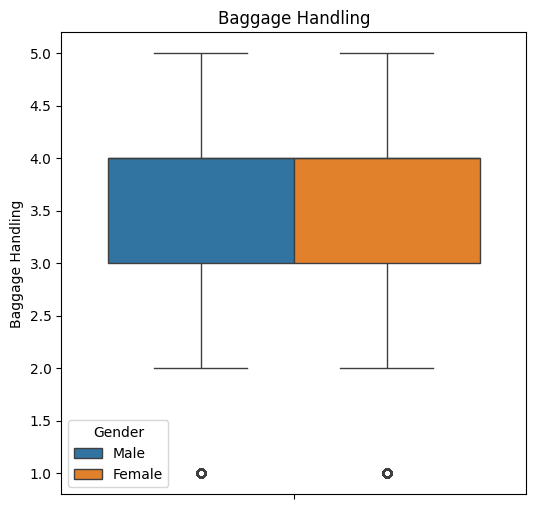

In [ ]:
plot_boxplot(df_arrival_greater_departure, col_list)# BASED ON GENDER

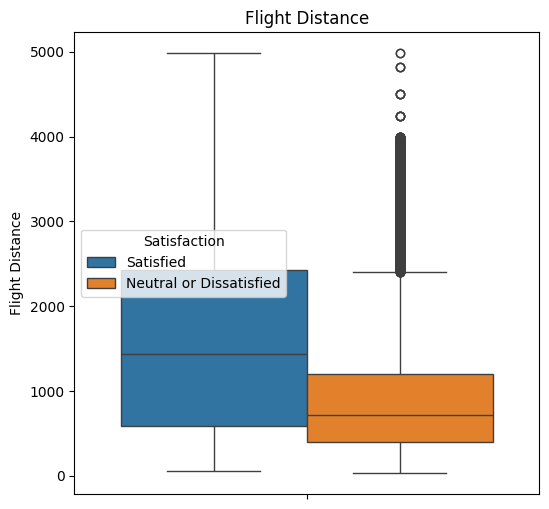

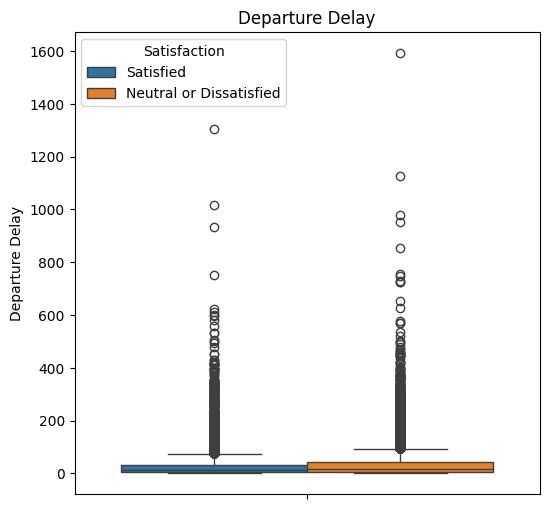

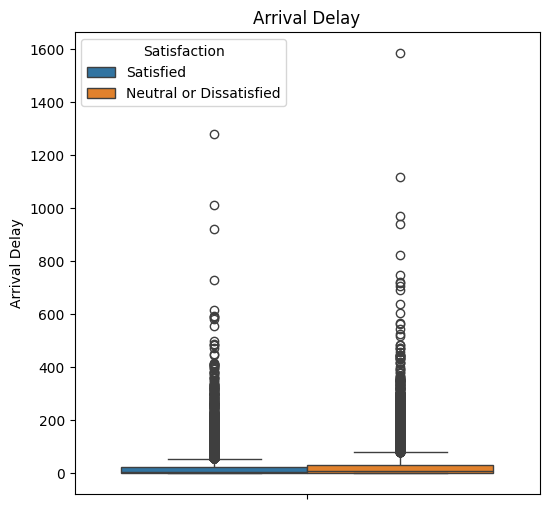

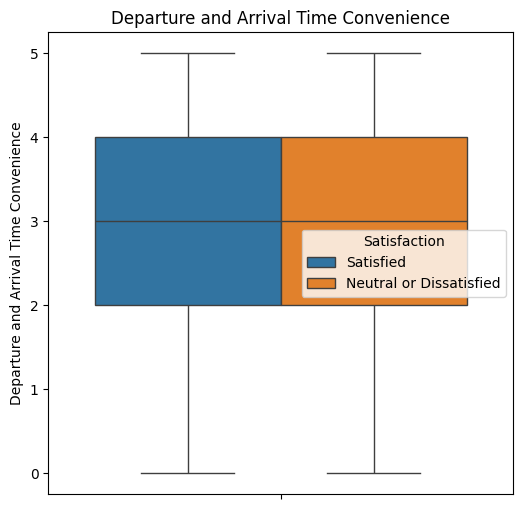

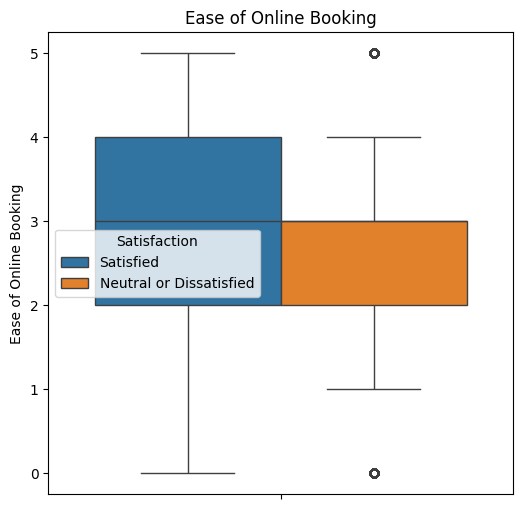

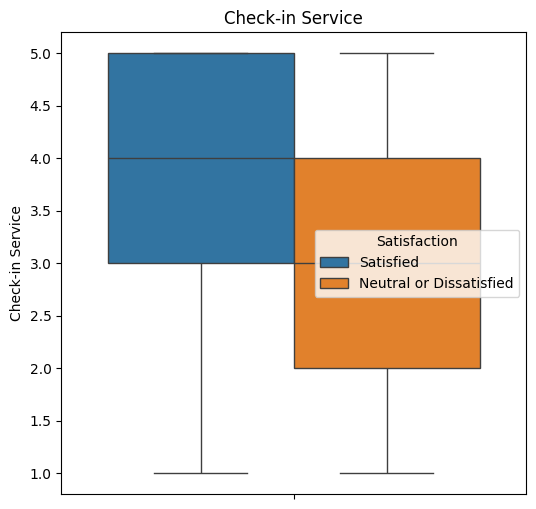

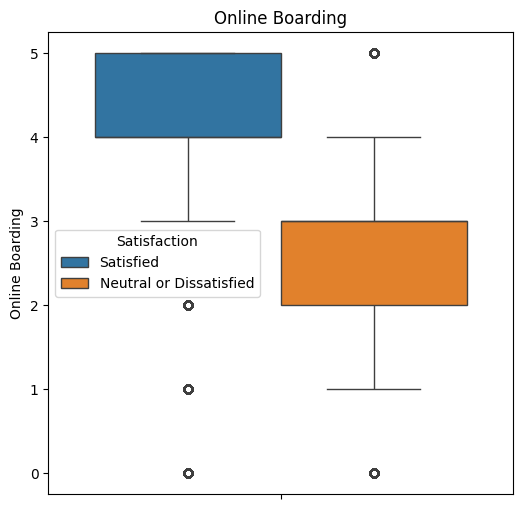

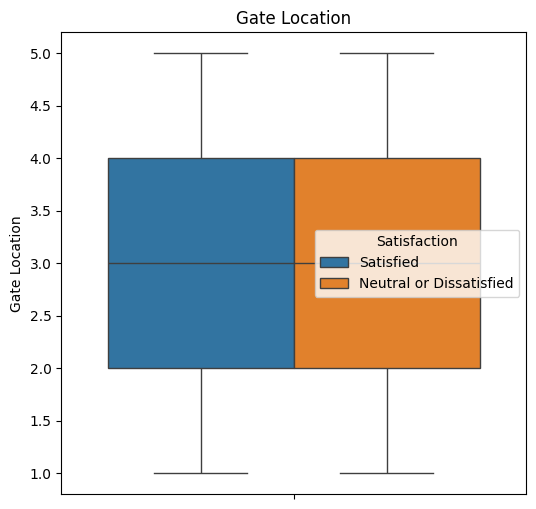

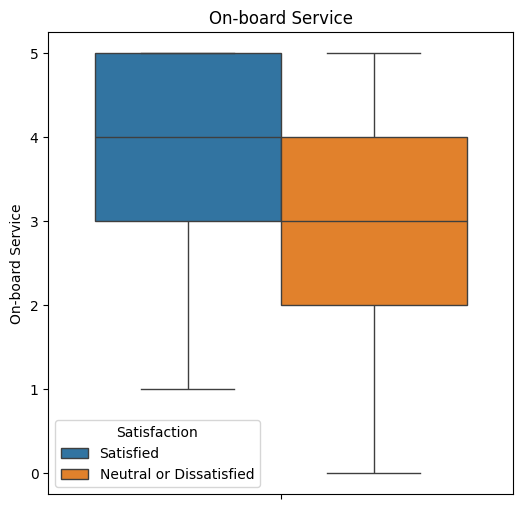

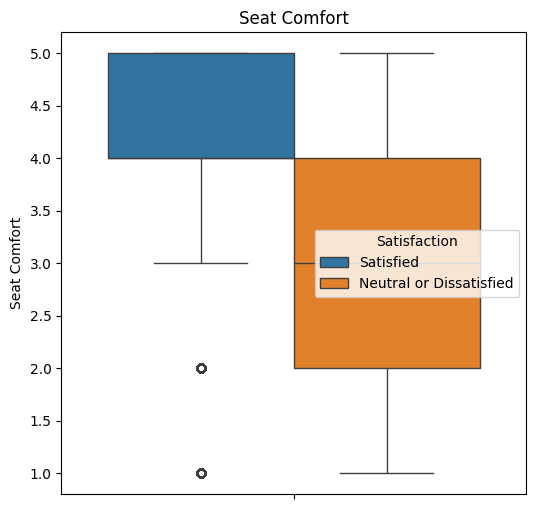

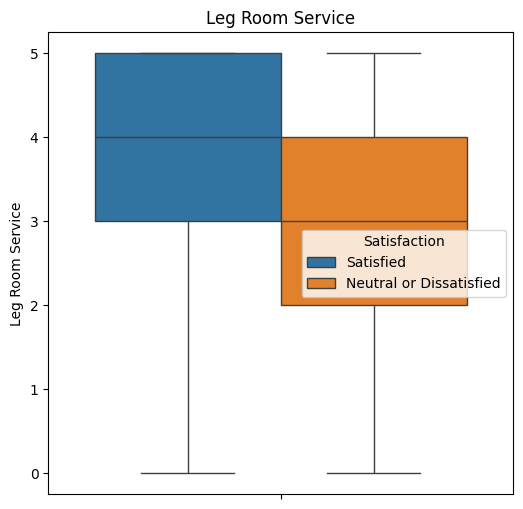

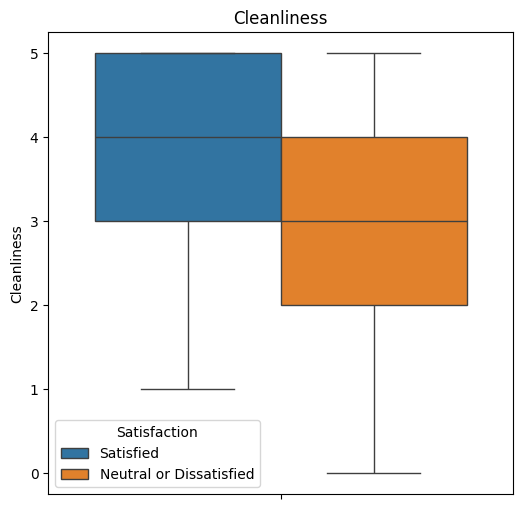

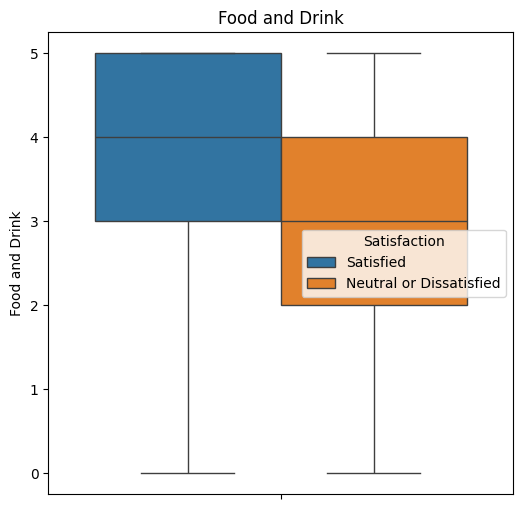

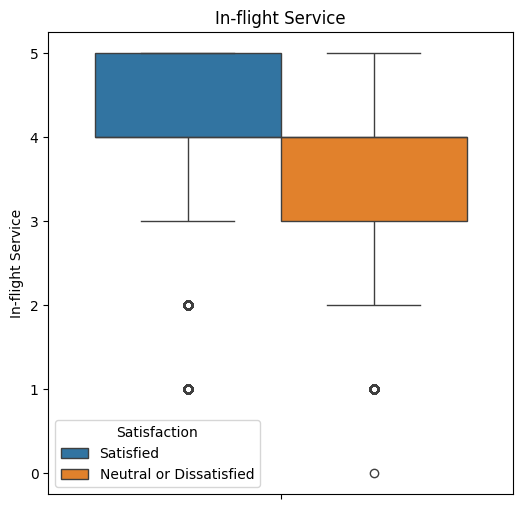

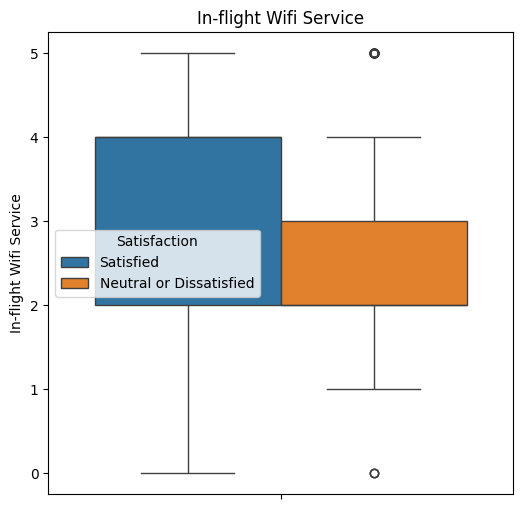

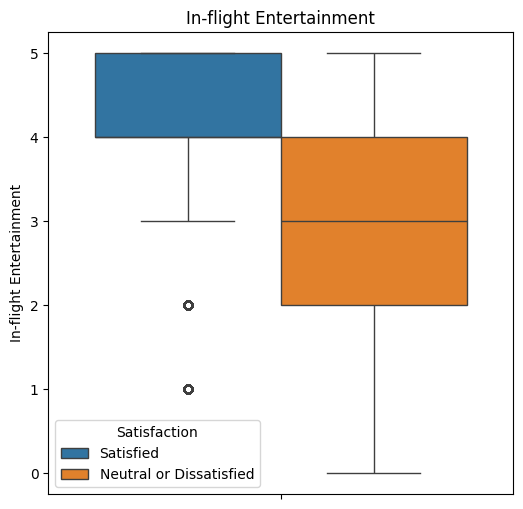

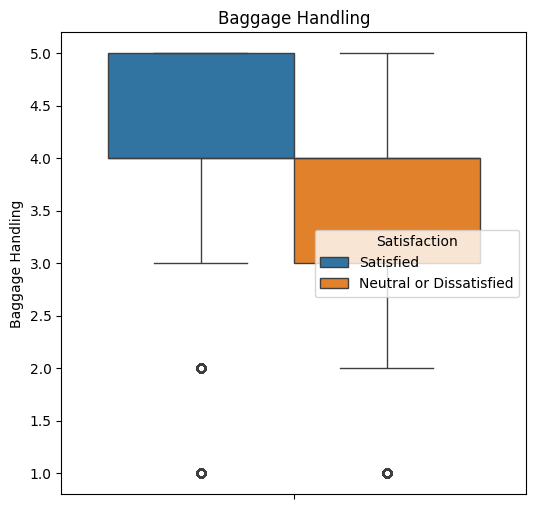

In [ ]:
plot_boxplot_travel(df_departure_greater_arrival, col_list)# BASED ON SATISFACTION

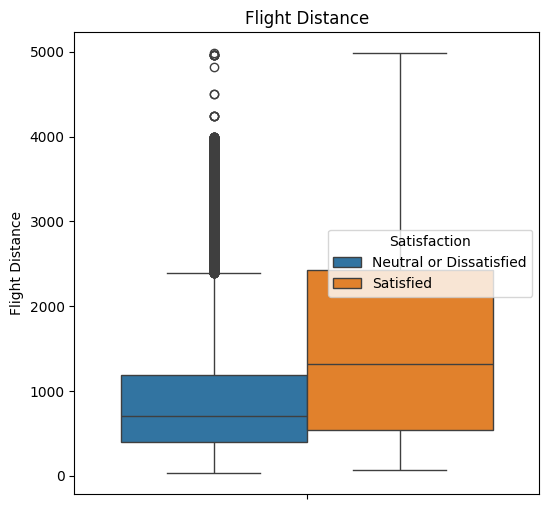

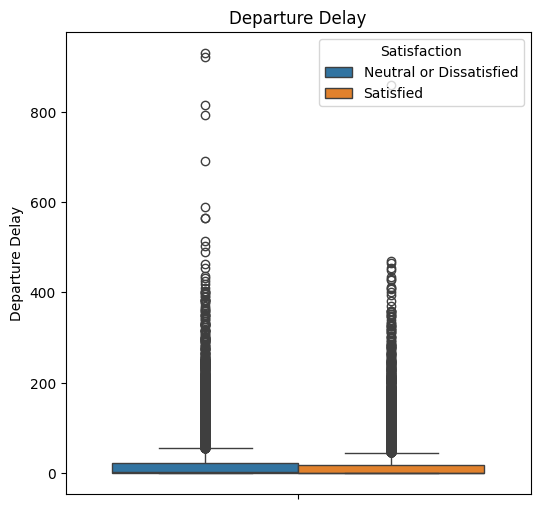

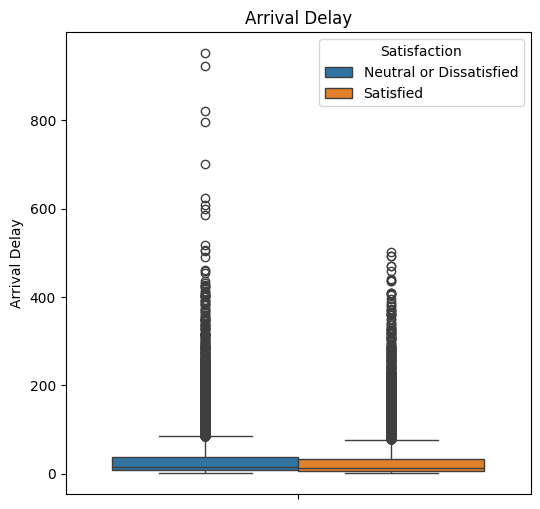

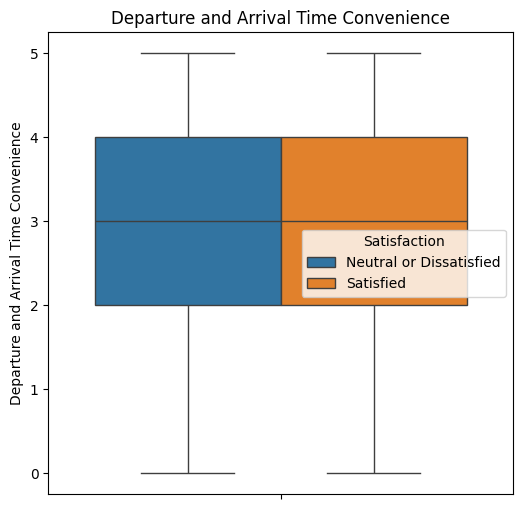

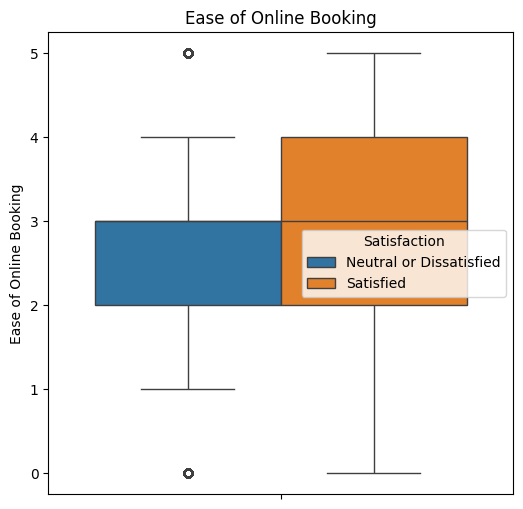

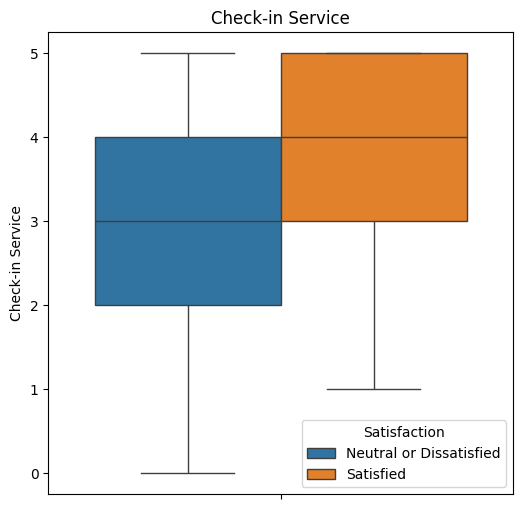

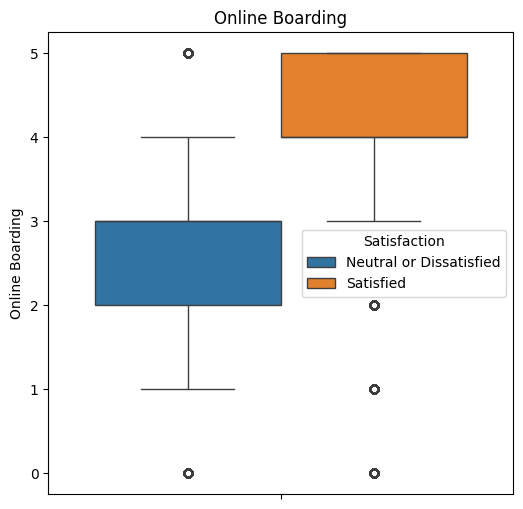

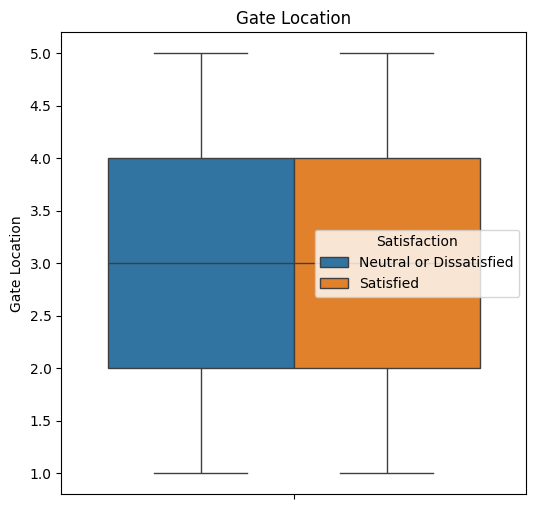

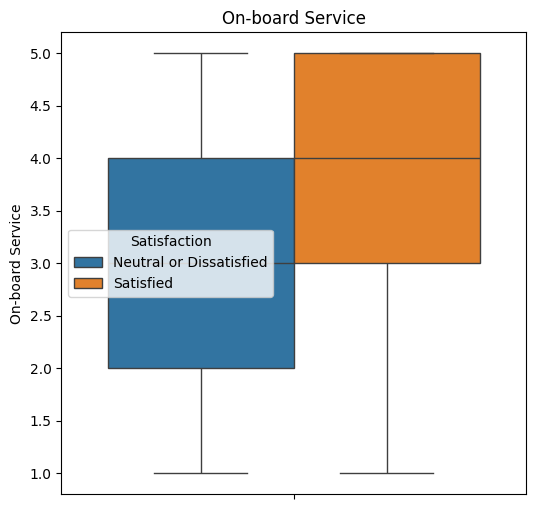

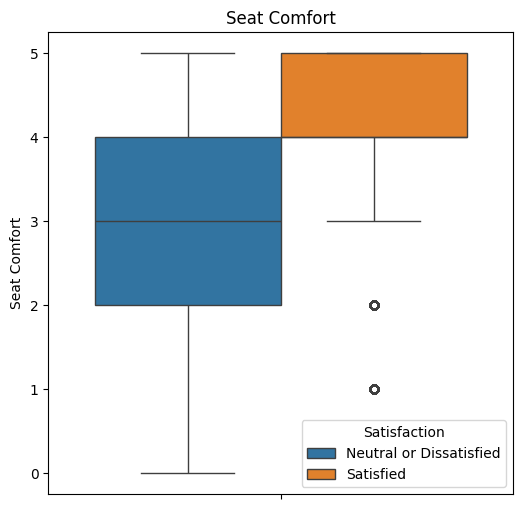

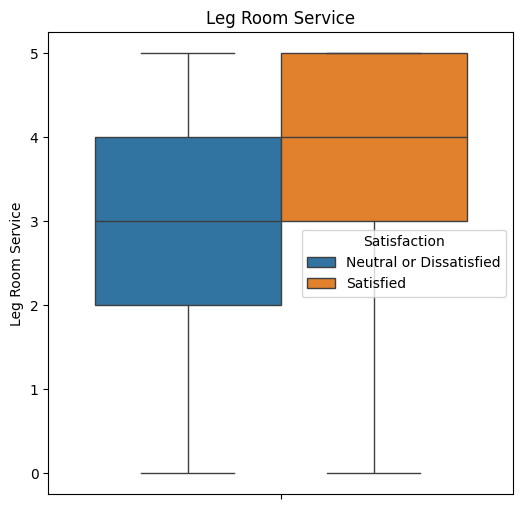

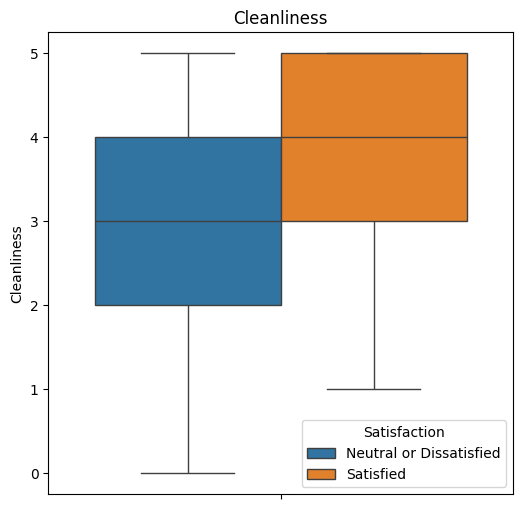

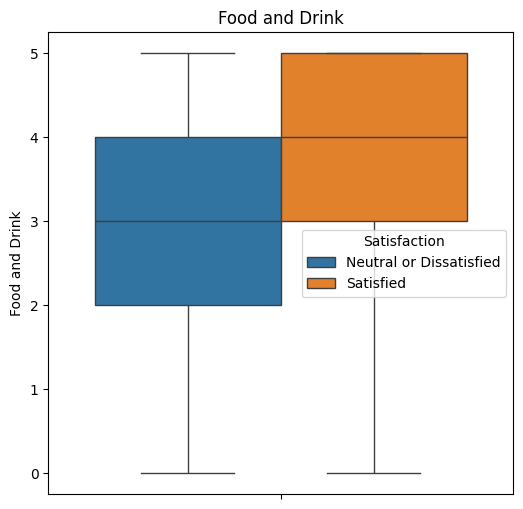

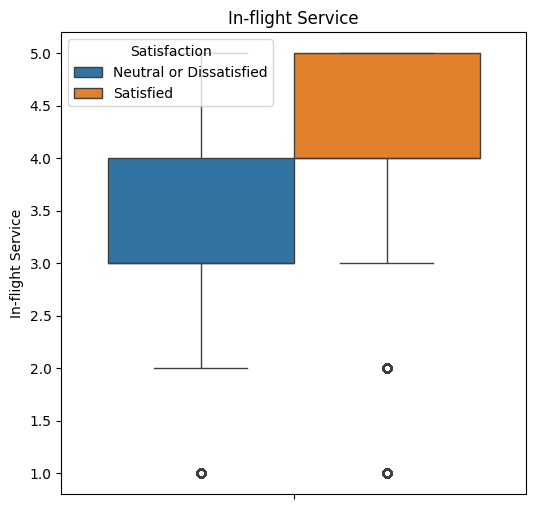

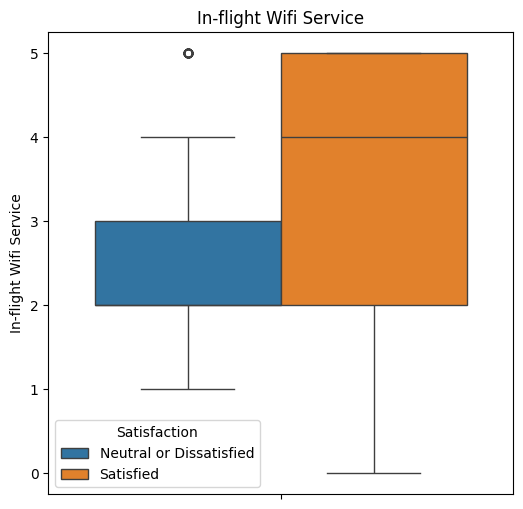

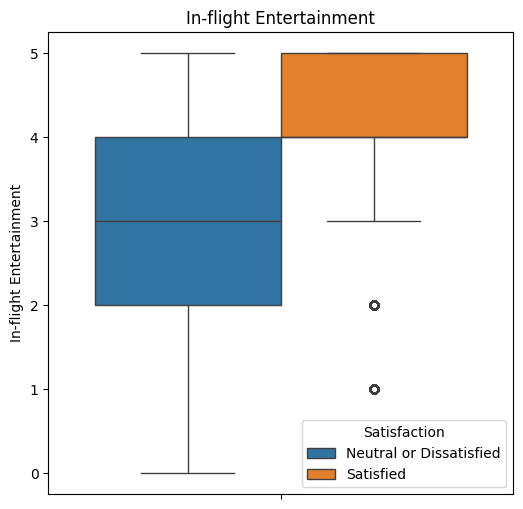

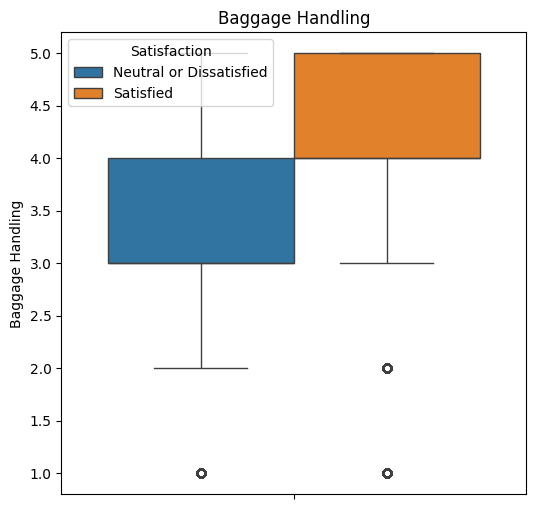

In [ ]:
plot_boxplot_travel(df_arrival_greater_departure, col_list)# BASED ON satifaction

In [ ]:
unsatisfied_age = data[(data['Age'] < 40) | (data['Age'] > 60)]

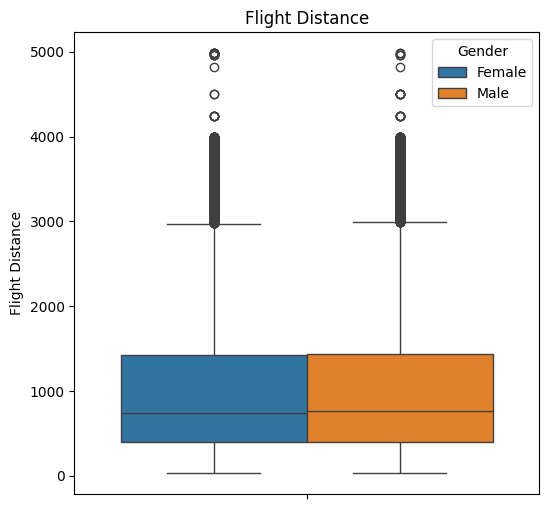

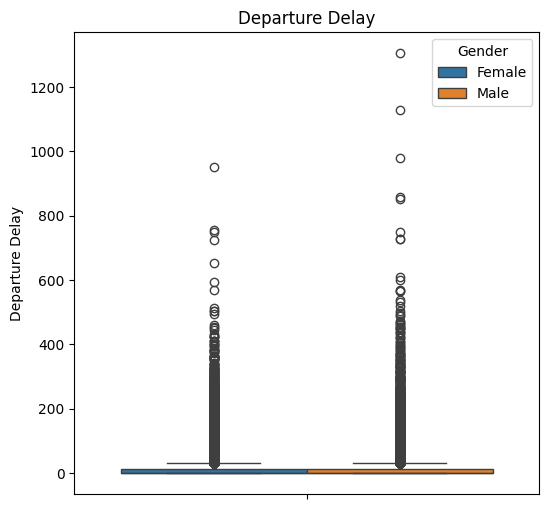

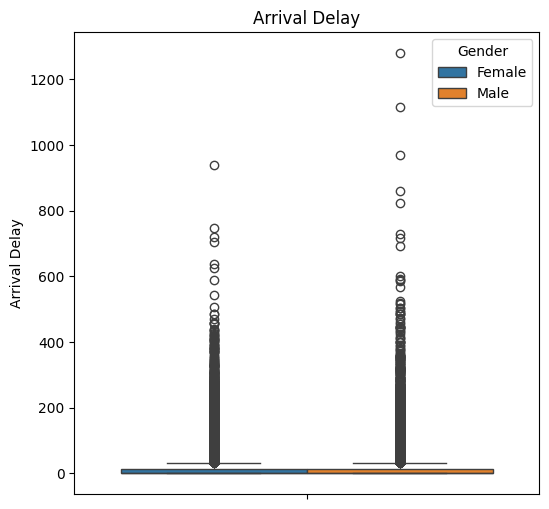

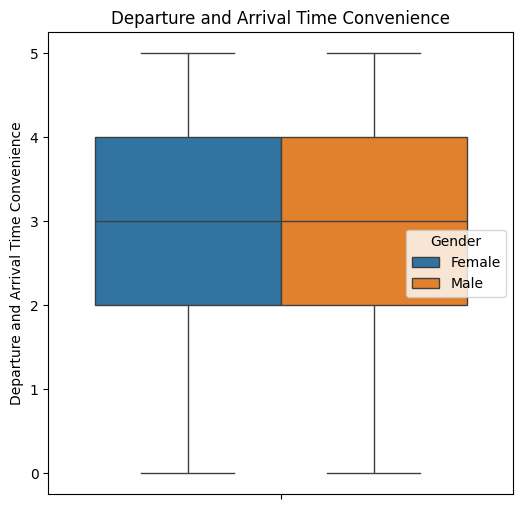

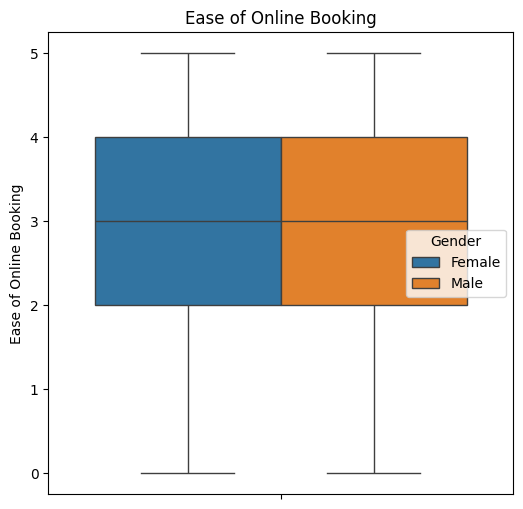

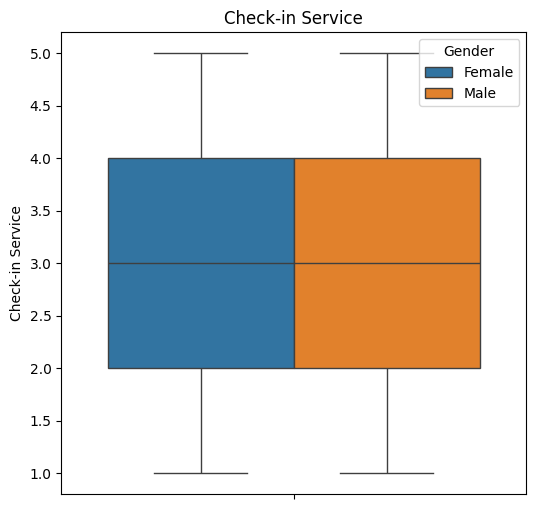

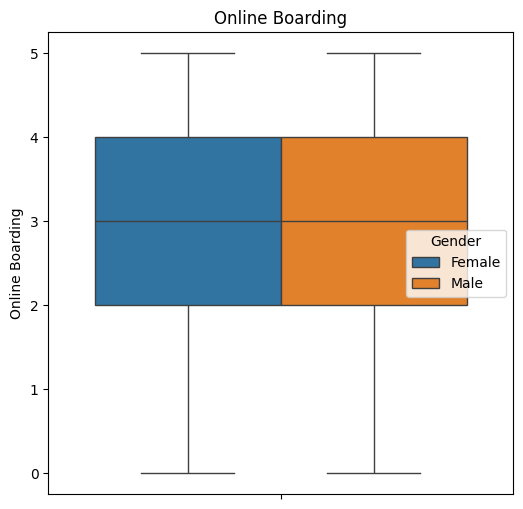

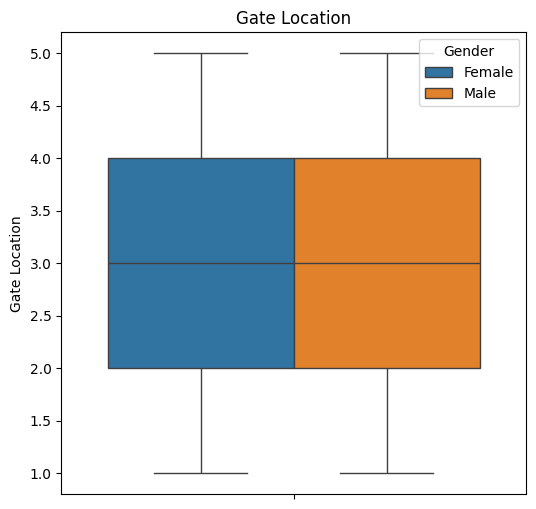

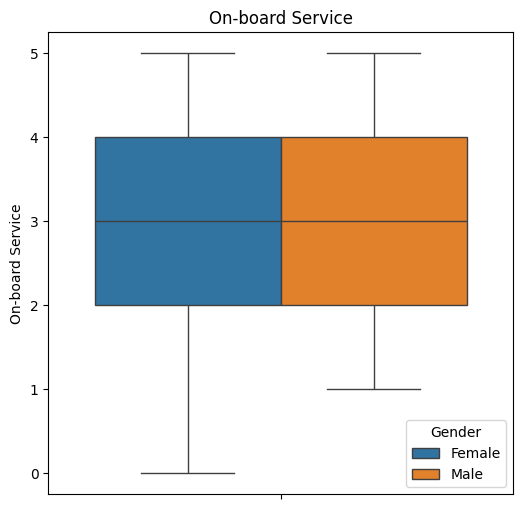

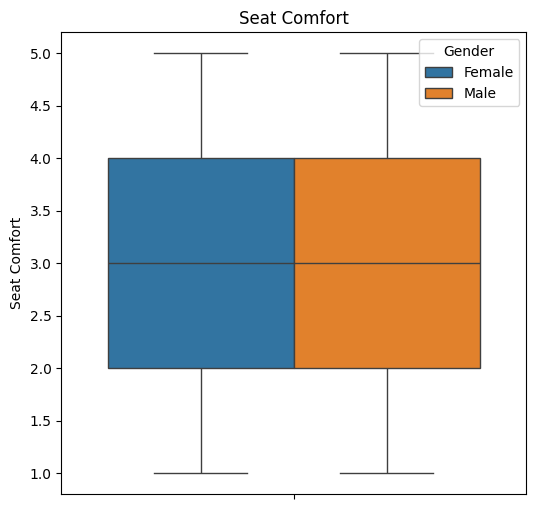

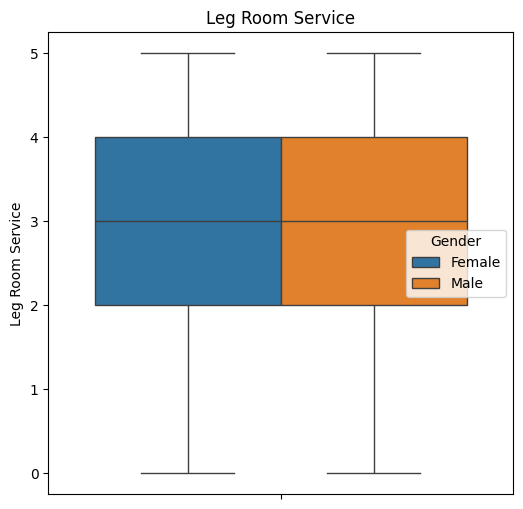

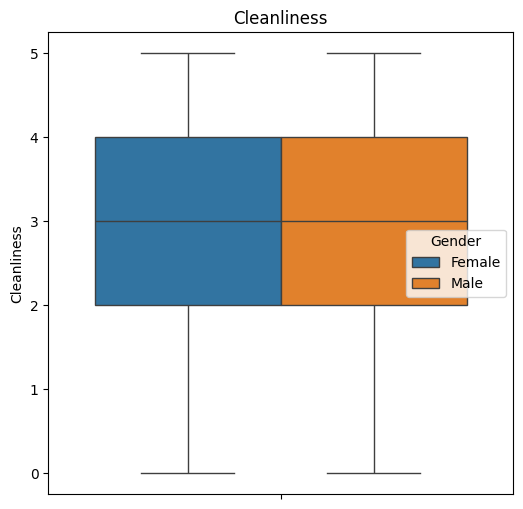

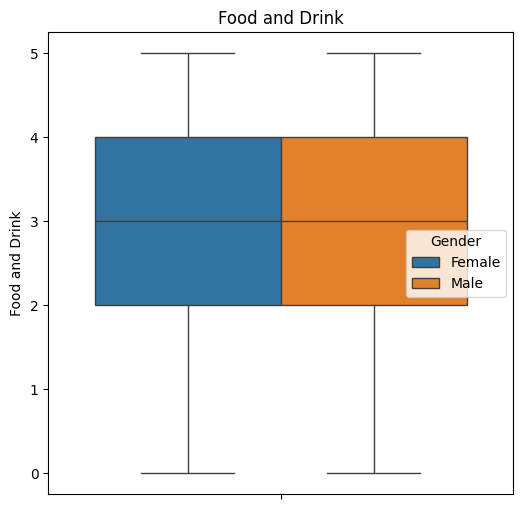

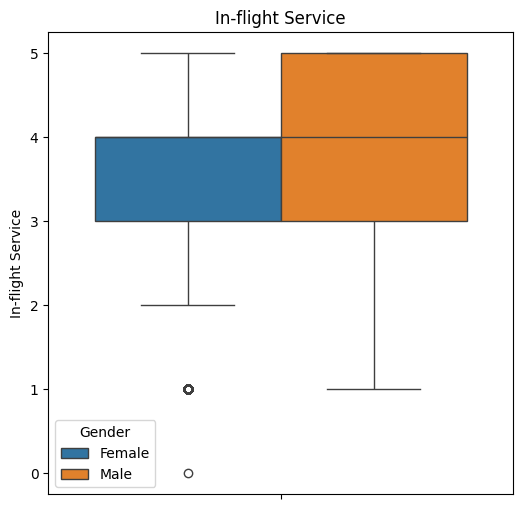

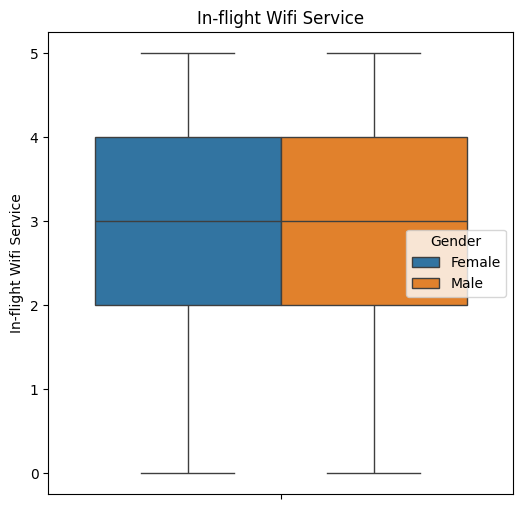

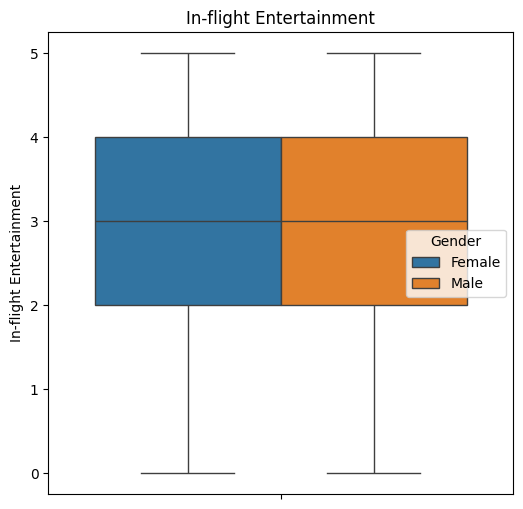

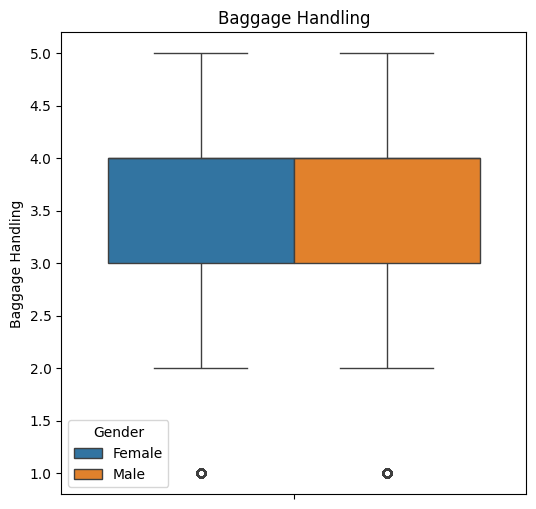

In [ ]:
plot_boxplot(unsatisfied_age, col_list) # BASED ON GENDER

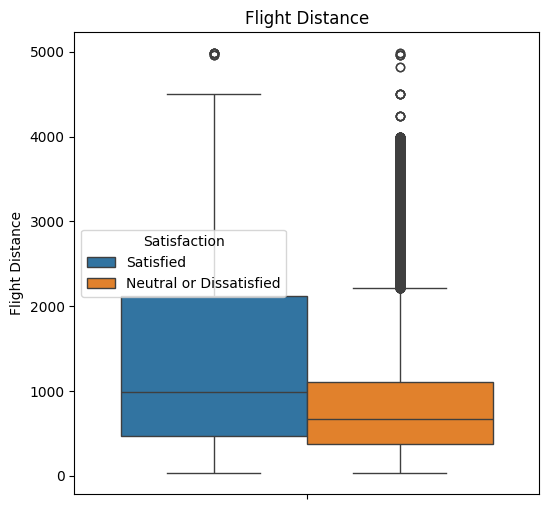

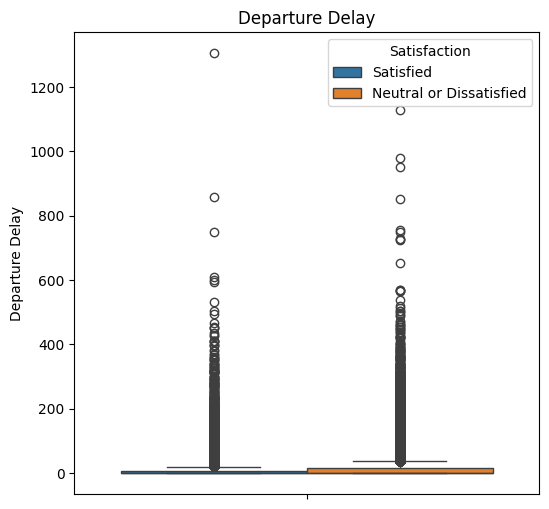

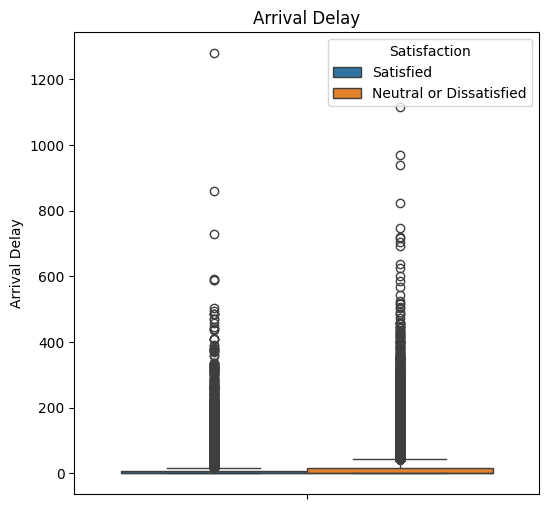

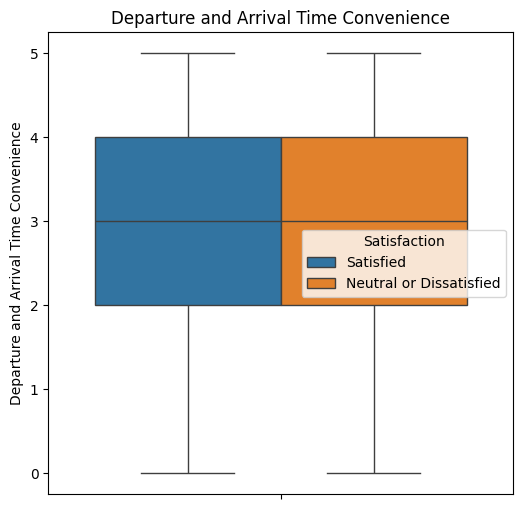

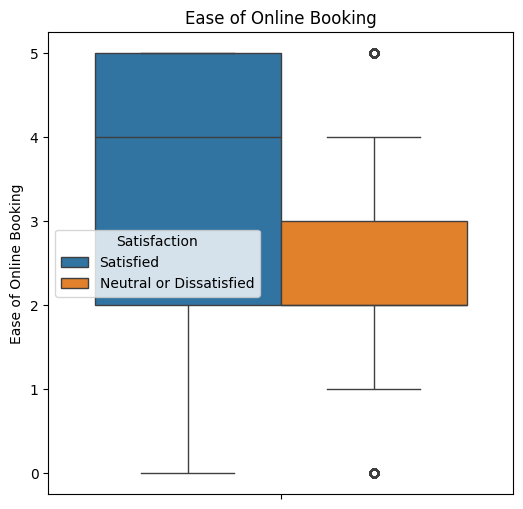

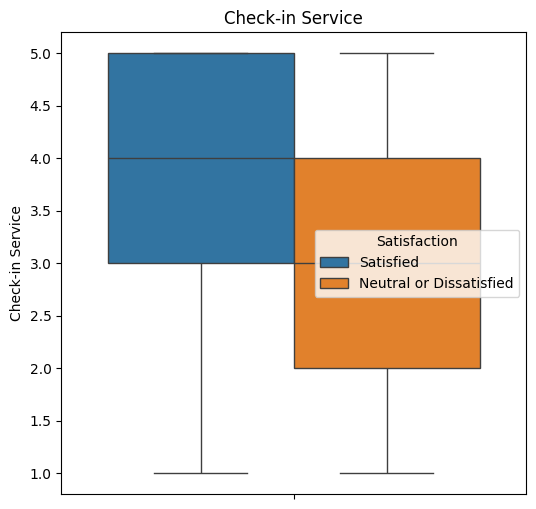

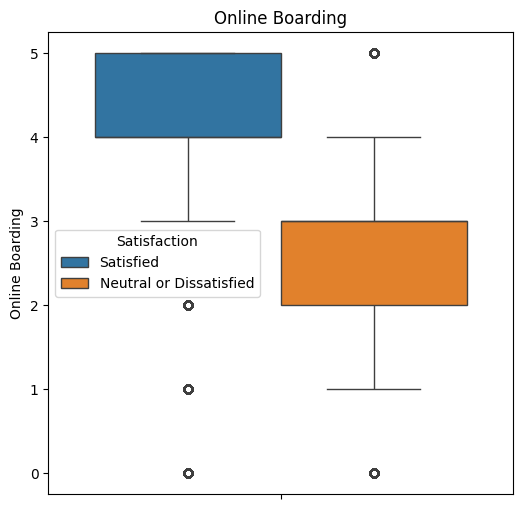

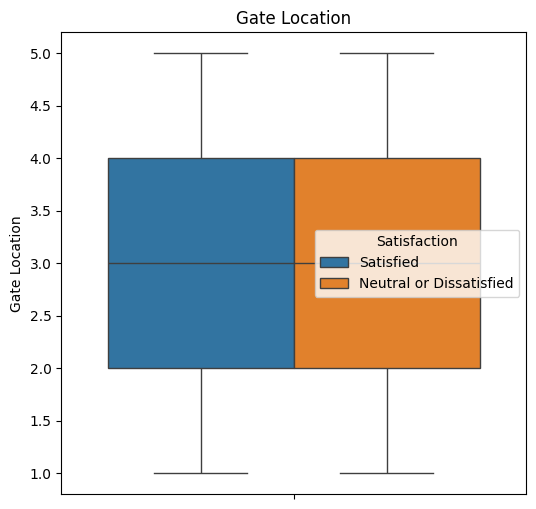

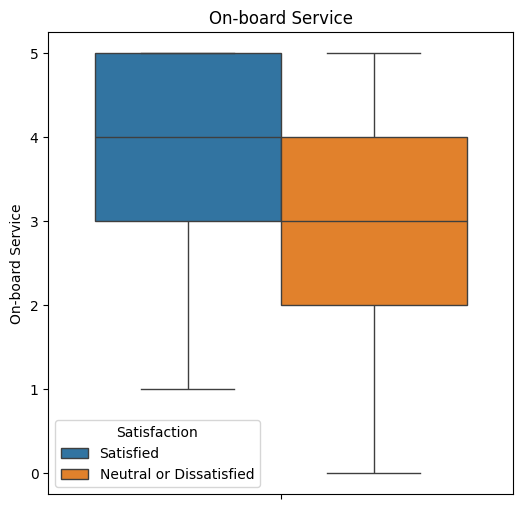

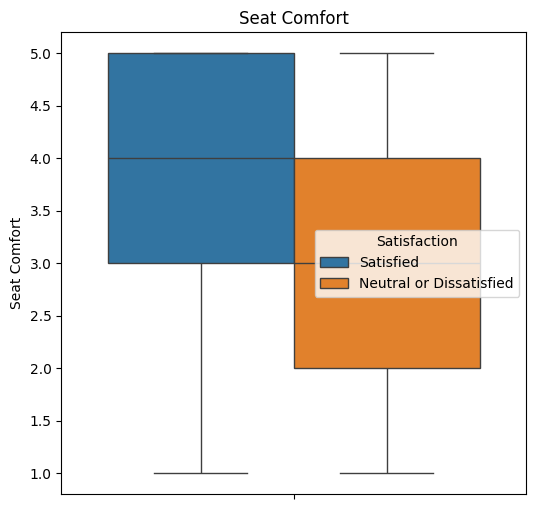

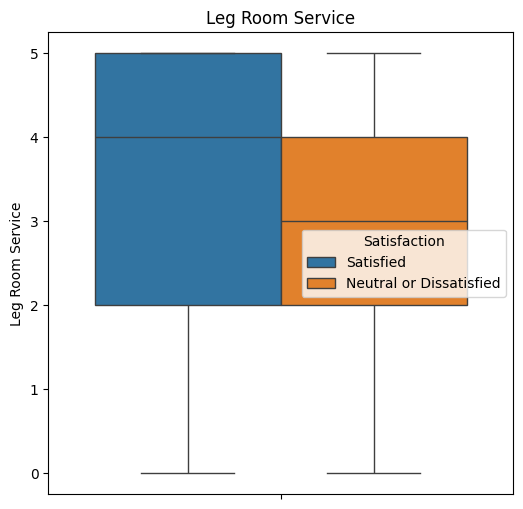

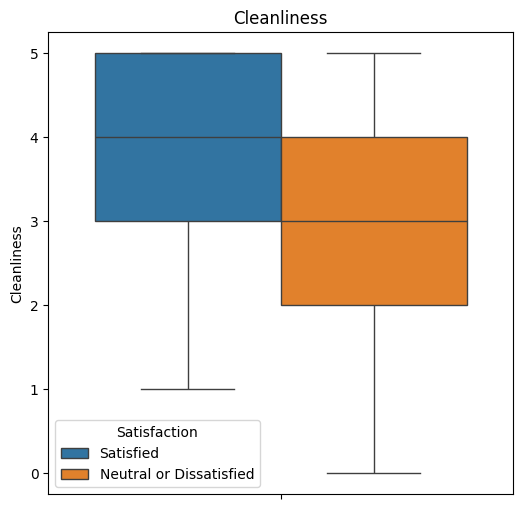

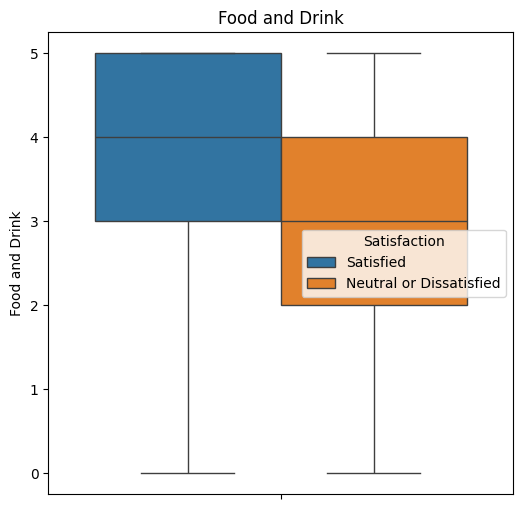

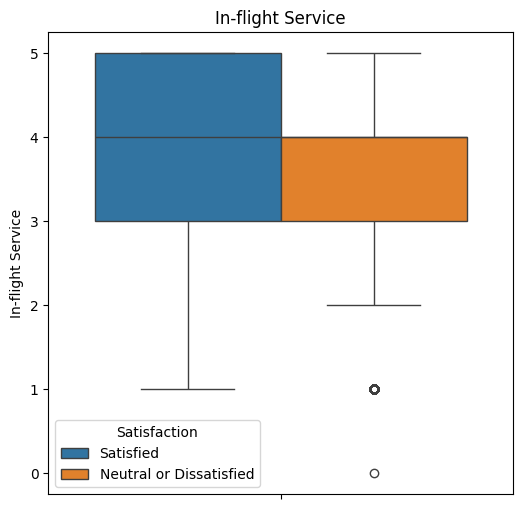

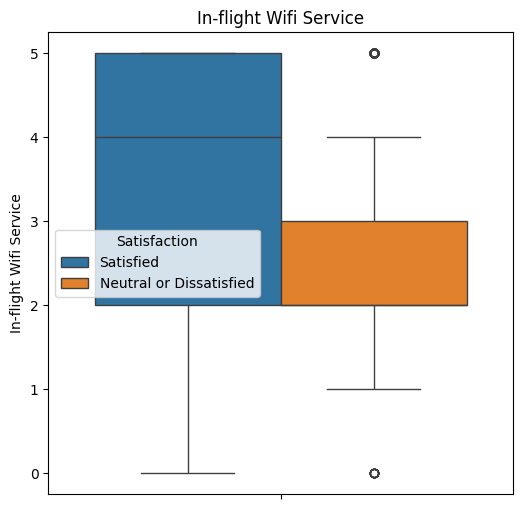

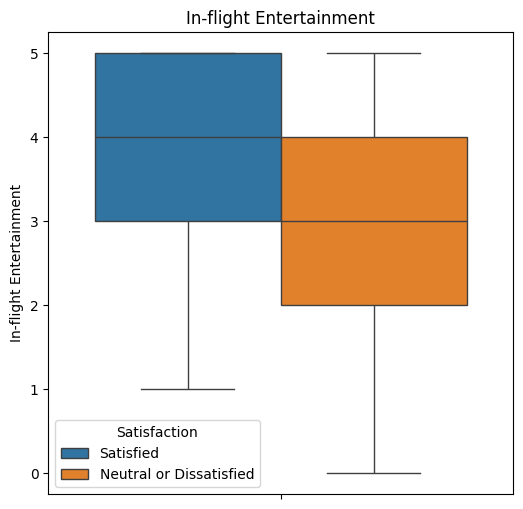

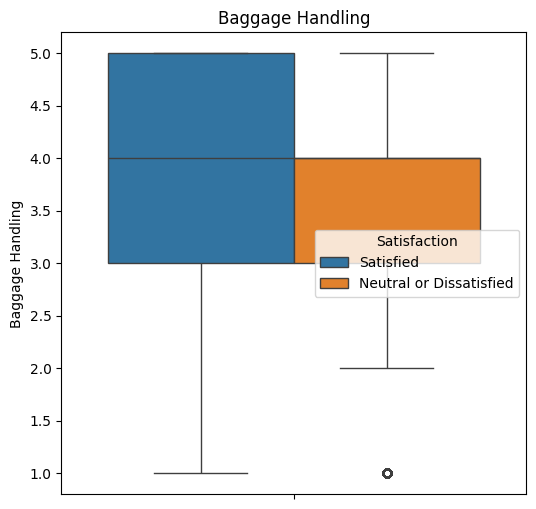

In [ ]:
plot_boxplot_travel(unsatisfied_age, col_list) # BASED ON SATISFACTION

In [ ]:
unsatisfied_age['Satisfaction'].value_counts(normalize=True)

Satisfaction
Neutral or Dissatisfied    0.672248
Satisfied                  0.327752
Name: proportion, dtype: float64

- Overall female travellers are more than male in every age range

- Convert the flight diatance as short, medium and long distance (1000, 3000, >3000)

- Convert age as kids, teen, adult and senior (12, 19, 60, >60)

In [ ]:
data = data.assign(flight_distance = np.where(data['Flight Distance']<1000, 'short', np.where(data['Flight Distance']>3000, 'long', 'medium')))

In [ ]:
# prompt: create a new column 'age_group'. if age<12 as kids, age<19 and age>12 as teen, age<60 and age<19 as adult and age>60 as senior

# Assuming 'data' is your DataFrame
# Create the 'age_group' column based on the specified conditions
data['age_group'] = pd.cut(data['Age'], bins=[0, 12, 19, 60, float('inf')], labels=['kids', 'teen', 'adult', 'senior'], right=False)
data.head()

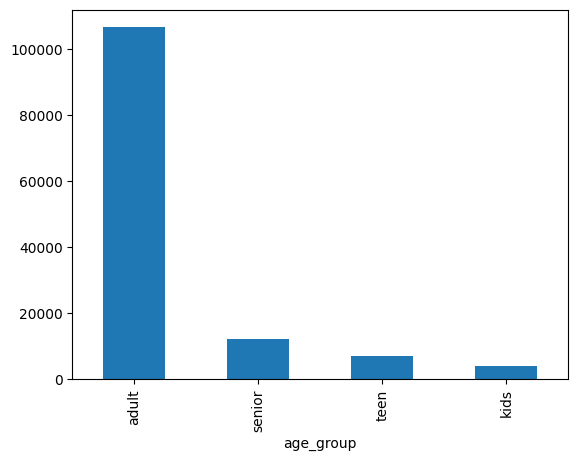

In [ ]:
data['age_group'].value_counts().plot(kind='bar')
plt.show()

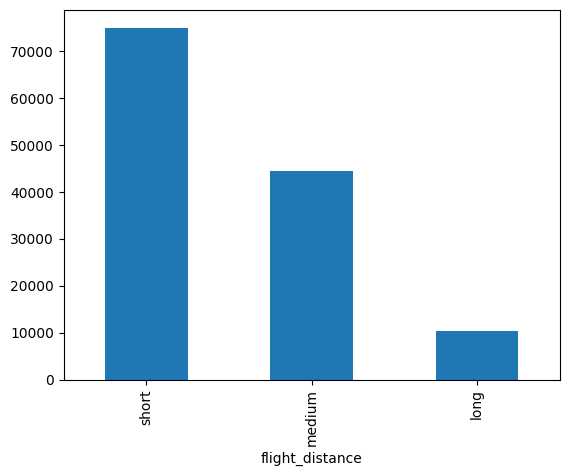

In [ ]:
data['flight_distance'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
pivot_fun_age = pd.pivot_table(
    data,
    values='Age',  # Use any existing column for the count
    index='Satisfaction',
    columns='age_group',
    aggfunc='count',
    fill_value=0  # Fill missing values with 0
)
pivot_fun_age

age_group                kids  teen  adult  senior
Satisfaction                                      
Neutral or Dissatisfied  3488  5632  55423    8909
Satisfied                 512  1438  51172    3306

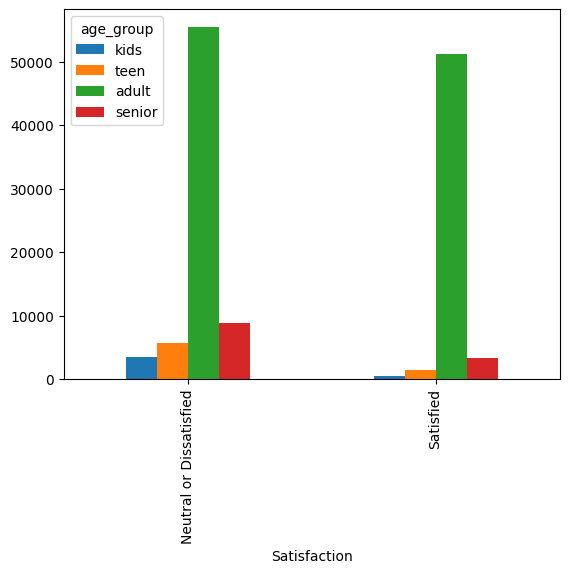

In [ ]:
pivot_fun_age.plot(kind='bar')
plt.show()

In [ ]:
pivot_table_flight = pd.pivot_table(
    data,
    values='Age',  # Use any existing column for the count
    index='Satisfaction',
    columns='flight_distance',
    aggfunc='count',
    fill_value=0  # Fill missing values with 0
)
pivot_table_flight

flight_distance          long  medium  short
Satisfaction                                
Neutral or Dissatisfied  2336   20857  50259
Satisfied                7977   23621  24830

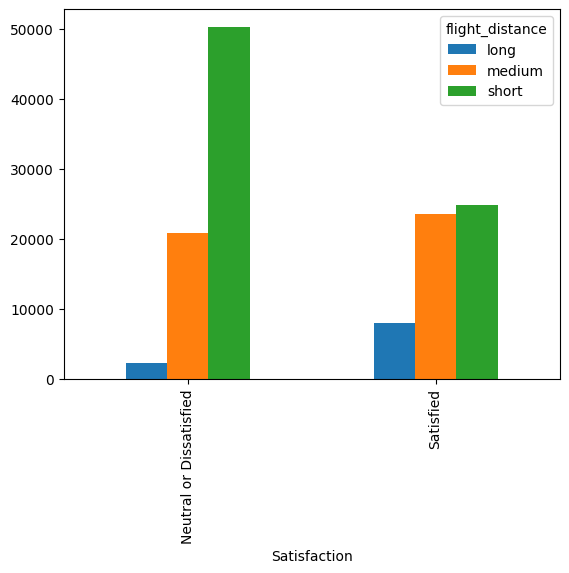

In [ ]:
pivot_table_flight.plot(kind='bar');